In [2]:
import squidpy as sq
import numpy as np
import pandas as pd
import numba.types as nt

it = nt.int32
ft = nt.float32
tt = nt.UniTuple
ip = np.int32
fp = np.float32
dt = nt.uint32 
ndt = np.uint32

In [3]:
%matplotlib inline

In [4]:
adata = sq.datasets.slideseqv2()

In [5]:
np.unique(adata.obs["cluster"], return_counts=True)

(array(['Astrocytes', 'CA1_CA2_CA3_Subiculum', 'DentatePyramids',
        'Endothelial_Stalk', 'Endothelial_Tip', 'Ependymal',
        'Interneurons', 'Microglia', 'Mural', 'Neurogenesis',
        'Oligodendrocytes', 'Polydendrocytes', 'Subiculum_Entorhinal_cl2',
        'Subiculum_Entorhinal_cl3'], dtype=object),
 array([6543, 7649, 6606, 1991, 1317,  813, 3672, 1298, 1027,  938, 3602,
        1449, 2896, 1985]))

In [178]:
adata.obs["cluster"]

AACGTCATAATCGT             DentatePyramids
TACTTTAGCGCAGT       CA1_CA2_CA3_Subiculum
CATGCCTGGGTTCG             DentatePyramids
TCGATATGGCACAA             DentatePyramids
TTATCTGACGAAGC    Subiculum_Entorhinal_cl2
                            ...           
CACCCGATGACTCC             Polydendrocytes
CTTGATTAGGCAGG                Interneurons
GAGTTCCTAAGCGG             DentatePyramids
GCGCTCAGTGCTCT                Interneurons
GAGATAACAGTTCC                  Astrocytes
Name: cluster, Length: 41786, dtype: category
Categories (14, object): ['Astrocytes', 'CA1_CA2_CA3_Subiculum', 'DentatePyramids', 'Endothelial_Stalk', ..., 'Oligodendrocytes', 'Polydendrocytes', 'Subiculum_Entorhinal_cl2', 'Subiculum_Entorhinal_cl3']

/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


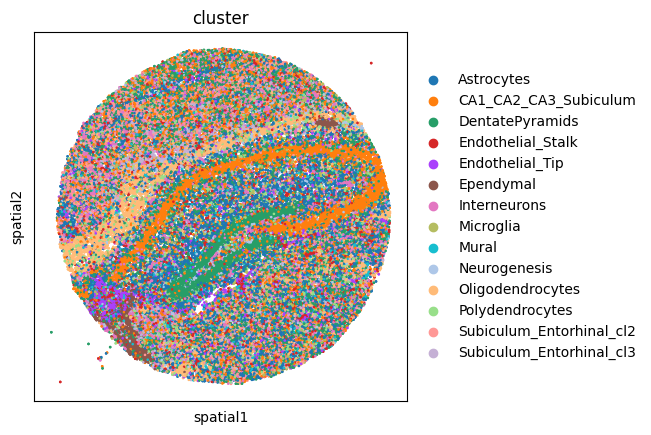

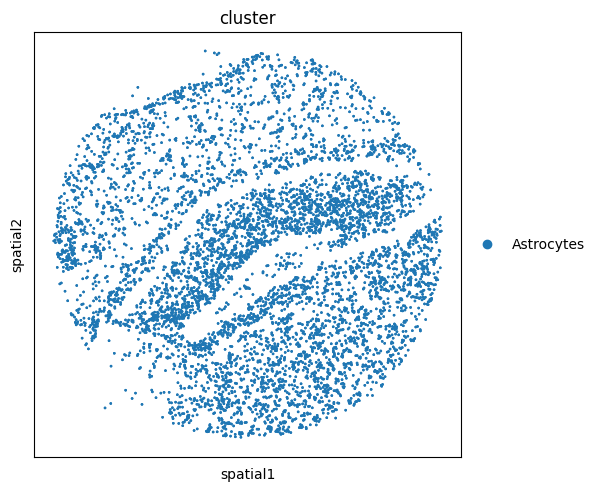

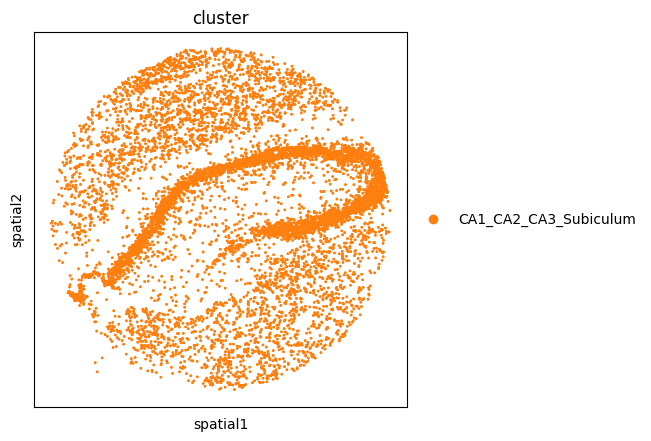

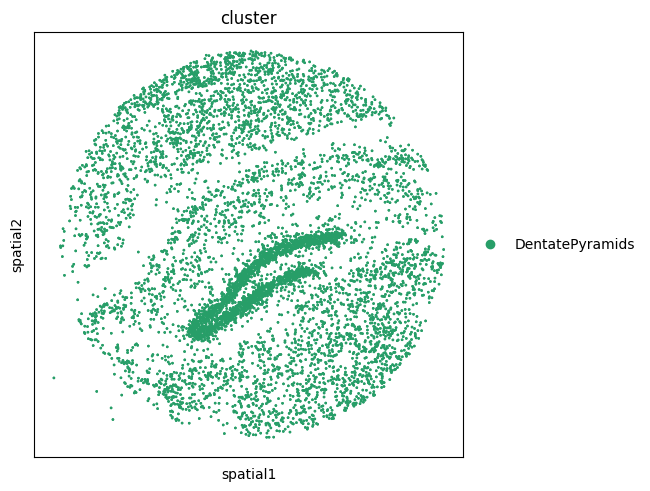

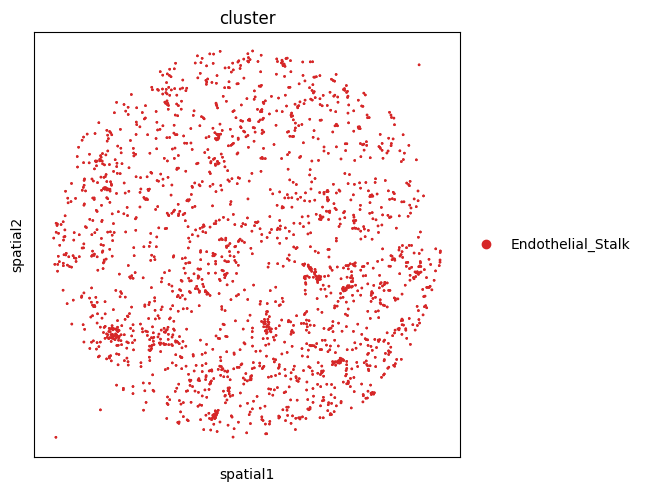

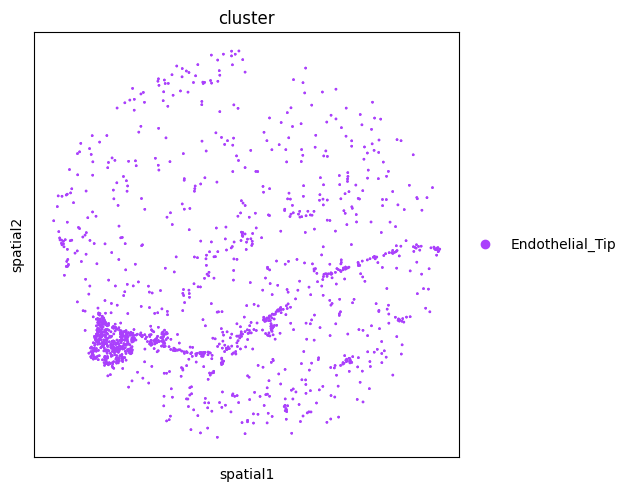

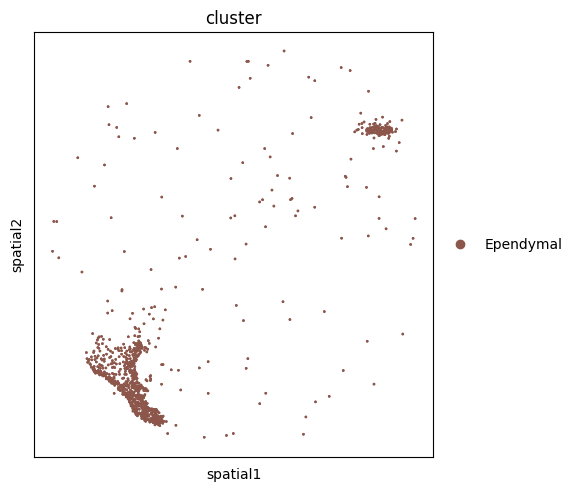

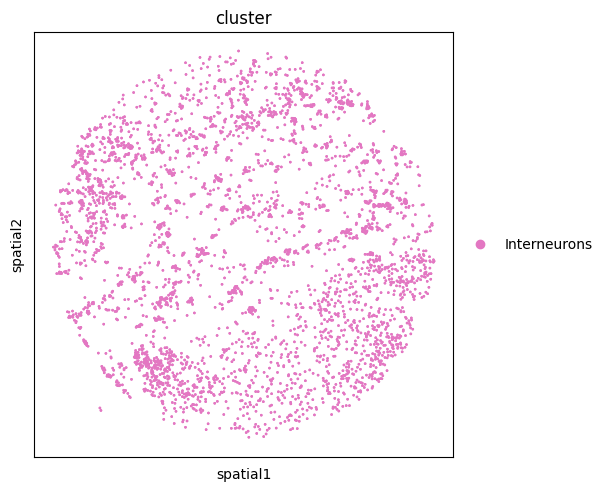

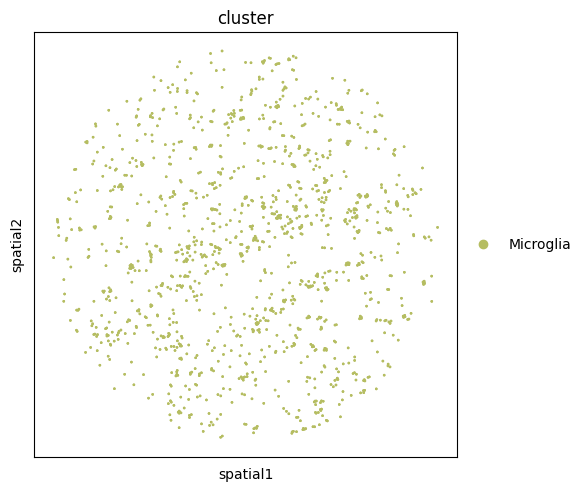

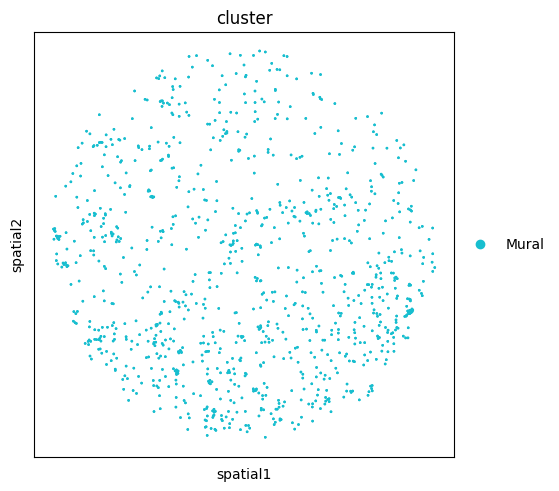

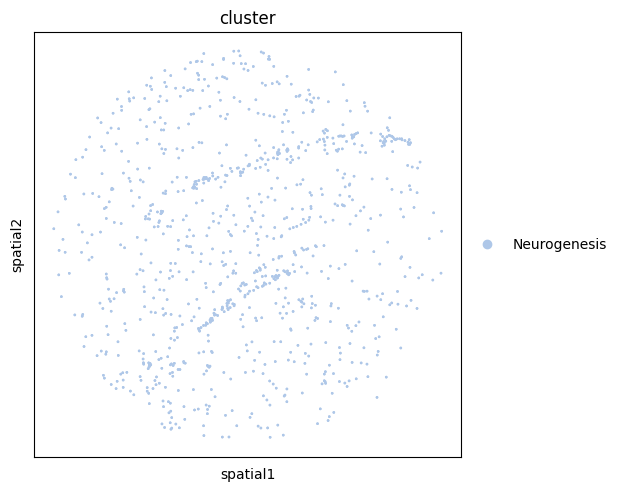

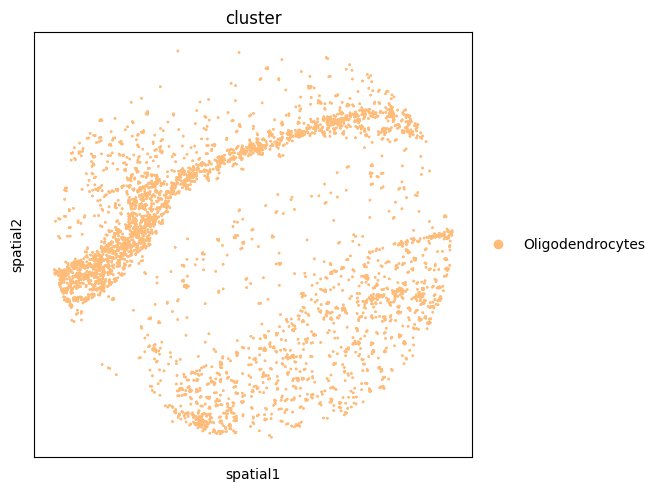

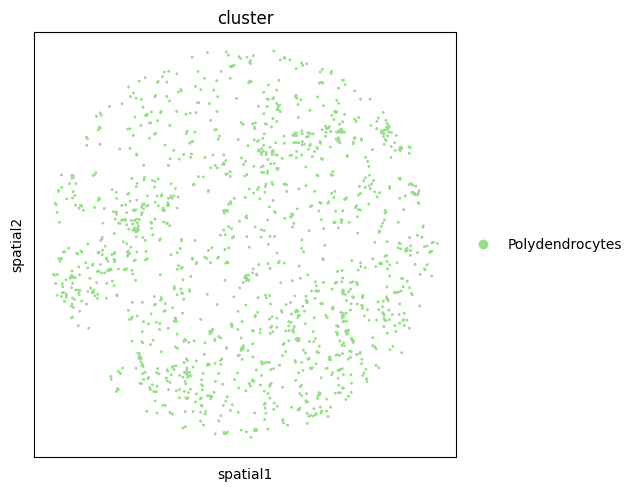

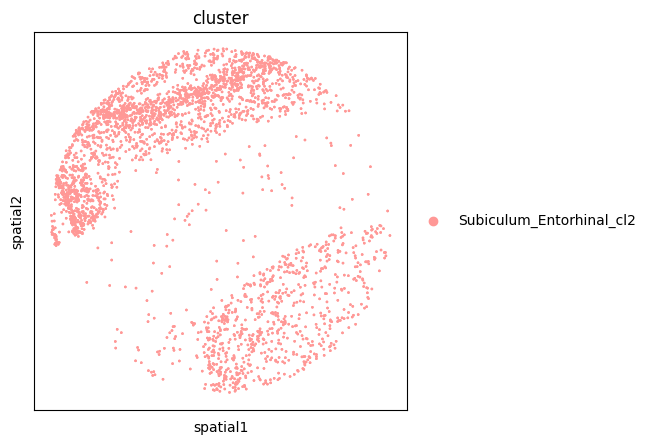

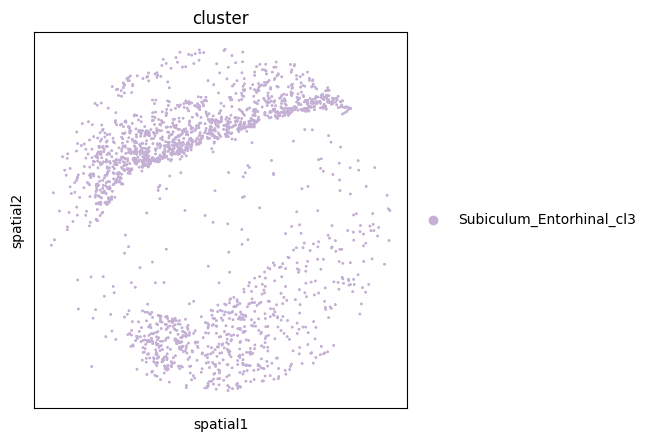

In [6]:
sq.pl.spatial_scatter(
        adata,
        shape=None,
        color="cluster",
        size=3,
    )

for ct in np.unique(adata.obs["cluster"]):
    sq.pl.spatial_scatter(
        adata,
        shape=None,
        color="cluster",
        groups=[ct],
        size=3,
    )

# Co-occurance

In [7]:
sq.gr.co_occurrence(adata, cluster_key="cluster")

## by default, intervals are uniformly spaces across the distances between cells in the computes pairwise distances

/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 231/231 [01:28<00:00,  2.61/s]


The co-occurrence score is defined as:

$$\frac{p(exp|cond)}{p(exp)}$$

where $p(exp|cond)$ is the conditional probability of observing a
cluster $exp$ conditioned on the presence of a cluster $cond$, whereas
$p(exp)$ is the probability of observing $exp$ in the radius size of
interest. The score is computed across increasing radii size around each
cell in the tissue.


Now, after going through the code, I don't think this description is entirely accurate. It seems that the "radii" sizes are actually intervals that keep expanding outward. The cells are not counted from the reference cell outward but instead are counted in the area of a loop that keeps shifting outward. Let's check this below by going through the code of `sq.gr.co_occurrence()`

## defining the intervals

In [8]:
adata.uns['cluster_co_occurrence']['interval']

array([ 213.54742,  258.389  ,  303.23056,  348.07214,  392.9137 ,
        437.75528,  482.59686,  527.4384 ,  572.27997,  617.1216 ,
        661.96313,  706.8047 ,  751.6463 ,  796.48785,  841.3294 ,
        886.171  ,  931.0126 ,  975.8541 , 1020.69574, 1065.5372 ,
       1110.3789 , 1155.2205 , 1200.062  , 1244.9036 , 1289.7451 ,
       1334.5867 , 1379.4282 , 1424.2699 , 1469.1115 , 1513.953  ,
       1558.7946 , 1603.6361 , 1648.4777 , 1693.3193 , 1738.1609 ,
       1783.0024 , 1827.844  , 1872.6855 , 1917.5271 , 1962.3687 ,
       2007.2103 , 2052.0518 , 2096.8933 , 2141.735  , 2186.5767 ,
       2231.4182 , 2276.2598 , 2321.1013 , 2365.9429 , 2410.7844 ],
      dtype=float32)

In [9]:
from sklearn.metrics import pairwise_distances

For example, in the function, if the intervals are not specified, then uses an integer, 50 by default. To split up the intervals, it finds the min/max distances from a distance matrix:

In [10]:
spatial = adata.obsm["spatial"].astype(fp)
spatial

array([[ 888.95, 3219.5 ],
       [4762.2 , 5020.4 ],
       [ 886.5 , 3199.6 ],
       ...,
       [3090.1 , 2045.  ],
       [3304.1 , 3491.5 ],
       [4902.3 , 4354.1 ]], dtype=float32)

In [11]:
## from: def _find_min_max(spatial: NDArrayA) -> tuple[float, float]
coord_sum = np.sum(spatial, axis=1)
min_idx, min_idx2 = np.argpartition(coord_sum, 2)[:2]
max_idx = np.argmax(coord_sum)
# fmt: off
thresh_max = pairwise_distances(spatial[min_idx, :].reshape(1, -1), spatial[max_idx, :].reshape(1, -1))[0, 0] / 2.0
thresh_min = pairwise_distances(spatial[min_idx, :].reshape(1, -1), spatial[min_idx2, :].reshape(1, -1))[0, 0]
# fmt: on

# return thres_min.astype(fp), thres_max.astype(fp)
# thresh_min, thresh_max = _find_min_max(spatial)

In [12]:
thresh_max

2410.784423828125

In [13]:
thresh_min

213.54742

In [14]:
interval = np.linspace(thresh_min, thresh_max, num=50, dtype=fp)
interval

array([ 213.54742,  258.389  ,  303.23056,  348.07214,  392.9137 ,
        437.75528,  482.59686,  527.4384 ,  572.27997,  617.1216 ,
        661.96313,  706.8047 ,  751.6463 ,  796.48785,  841.3294 ,
        886.171  ,  931.0126 ,  975.8541 , 1020.69574, 1065.5372 ,
       1110.3789 , 1155.2205 , 1200.062  , 1244.9036 , 1289.7451 ,
       1334.5867 , 1379.4282 , 1424.2699 , 1469.1115 , 1513.953  ,
       1558.7946 , 1603.6361 , 1648.4777 , 1693.3193 , 1738.1609 ,
       1783.0024 , 1827.844  , 1872.6855 , 1917.5271 , 1962.3687 ,
       2007.2103 , 2052.0518 , 2096.8933 , 2141.735  , 2186.5767 ,
       2231.4182 , 2276.2598 , 2321.1013 , 2365.9429 , 2410.7844 ],
      dtype=float32)

## the splits (for efficiency if needed)

If the dataset is really large, then for memory purposes, will split the data into splits.

Ultimately the goal is to count the number of times a given query cell type is detected in an interval wrt to every cell, and compare to the count when the reference cell is a particular cell type.

If splitting, then every cell type unique and self combination need to be represented. For example:

In [15]:
n_splits = None ## the starting default, but code checks if splits needed
n_obs = spatial.shape[0]
if n_splits is None:
    size_arr = (n_obs**2 * spatial.itemsize) / 1024 / 1024  # calc expected mem usage
    if size_arr > 2000:
        n_splits = 1
        while 2048 < (n_obs / n_splits):
            n_splits += 1
        logg.warning(
            f"`n_splits` was automatically set to `{n_splits}` to "
            f"prevent `{n_obs}x{n_obs}` distance matrix from being created"
        )
    else:
        n_splits = 1
n_splits = max(min(n_splits, n_obs), 1)

NameError: name 'logg' is not defined

In [36]:
n_splits

1

The cluster labels are mapped to integers to be used later in the code

In [16]:
original_clust = adata.obs['cluster']

# annotate cluster idx
clust_map = {v: i for i, v in enumerate(original_clust.cat.categories.values)}
labs = np.array([clust_map[c] for c in original_clust], dtype=ip)
labs_unique = np.array(list(clust_map.values()), dtype=ip)

In [17]:
clust_map

{'Astrocytes': 0,
 'CA1_CA2_CA3_Subiculum': 1,
 'DentatePyramids': 2,
 'Endothelial_Stalk': 3,
 'Endothelial_Tip': 4,
 'Ependymal': 5,
 'Interneurons': 6,
 'Microglia': 7,
 'Mural': 8,
 'Neurogenesis': 9,
 'Oligodendrocytes': 10,
 'Polydendrocytes': 11,
 'Subiculum_Entorhinal_cl2': 12,
 'Subiculum_Entorhinal_cl3': 13}

In [18]:
labs_unique

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
      dtype=int32)

In [19]:
labs

array([2, 1, 2, ..., 2, 6, 0], dtype=int32)

now for the splitting

let's say there were 2 splits:

In [20]:
n_splits = 21

# split array and labels
spatial_splits = tuple(s for s in np.array_split(spatial, n_splits, axis=0) if len(s))
labs_splits = tuple(s for s in np.array_split(labs, n_splits, axis=0) if len(s))
# create idx array including unique combinations and self-comparison
x, y = np.triu_indices_from(np.empty((n_splits, n_splits)))
idx_splits = [(i, j) for i, j in zip(x, y)]

In [21]:
spatial_splits

(array([[ 888.95, 3219.5 ],
        [4762.2 , 5020.4 ],
        [ 886.5 , 3199.6 ],
        ...,
        [4066.6 , 5363.3 ],
        [2167.3 , 4381.  ],
        [3371.2 ,  960.33]], dtype=float32),
 array([[1918.4, 1455.8],
        [1654.6, 2024.3],
        [2327.7, 5368.3],
        ...,
        [1805.1, 1404.9],
        [3145.8, 5024. ],
        [3507.4, 1858.2]], dtype=float32),
 array([[1980.5 , 3235.3 ],
        [3037.  , 1793.  ],
        [1482.  , 3160.  ],
        ...,
        [ 963.89, 3678.2 ],
        [2263.5 , 2788.3 ],
        [3173.8 ,  920.64]], dtype=float32),
 array([[4090.4, 3122.6],
        [2214.3, 2008.8],
        [2686.9, 4103.8],
        ...,
        [2785.1, 1981.8],
        [1697.4, 2965.9],
        [2969.1, 1325.1]], dtype=float32),
 array([[2008.8, 2646.8],
        [4749.6, 1958.6],
        [4808.7, 3072.3],
        ...,
        [3195.2, 3791.2],
        [1727. , 4909.3],
        [3489.9, 1659.1]], dtype=float32),
 array([[2950.2, 4395.9],
        [2437.5, 141

In [22]:
labs_splits

(array([ 2,  1,  2, ...,  2,  4, 11], dtype=int32),
 array([ 2,  1,  2, ...,  1, 12,  1], dtype=int32),
 array([10, 12, 12, ...,  0, 10, 12], dtype=int32),
 array([ 2,  6,  2, ...,  1, 13, 12], dtype=int32),
 array([10,  6,  1, ...,  6,  6, 12], dtype=int32),
 array([ 8,  1, 12, ...,  0,  8, 11], dtype=int32),
 array([ 1, 12, 10, ..., 13,  1,  6], dtype=int32),
 array([10,  0,  1, ...,  0,  6,  3], dtype=int32),
 array([ 1,  2, 10, ...,  2,  4,  1], dtype=int32),
 array([ 3,  8, 10, ..., 10,  0,  7], dtype=int32),
 array([ 0,  2,  8, ..., 13,  2,  6], dtype=int32),
 array([ 2, 10,  7, ...,  8,  9, 13], dtype=int32),
 array([2, 0, 4, ..., 2, 8, 0], dtype=int32),
 array([ 0,  0,  0, ..., 12, 11, 12], dtype=int32),
 array([ 0, 10,  6, ...,  6,  0,  6], dtype=int32),
 array([1, 4, 2, ..., 0, 6, 6], dtype=int32),
 array([ 9,  1,  4, ..., 11,  2,  6], dtype=int32),
 array([ 1, 11,  0, ...,  1,  2,  2], dtype=int32),
 array([ 3,  2,  0, ...,  0, 12,  2], dtype=int32),
 array([0, 8, 3, ..., 3,

In [23]:
idx_splits

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (1, 14),
 (1, 15),
 (1, 16),
 (1, 17),
 (1, 18),
 (1, 19),
 (1, 20),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (2, 11),
 (2, 12),
 (2, 13),
 (2, 14),
 (2, 15),
 (2, 16),
 (2, 17),
 (2, 18),
 (2, 19),
 (2, 20),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (3, 10),
 (3, 11),
 (3, 12),
 (3, 13),
 (3, 14),
 (3, 15),
 (3, 16),
 (3, 17),
 (3, 18),
 (3, 19),
 (3, 20),
 (4, 4),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (4, 10),
 (4, 11),
 (4, 12),
 (4, 13),
 (4, 14),
 (4, 15),
 (4, 16),
 (4, 17),
 (4, 18),
 (4, 19),
 (4, 20),
 (5, 5),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (5, 10),
 (5, 11),
 (5, 12),
 (5, 13),
 (5, 

Notice that the labels and spatial coordinates are divided up, and then for the indices, we have each combination of the different splits to be compared to. 

It's a way we can still do a pairwise comparison of every cell in terms of its distance and also its cell type label and can count the different cell types that are within a certain distance away from a given cell


I wonder if a similar approach could be utilzied in R for efficiency?

The adjacency weight matrix for R could also be stored as a sparse matrix, too for memory purposes

## count occurances

out_lst = parallelize(
    _co_occurrence_helper,
    collection=idx_splits,
    extractor=chain.from_iterable,
    n_jobs=n_jobs,
    backend=backend,
    show_progress_bar=show_progress_bar,
)(
    spatial_splits=spatial_splits,
    labs_splits=labs_splits,
    labs_unique=labs_unique,
    interval=interval,
)
out = list(out_lst)[0] if len(idx_splits) == 1 else sum(list(out_lst)) / len(idx_splits)

Use a helper functions that are parallelized where each job is one of the split combinations

def _co_occurrence_helper(
    idx_splits: Iterable[tuple[int, int]],
    spatial_splits: Sequence[NDArrayA],
    labs_splits: Sequence[NDArrayA],
    labs_unique: NDArrayA,
    interval: NDArrayA,
    queue: SigQueue | None = None,
) -> pd.DataFrame:

    out_lst = []
    for t in idx_splits:
        idx_x, idx_y = t
        labs_x = labs_splits[idx_x]
        labs_y = labs_splits[idx_y]
        dist = pairwise_distances(spatial_splits[idx_x], spatial_splits[idx_y])

        out = _occur_count((labs_x, labs_y), dist, labs_unique, interval)
        out_lst.append(out)

        if queue is not None:
            queue.put(Signal.UPDATE)

    if queue is not None:
        queue.put(Signal.FINISH)

    return out_lst

def _occur_count(
    clust: tuple[NDArrayA, NDArrayA],
    pw_dist: NDArrayA,
    labs_unique: NDArrayA,
    interval: NDArrayA,
) -> NDArrayA:
    num = labs_unique.shape[0]
    out = np.zeros((num, num, interval.shape[0] - 1), dtype=ft)

    for idx in range(interval.shape[0] - 1):
        co_occur = np.zeros((num, num), dtype=ft)
        probs_con = np.zeros((num, num), dtype=ft)

        thres_min = interval[idx]
        thres_max = interval[idx + 1]
        clust_x, clust_y = clust

        idx_x, idx_y = np.nonzero((pw_dist <= thres_max) & (pw_dist > thres_min))
        x = clust_x[idx_x]
        y = clust_y[idx_y]
        for i, j in zip(x, y):
            co_occur[i, j] += 1

        probs_matrix = co_occur / np.sum(co_occur)
        probs = np.sum(probs_matrix, axis=1)

        for c in labs_unique:
            probs_conditional = co_occur[c] / np.sum(co_occur[c])
            probs_con[c, :] = probs_conditional / probs

        out[:, :, idx] = probs_con

    return out

In [24]:
## Let's go back to just having 1 split
## first we get the distance matrix between cells using their spatial coordinates

# dist = pairwise_distances(spatial_splits[idx_x], spatial_splits[idx_y])

dist = pairwise_distances(spatial, spatial)

```
out = _occur_count((labs_x, labs_y), dist, labs_unique, interval)

## let's break it down:

for idx in range(interval.shape[0] - 1):

## for each interval,

co_occur = np.zeros((num, num), dtype=ft)
probs_con = np.zeros((num, num), dtype=ft)

## create a cell type x cell type co-occurance matrix, and then also one for the conditional counts, too

thres_min = interval[idx]
thres_max = interval[idx + 1]

## the thresholds are based on the intervals. So here is where the cells within a given distance interval are defined

```

And the indices of cells that are close together will be determined by:

`pw_dist = dist`

`idx_x, idx_y = np.nonzero((pw_dist <= thres_max) & (pw_dist > thres_min))`

note that the clust is whatever two label splits are being compared.
But its cell type labels.

In [26]:
# clust = tuple([labs, labs])
# clust

In [27]:
t = idx_splits[0]

idx_x, idx_y = t

labs_x = labs_splits[idx_x]
labs_y = labs_splits[idx_y]

clust = tuple([labs_x, labs_y])
clust

(array([ 2,  1,  2, ...,  2,  4, 11], dtype=int32),
 array([ 2,  1,  2, ...,  2,  4, 11], dtype=int32))

Let's start with the first interval:

In [28]:
idx = 0 

clust_x, clust_y = clust

thres_min = interval[idx]
thres_max = interval[idx + 1]

pw_dist = dist
idx_x, idx_y = np.nonzero((pw_dist <= thres_max) & (pw_dist > thres_min))

x = clust_x[idx_x] 
y = clust_y[idx_y]

IndexError: index 1990 is out of bounds for axis 0 with size 1990

what we get are the indices of cells that are within the interval distance of each other.
use these to select the corresponding cell labels:
```
x = clust_x[idx_x] 
y = clust_y[idx_y]
```

Although these are really all of the cells that within the interval distance for each of the cells in the dist matrix. Cells can be counted multiple times here:

In [ ]:
x.shape

In [ ]:
y.shape

Now, we count the number of times the different cell types co occur

```
for i, j in zip(x, y):
        co_occur[i, j] += 1
```

And then the overall probability is just the freuqency of seeing a given cell type in a particular interval

```
probs_matrix = co_occur / np.sum(co_occur)
probs = np.sum(probs_matrix, axis=1)
```

And finally, the conditional is the frequency of seeing a given query cell type in the defined interval if you are a particular reference cell type

```
for c in labs_unique:
    probs_conditional = co_occur[c] / np.sum(co_occur[c])
    probs_con[c, :] = probs_conditional / probs
```

So ultimately, the score could be thought of as how much more likely you are to see a given cell type within a certain interval away if you are a particular reference cell type compared to seeing that cell type in general

## understand the probabilities

The thing is though, as we will see in the slide-seq data where Astrocytes are highly abundant and throughout most of the tissue, all reference cell types tend to see Astrocytes at higher probability than other cell types within each interval. How does this work?

If they are always abundant, then expect the frequency to be high. But also would be divided by seeing Astrocytes in general which should also be high, So high is the ratio the highest for all cell type?

Let's generate just the co-occurance count matrix and probability matrix. 

In [72]:
ft = np.float32

num = labs_unique.shape[0]
out = np.zeros((num, num, interval.shape[0] - 1), dtype=ft)
out_counts = np.zeros((num, num, interval.shape[0] - 1), dtype=ft)
outs_probs = np.zeros((num, num, interval.shape[0] - 1), dtype=ft)
outs_conditional = np.zeros((num, num, interval.shape[0] - 1), dtype=ft)

clust = tuple([labs, labs])
pw_dist = dist

for idx in range(interval.shape[0] - 1):
    co_occur = np.zeros((num, num), dtype=ft)
    probs_con = np.zeros((num, num), dtype=ft)

    thres_min = interval[idx]
    thres_max = interval[idx + 1]
    clust_x, clust_y = clust

    idx_x, idx_y = np.nonzero((pw_dist <= thres_max) & (pw_dist > thres_min))
    x = clust_x[idx_x]
    y = clust_y[idx_y]
    for i, j in zip(x, y):
        co_occur[i, j] += 1

    probs_matrix = co_occur / np.sum(co_occur)
    probs = np.sum(probs_matrix, axis=1)

    for c in labs_unique:
        probs_conditional = co_occur[c] / np.sum(co_occur[c])
        probs_con[c, :] = probs_conditional / probs

    out[:, :, idx] = probs_con
    out_counts[:, :, idx] = co_occur
    outs_probs[:, :, idx] = probs_matrix
    outs_conditional[:, :, idx] = probs_conditional

In [73]:
out

array([[[2.7040877 , 0.9258678 , 1.4275306 , ..., 1.2250825 ,
         1.3033894 , 1.6719059 ],
        [1.5344422 , 1.5528308 , 1.1620684 , ..., 1.1337652 ,
         1.0281669 , 0.866006  ],
        [1.3020208 , 1.1669195 , 1.1401603 , ..., 1.1429012 ,
         0.95682   , 0.989165  ],
        ...,
        [1.0630776 , 0.9797386 , 1.015653  , ..., 1.1037546 ,
         1.0679325 , 1.1300445 ],
        [0.29995555, 1.1033745 , 1.2560201 , ..., 1.0059564 ,
         0.9554941 , 0.8738863 ],
        [0.7973082 , 1.5022659 , 1.0271027 , ..., 1.2191864 ,
         0.95571953, 0.96723264]],

       [[1.5344423 , 1.5528307 , 1.162068  , ..., 1.1337652 ,
         1.028167  , 0.8660059 ],
        [2.1499348 , 1.9133996 , 1.3899982 , ..., 1.3080708 ,
         1.4306833 , 1.1049213 ],
        [0.66700417, 0.80381453, 0.94952255, ..., 1.0152378 ,
         0.997525  , 0.95970964],
        ...,
        [0.8043285 , 1.4553888 , 1.0461335 , ..., 0.9783982 ,
         0.8544868 , 0.9906681 ],
        [1.7

In [75]:
adata.uns['cell type_co_occurrence']['occ']

array([[[2.7040877 , 0.9258678 , 1.4275306 , ..., 1.2250826 ,
         1.3033893 , 1.6719059 ],
        [1.5344422 , 1.5528307 , 1.1620681 , ..., 1.1337651 ,
         1.0281669 , 0.8660059 ],
        [1.3020208 , 1.1669195 , 1.1401603 , ..., 1.1429012 ,
         0.95681995, 0.9891649 ],
        ...,
        [1.0630777 , 0.9797385 , 1.015653  , ..., 1.1037546 ,
         1.0679324 , 1.1300445 ],
        [0.29995555, 1.1033745 , 1.2560201 , ..., 1.0059565 ,
         0.9554941 , 0.8738862 ],
        [0.7973082 , 1.5022659 , 1.0271027 , ..., 1.2191864 ,
         0.9557194 , 0.9672326 ]],

       [[1.5344422 , 1.5528308 , 1.162068  , ..., 1.1337652 ,
         1.0281669 , 0.8660059 ],
        [2.1499345 , 1.9133996 , 1.389998  , ..., 1.3080707 ,
         1.4306834 , 1.1049211 ],
        [0.6670041 , 0.80381453, 0.9495225 , ..., 1.0152378 ,
         0.9975249 , 0.9597096 ],
        ...,
        [0.80432856, 1.4553885 , 1.0461335 , ..., 0.9783982 ,
         0.85448676, 0.99066806],
        [1.7

checks out - same values

In [76]:
out_counts

array([[[  10.,    6.,   12., ...,   44.,   46.,   58.],
        [   9.,   14.,   14., ...,   60.,   55.,   45.],
        [  32.,   48.,   62., ...,  259.,  212.,  214.],
        ...,
        [  10.,   15.,   21., ...,   98.,   94.,   99.],
        [   2.,   12.,   19., ...,   63.,   60.,   54.],
        [   5.,   16.,   15., ...,   69.,   53.,   52.]],

       [[   9.,   14.,   14., ...,   60.,   55.,   45.],
        [  20.,   24.,   24., ...,  102.,  116.,   86.],
        [  26.,   46.,   74., ...,  339.,  335.,  311.],
        ...,
        [  12.,   31.,   31., ...,  128.,  114.,  130.],
        [  19.,   28.,   29., ...,   87.,  100.,   63.],
        [  14.,   23.,   27., ...,  100.,   87.,   79.]],

       [[  32.,   48.,   62., ...,  259.,  212.,  214.],
        [  26.,   46.,   74., ...,  339.,  335.,  311.],
        [ 572.,  556.,  522., ..., 1244., 1276., 1186.],
        ...,
        [  68.,  101.,  152., ...,  557.,  563.,  582.],
        [  90.,  112.,  106., ...,  348.,  36

In [78]:
out_counts[:,:,0]

array([[1.0000e+01, 9.0000e+00, 3.2000e+01, 2.8600e+02, 2.5000e+01,
        2.0000e+00, 1.2000e+01, 8.0000e+00, 1.0000e+01, 2.0000e+00,
        5.0000e+00],
       [9.0000e+00, 2.0000e+01, 2.6000e+01, 4.2900e+02, 6.3000e+01,
        8.0000e+00, 2.2000e+01, 1.4000e+01, 1.2000e+01, 1.9000e+01,
        1.4000e+01],
       [3.2000e+01, 2.6000e+01, 5.7200e+02, 1.1990e+03, 9.1000e+01,
        1.4500e+02, 2.5900e+02, 6.1000e+01, 6.8000e+01, 9.0000e+01,
        1.2200e+02],
       [2.8600e+02, 4.2900e+02, 1.1990e+03, 2.2792e+04, 1.6340e+03,
        2.8600e+02, 7.1600e+02, 1.1220e+03, 6.5100e+02, 3.0100e+02,
        2.6500e+02],
       [2.5000e+01, 6.3000e+01, 9.1000e+01, 1.6340e+03, 1.2400e+03,
        2.4000e+01, 9.8000e+01, 6.7000e+01, 7.5000e+01, 7.8000e+01,
        2.7000e+01],
       [2.0000e+00, 8.0000e+00, 1.4500e+02, 2.8600e+02, 2.4000e+01,
        4.4000e+01, 8.9000e+01, 1.1000e+01, 1.9000e+01, 3.2000e+01,
        4.6000e+01],
       [1.2000e+01, 2.2000e+01, 2.5900e+02, 7.1600e+02, 9.

```
probs_matrix = co_occur / np.sum(co_occur)
probs = np.sum(probs_matrix, axis=1)
```

In [80]:
np.sum(out_counts[:,:,0]) # total counts of all interactions for this given interal; np.sum(co_occur)

43482.0

In [105]:
# probs_matrix = co_occur / np.sum(co_occur) ## outs_probs

In [88]:
out_counts[:,0,0]

array([ 10.,   9.,  32., 286.,  25.,   2.,  12.,   8.,  10.,   2.,   5.],
      dtype=float32)

check the `probs_matrix`:

In [89]:
out_counts[:,0,0] / np.sum(out_counts[:,:,0]) # first vector of co_occur / np.sum(co_occur)

array([2.2998021e-04, 2.0698219e-04, 7.3593669e-04, 6.5774345e-03,
       5.7495054e-04, 4.5996043e-05, 2.7597626e-04, 1.8398417e-04,
       2.2998021e-04, 4.5996043e-05, 1.1499011e-04], dtype=float32)

In [79]:
outs_probs[:,:,0] # the "probs_matrix" for this interval; co_occur / np.sum(co_occur)

array([[2.2998021e-04, 2.0698219e-04, 7.3593669e-04, 6.5774345e-03,
        5.7495054e-04, 4.5996043e-05, 2.7597626e-04, 1.8398417e-04,
        2.2998021e-04, 4.5996043e-05, 1.1499011e-04],
       [2.0698219e-04, 4.5996043e-04, 5.9794856e-04, 9.8661520e-03,
        1.4488754e-03, 1.8398417e-04, 5.0595647e-04, 3.2197230e-04,
        2.7597626e-04, 4.3696241e-04, 3.2197230e-04],
       [7.3593669e-04, 5.9794856e-04, 1.3154869e-02, 2.7574629e-02,
        2.0928201e-03, 3.3347132e-03, 5.9564877e-03, 1.4028794e-03,
        1.5638655e-03, 2.0698220e-03, 2.8057587e-03],
       [6.5774345e-03, 9.8661520e-03, 2.7574629e-02, 5.2417094e-01,
        3.7578769e-02, 6.5774345e-03, 1.6466584e-02, 2.5803780e-02,
        1.4971713e-02, 6.9224047e-03, 6.0944757e-03],
       [5.7495054e-04, 1.4488754e-03, 2.0928201e-03, 3.7578769e-02,
        2.8517548e-02, 5.5195251e-04, 2.2538062e-03, 1.5408675e-03,
        1.7248517e-03, 1.7938457e-03, 6.2094658e-04],
       [4.5996043e-05, 1.8398417e-04, 3.3347132e-0

first row/vector check out

`probs = np.sum(probs_matrix, axis=1)`; now take the row sum (sum across the vectors) of the probs_matrix

In [102]:
## `probs` is the unconditioned probability of seeing a given cell type, do this for this interval:

np.sum(outs_probs[:,:,0], axis=1)

array([0.00922221, 0.01462674, 0.06128973, 0.6826043 , 0.07869924,
       0.0162366 , 0.04758291, 0.03401407, 0.02345798, 0.01662757,
       0.01563866], dtype=float32)

In [93]:
np.sum(outs_probs[:,0,0]) ## check the first one:

0.009222207

axis = 1 should be rows. So yes, we ultimately get the frequency of seeing each cell type within the interval.

In [94]:
np.sum(np.sum(outs_probs[:,:,0], axis=1)) # check to make sure they all add up to 1

1.0000001

now for the conditional probability:

`probs_conditional = co_occur[c] / np.sum(co_occur[c])`

In [97]:
out_counts[:,:,0][0] # co_occur[c]; note that this is a row, or really the first vector/array in this matrix.

array([ 10.,   9.,  32., 286.,  25.,   2.,  12.,   8.,  10.,   2.,   5.],
      dtype=float32)

In [98]:
np.sum(out_counts[:,:,0][0]) # np.sum(co_occur[c]); total interactions for this given cell type c

401.0

`probs_conditional = co_occur[c] / np.sum(co_occur[c])`

In [103]:
# conditional prob -> prob of seeing a query cell type given the reference cell type c
out_counts[:,:,0][0] / np.sum(out_counts[:,:,0][0]) 

array([0.02493766, 0.02244389, 0.0798005 , 0.71321696, 0.06234414,
       0.00498753, 0.02992519, 0.01995013, 0.02493766, 0.00498753,
       0.01246883], dtype=float32)

In [104]:
np.sum(out_counts[:,:,0][0] / np.sum(out_counts[:,:,0][0])) # check make sure adds to 1

0.99999994

check:

In [100]:
probs_con = np.zeros((num, num), dtype=ft)
probs_con

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

`probs_con[0, :] = probs_conditional / probs`

now we look at the ratio of the conditional prob vs the overall prob

In [106]:
out_counts[:,:,0][0] / np.sum(out_counts[:,:,0][0]) / np.sum(outs_probs[:,:,0], axis=1)

array([2.7040877 , 1.5344422 , 1.3020208 , 1.0448469 , 0.79218227,
       0.30717826, 0.6289062 , 0.5865256 , 1.0630776 , 0.29995555,
       0.7973082 ], dtype=float32)

check:

In [112]:
adata.uns['cell type_co_occurrence']['occ'][0][:,0] # first interval, all the cell types (rows) vs cell type c (col)

array([2.7040877 , 1.5344422 , 1.3020208 , 1.0448469 , 0.79218227,
       0.30717826, 0.62890625, 0.5865256 , 1.0630777 , 0.29995555,
       0.7973082 ], dtype=float32)

## Visualize the intervals

Let's check to see if the interpretation that we are only looking at cells within a given interval is true

In [114]:
interval

array([ 12.973341,  23.476469,  33.9796  ,  44.482727,  54.985855,
        65.48898 ,  75.99211 ,  86.49524 ,  96.99837 , 107.5015  ,
       118.00463 , 128.50775 , 139.01088 , 149.514   , 160.01714 ,
       170.52028 , 181.0234  , 191.52654 , 202.02966 , 212.53279 ,
       223.03592 , 233.53905 , 244.04218 , 254.5453  , 265.04843 ,
       275.55154 , 286.0547  , 296.55783 , 307.06094 , 317.5641  ,
       328.0672  , 338.57034 , 349.07346 , 359.5766  , 370.0797  ,
       380.58286 , 391.08597 , 401.5891  , 412.09222 , 422.59537 ,
       433.09848 , 443.60162 , 454.10474 , 464.60788 , 475.111   ,
       485.61414 , 496.11725 , 506.6204  , 517.12354 , 527.62665 ],
      dtype=float32)

In [115]:
dist

array([[  0.      ,  26.833494,  35.016193, ..., 957.6264  , 971.61505 ,
        985.66614 ],
       [ 26.833494,   0.      ,   8.780245, ..., 938.8264  , 952.49884 ,
        966.2312  ],
       [ 35.016193,   8.780245,   0.      , ..., 935.93787 , 949.46924 ,
        963.0581  ],
       ...,
       [957.6264  , 938.8264  , 935.93787 , ...,   0.      ,  21.07867 ,
         42.675697],
       [971.61505 , 952.49884 , 949.46924 , ...,  21.07867 ,   0.      ,
         21.60323 ],
       [985.66614 , 966.2312  , 963.0581  , ...,  42.675697,  21.60323 ,
          0.      ]], dtype=float32)

In [116]:
idx = 0

clust_x, clust_y = clust

thres_min = interval[idx]
thres_max = interval[idx + 1]

pw_dist = dist
idx_x, idx_y = np.nonzero((pw_dist <= thres_max) & (pw_dist > thres_min))

x = clust_x[idx_x] 
y = clust_y[idx_y]

In [119]:
idx_x

array([   0,    0,    0, ..., 4667, 4667, 4667])

In [120]:
idx_y

array([  41,  123,  131, ..., 4639, 4645, 4666])

In [122]:
spatial

array([[  1.709091 ,  15.327272 ],
       [  3.8494623,  42.075268 ],
       [  0.8666667,  50.333332 ],
       ...,
       [730.1429   , 636.9643   ],
       [730.375    , 658.0417   ],
       [729.8763   , 679.63916  ]], dtype=float32)

In [124]:
spatial[420]

array([ 57.81778, 647.98224], dtype=float32)

In [129]:
adata[420, :].obsm['spatial']

ArrayView([[ 57.81777778, 647.98222222]])

/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


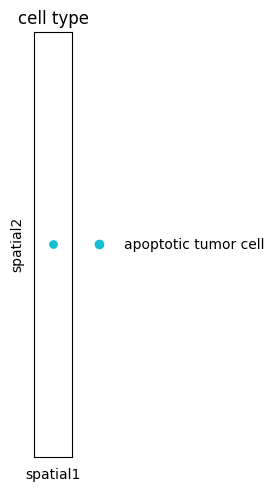

In [125]:
sq.pl.spatial_scatter(
    adata[420, :],
    shape=None,
    color="cell type",
    size=100,
)

In [133]:
dist[420]

array([635.1382 , 608.3057 , 600.35626, ..., 672.4154 , 672.63245,
       672.80365], dtype=float32)

In [146]:
idx = 10

thres_min = interval[idx]
thres_max = interval[idx + 1]

pw_dist = dist
neighs = np.nonzero((dist[420] <= thres_max) & (dist[420] > thres_min))


In [147]:
neighs[0]

array([  14,   68,  122,  126,  175,  217,  234,  267,  306,  363,  365,
        390,  418,  582,  594,  632,  645,  677,  769,  780,  784,  853,
        928,  932,  975,  986, 1008, 1012, 1041, 1042, 1088, 1115, 1157,
       1175, 1185, 1200, 1201, 1204, 1230])

In [148]:
neighs = np.append(neighs[0], 420)

/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


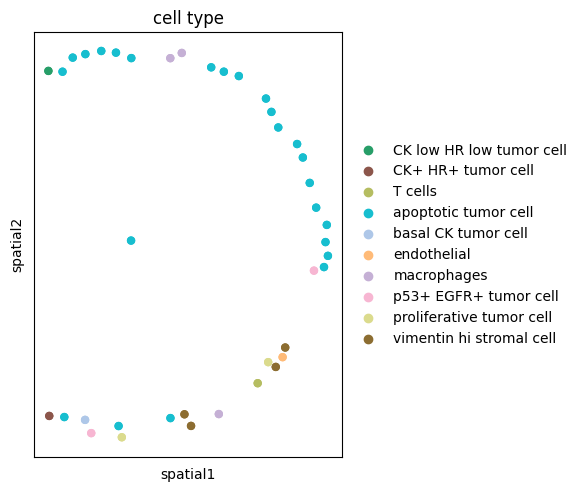

In [149]:
sq.pl.spatial_scatter(
    adata[neighs, :],
    shape=None,
    color="cell type",
    size=100,
)

## Visualize the co-occurance plots

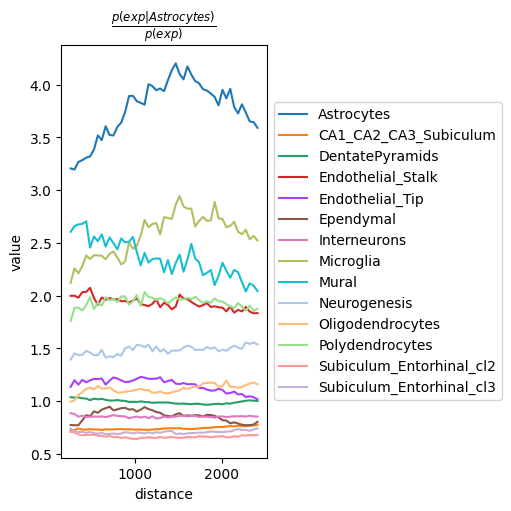

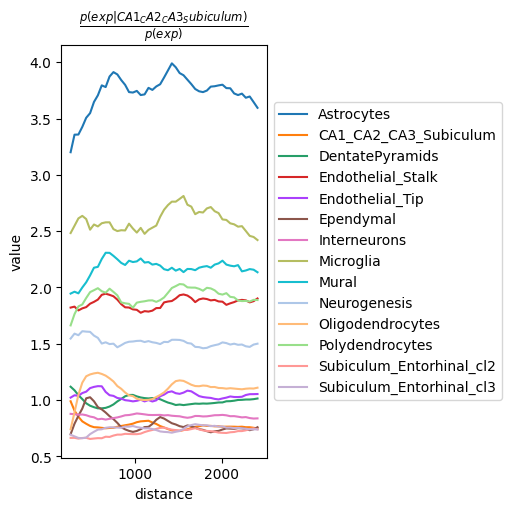

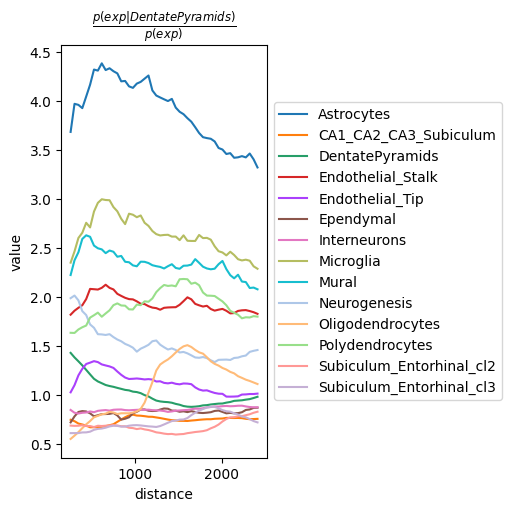

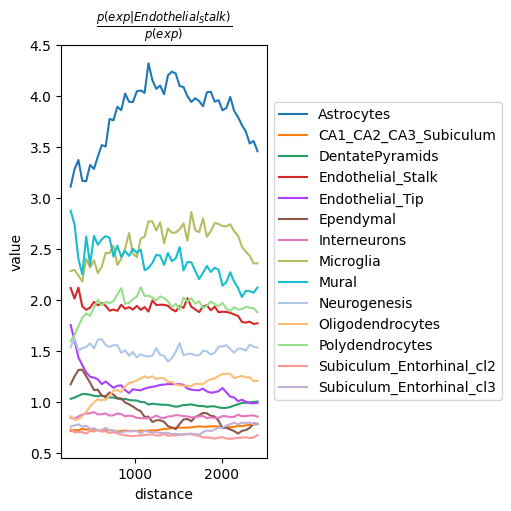

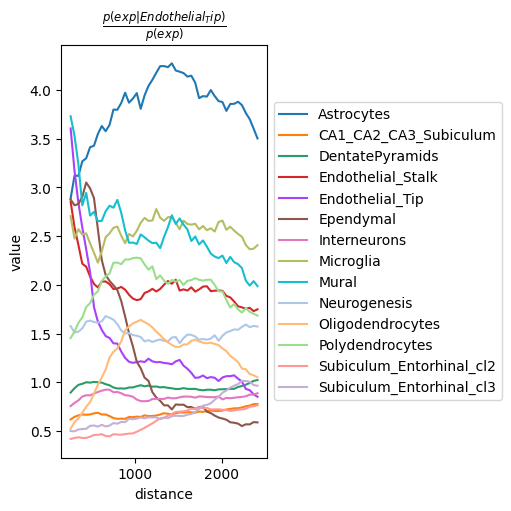

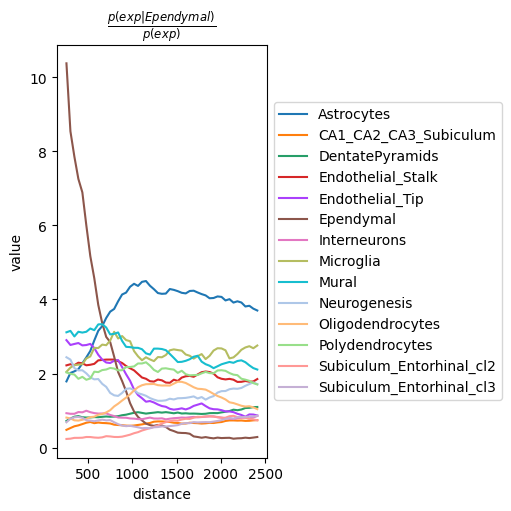

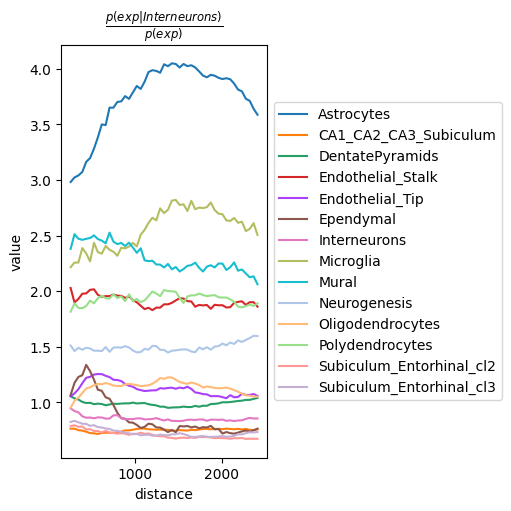

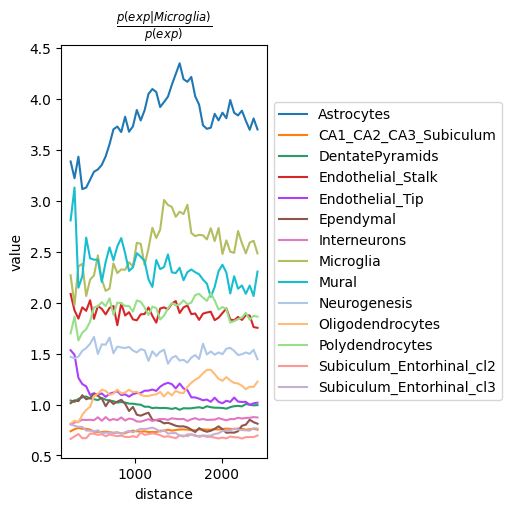

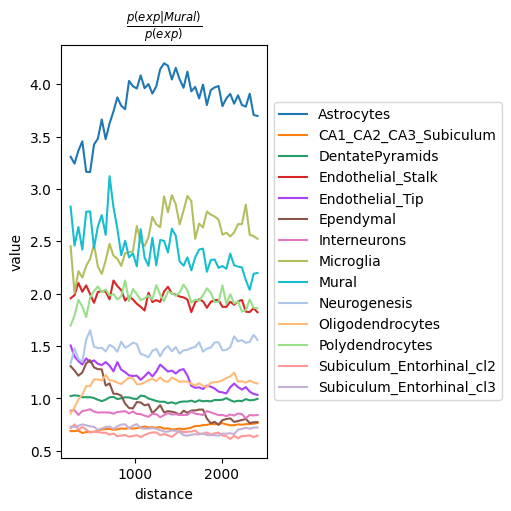

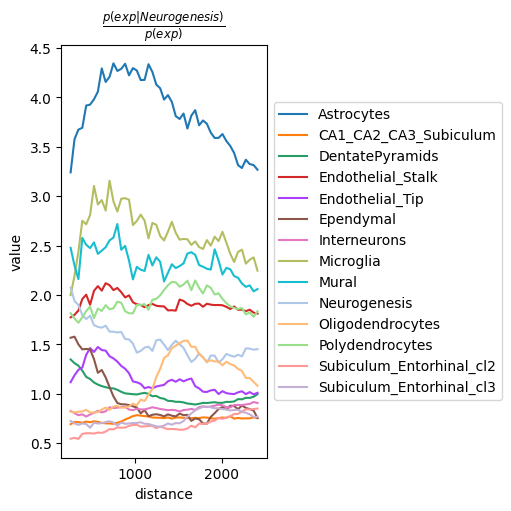

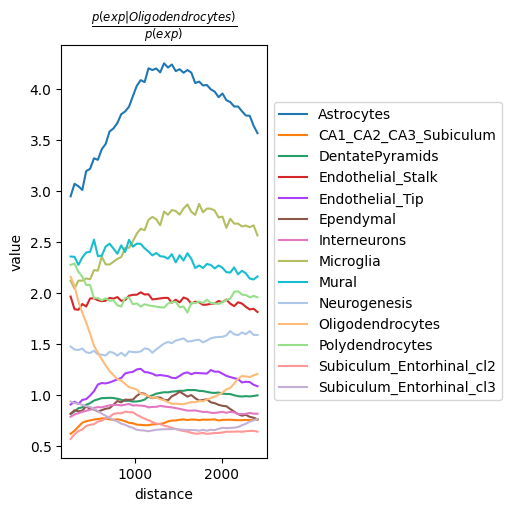

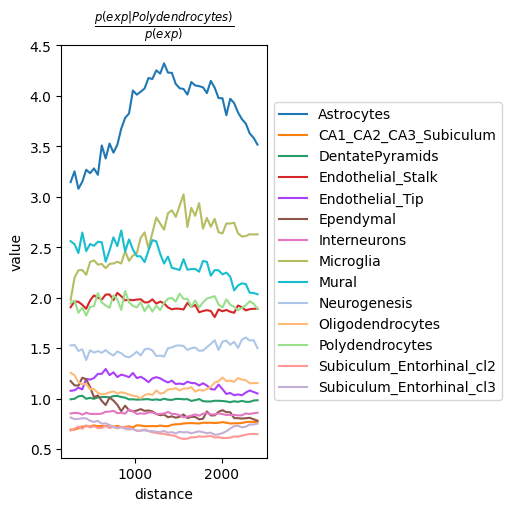

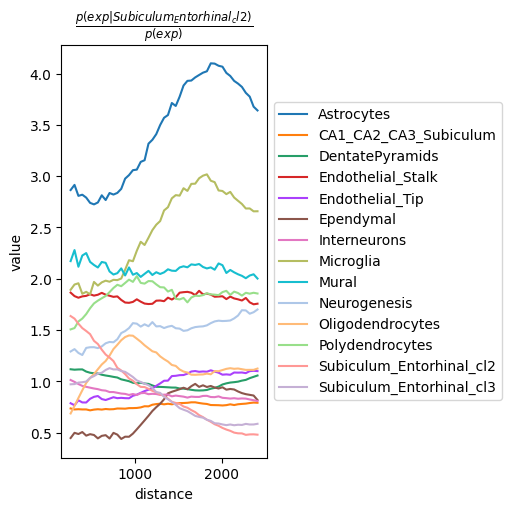

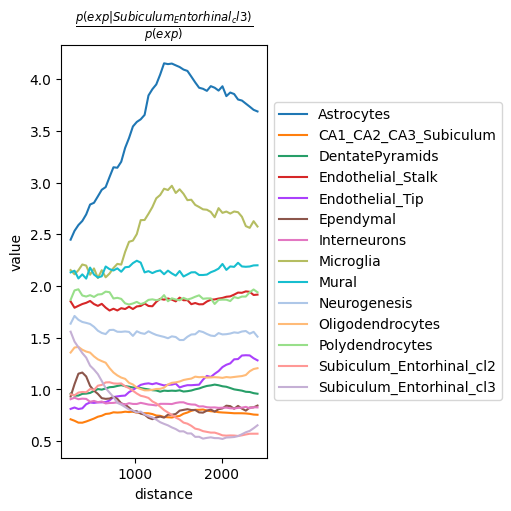

In [29]:
for ct in np.unique(adata.obs["cluster"]):
    sq.pl.co_occurrence(adata, cluster_key="cluster", clusters=ct)

one note is that if I shuffle the labels globally all trends are pretty much hovering around 1 for all intervals

## Questions and thoughts

How informative is this co_occurance metric?

Does it give correct interpretations?

Can it lead to quantifiable results?

Does it misinterpret anything?

# Spatial neighbors

The next analyses involve generating some sort of neighbor graph.

use the `sq.gr.spatial_neighbors()` function

either some max number cells that are closest to a given cell

or, delauney triangulation

or, a radius euclidean distance (closest to my approach)

In [30]:
sq.gr.spatial_neighbors(adata, delaunay=False, coord_type="generic") ## 6 by default

In [31]:
_, idx = adata.obsp["spatial_connectivities"][420, :].nonzero()
idx

array([ 1536,  2860,  3362,  6950,  7716, 24875, 25678], dtype=int32)

/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


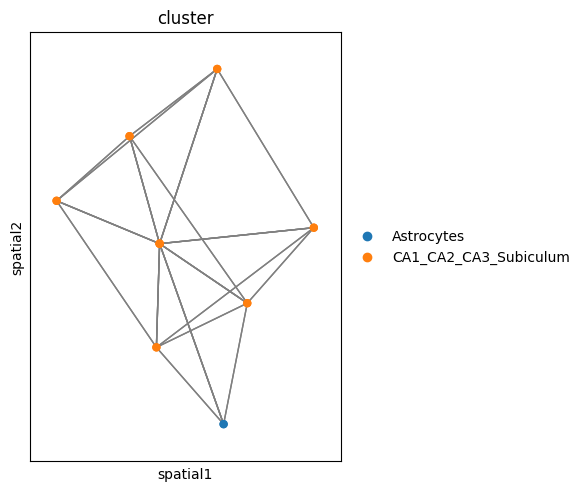

In [33]:
idx = np.append(idx, 420)
sq.pl.spatial_scatter(adata[idx, :],
                      shape=None,
                      color="cluster",
                      connectivity_key="spatial_connectivities",
                      size=100)

A little odd that there is 7 cells. I thought 6 was default unless if I misunderstand what n_neighs and the default setting do

In [34]:
sq.gr.spatial_neighbors(adata, delaunay=True, coord_type="generic") ## delauney

In [35]:
_, idx = adata.obsp["spatial_connectivities"][420, :].nonzero()
idx

array([25678,  1536,  2860,  7716, 24875,  6950], dtype=int32)

/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


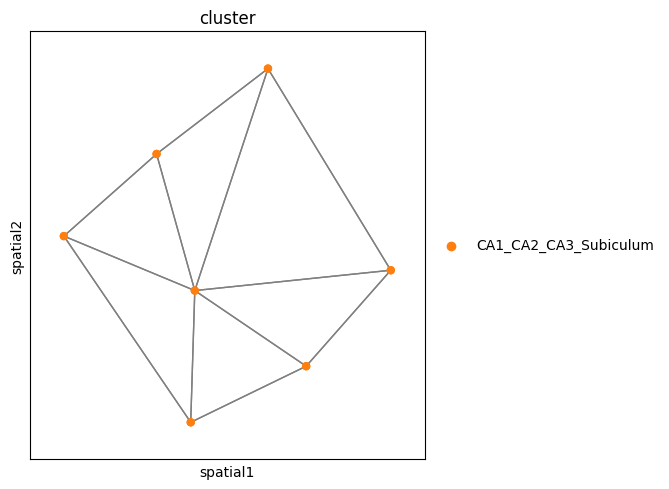

In [36]:
idx = np.append(idx, 420)
sq.pl.spatial_scatter(adata[idx, :],
                      shape=None,
                      color="cluster",
                      connectivity_key="spatial_connectivities",
                      size=100)

In [37]:
sq.gr.spatial_neighbors(adata, delaunay=False, n_neighs=20, coord_type="generic") ## 20 neighbors

In [38]:
_, idx = adata.obsp["spatial_connectivities"][420, :].nonzero()
idx

array([  464,   700,   711,  1536,  2860,  3362,  3676,  4934,  5920,
        6950,  7716,  8268, 13616, 18917, 24875, 25678, 29850],
      dtype=int32)

/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


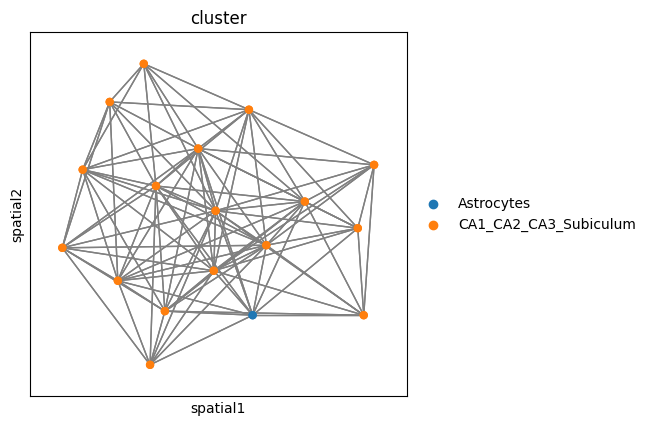

In [39]:
idx = np.append(idx, 420)
sq.pl.spatial_scatter(adata[idx, :],
                      shape=None,
                      color="cluster",
                      connectivity_key="spatial_connectivities",
                      size=100)

In [40]:
sq.gr.spatial_neighbors(adata, delaunay=False, radius=50, coord_type="generic") ## radius 50

In [41]:
_, idx = adata.obsp["spatial_connectivities"][420, :].nonzero()
idx

array([  464,   700,   711,  1536,  2860,  3362,  3676,  4934,  5920,
        6950,  7716,  8268, 13616, 18917, 22778, 24875, 25678, 28198,
       29850], dtype=int32)

/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


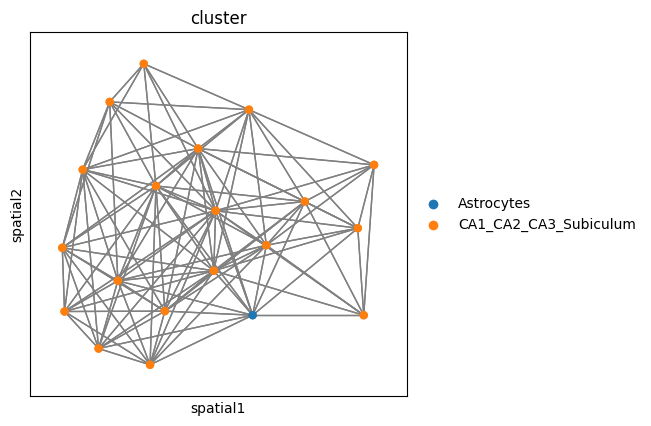

In [42]:
idx = np.append(idx, 420)
sq.pl.spatial_scatter(adata[idx, :],
                      shape=None,
                      color="cluster",
                      connectivity_key="spatial_connectivities",
                      size=100)

Can save the information of each one:
```
Otherwise, modifies the ``adata`` with the following keys:

        - :attr:`anndata.AnnData.obsp` ``['{{key_added}}_connectivities']`` - the spatial connectivities.
        - :attr:`anndata.AnnData.obsp` ``['{{key_added}}_distances']`` - the spatial distances.
        - :attr:`anndata.AnnData.uns`  ``['{{key_added}}']`` - :class:`dict` containing parameters.
```

In [43]:
sq.gr.spatial_neighbors(adata, delaunay=False, coord_type="generic", key_added="nn6") ## 6 by default

In [44]:
sq.gr.spatial_neighbors(adata, delaunay=True, coord_type="generic", key_added="delaunay")

In [45]:
sq.gr.spatial_neighbors(adata, delaunay=False, n_neighs=20, coord_type="generic", key_added="nn20")

In [46]:
sq.gr.spatial_neighbors(adata, delaunay=False, radius=50, coord_type="generic", key_added="r50")

In [47]:
sq.gr.spatial_neighbors(adata, delaunay=False, radius=20, coord_type="generic", key_added="r20")

In [48]:
sq.gr.spatial_neighbors(adata, delaunay=False, radius=100, coord_type="generic", key_added="r100")

In [56]:
sq.gr.spatial_neighbors(adata, delaunay=False, radius=30, coord_type="generic", key_added="r30")

In [57]:
adata.obsp

PairwiseArrays with keys: connectivities, distances, spatial_connectivities, spatial_distances, nn6_connectivities, nn6_distances, delaunay_connectivities, delaunay_distances, nn20_connectivities, nn20_distances, r50_connectivities, r50_distances, r20_connectivities, r20_distances, r100_connectivities, r100_distances, r30_connectivities, r30_distances

/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


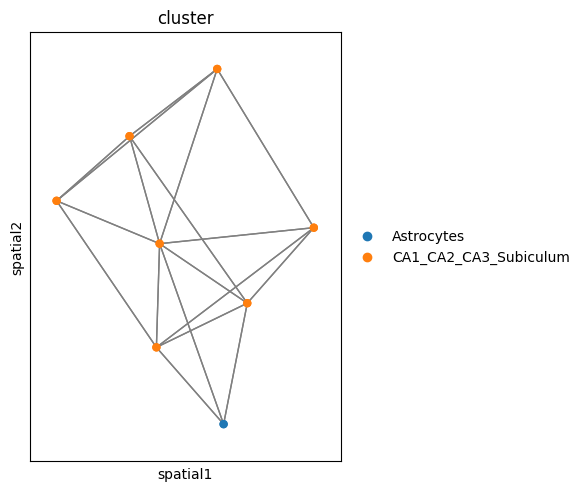

In [50]:
_, idx = adata.obsp["nn6_connectivities"][420, :].nonzero()
idx = np.append(idx, 420)
sq.pl.spatial_scatter(adata[idx, :],
                      shape=None,
                      color="cluster",
                      spatial_key="spatial", ## the only thing in .obsm
                      connectivity_key="nn6_connectivities",
                      size=100)

/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


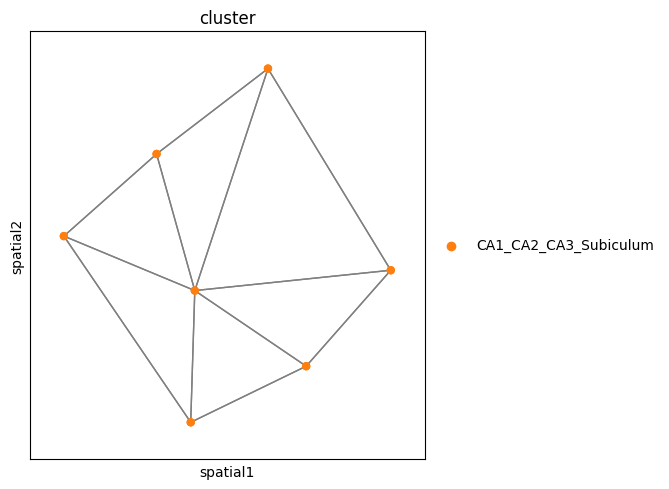

In [51]:
_, idx = adata.obsp["delaunay_connectivities"][420, :].nonzero()
idx = np.append(idx, 420)
sq.pl.spatial_scatter(adata[idx, :],
                      shape=None,
                      color="cluster",
                      spatial_key="spatial", ## the only thing in .obsm
                      connectivity_key="delaunay_distances", ## not sure difference between "_connectivity" and "_distances"
                      size=100)

/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


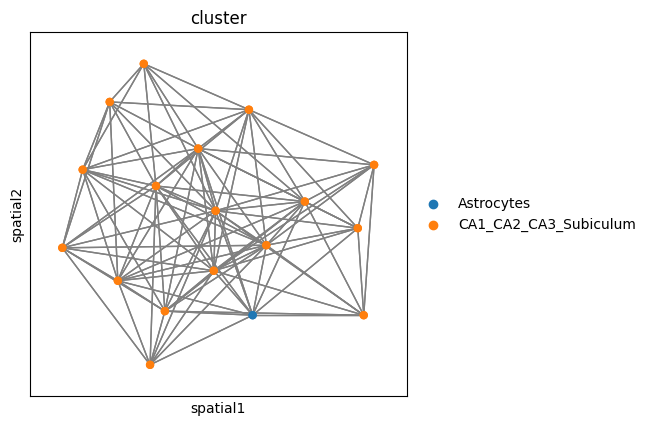

In [52]:
_, idx = adata.obsp["nn20_connectivities"][420, :].nonzero()
idx = np.append(idx, 420)
sq.pl.spatial_scatter(adata[idx, :],
                      shape=None,
                      color="cluster",
                      spatial_key="spatial", ## the only thing in .obsm
                      connectivity_key="nn20_connectivities", ## not sure difference between "_connectivities" and "_distances"
                      size=100)

/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


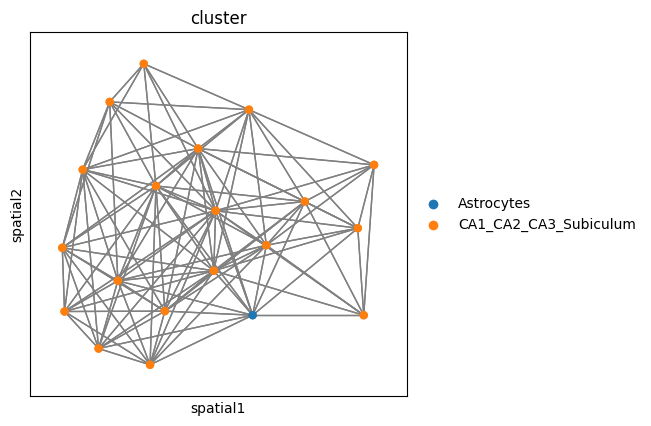

In [53]:
_, idx = adata.obsp["r50_connectivities"][420, :].nonzero()
idx = np.append(idx, 420)
sq.pl.spatial_scatter(adata[idx, :],
                      shape=None,
                      color="cluster",
                      spatial_key="spatial", ## the only thing in .obsm
                      connectivity_key="r50_connectivities", ## not sure difference between "_connectivities" and "_distances"
                      size=100)

/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


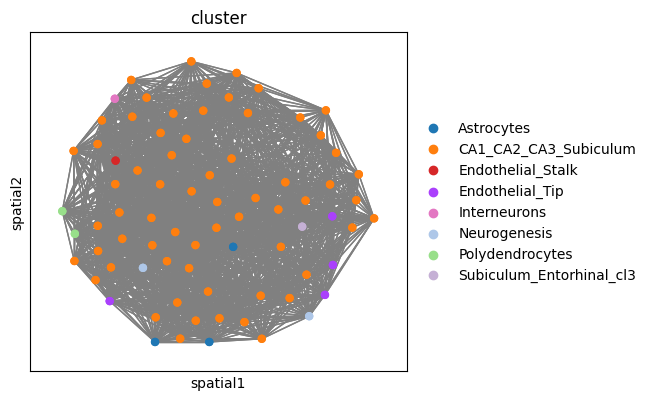

In [54]:
_, idx = adata.obsp["r100_connectivities"][420, :].nonzero()
idx = np.append(idx, 420)
sq.pl.spatial_scatter(adata[idx, :],
                      shape=None,
                      color="cluster",
                      spatial_key="spatial", ## the only thing in .obsm
                      connectivity_key="r100_connectivities", ## not sure difference between "_connectivities" and "_distances"
                      size=100)

/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


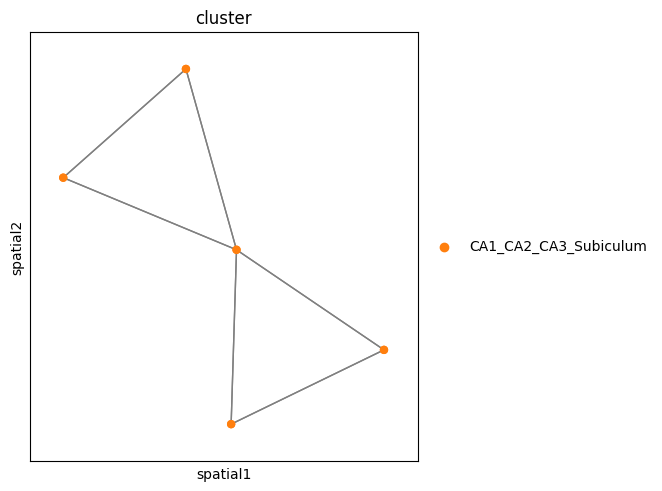

In [55]:
_, idx = adata.obsp["r20_connectivities"][420, :].nonzero()
idx = np.append(idx, 420)
sq.pl.spatial_scatter(adata[idx, :],
                      shape=None,
                      color="cluster",
                      spatial_key="spatial", ## the only thing in .obsm
                      connectivity_key="r20_connectivities", ## not sure difference between "_connectivities" and "_distances"
                      size=100)

/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


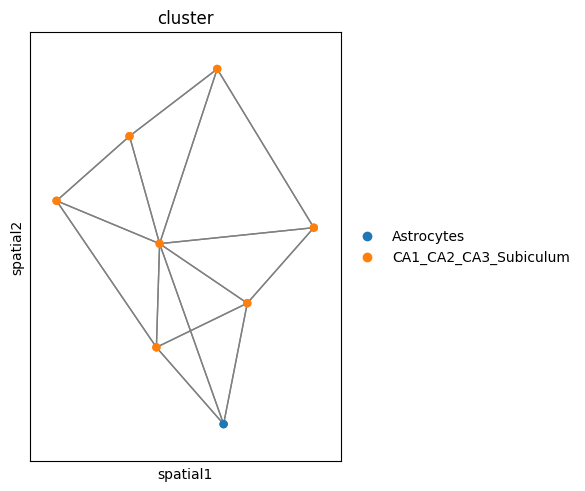

In [58]:
_, idx = adata.obsp["r30_connectivities"][420, :].nonzero()
idx = np.append(idx, 420)
sq.pl.spatial_scatter(adata[idx, :],
                      shape=None,
                      color="cluster",
                      spatial_key="spatial", ## the only thing in .obsm
                      connectivity_key="r30_connectivities", ## not sure difference between "_connectivities" and "_distances"
                      size=100)

# Neighborhood Enrichment

Counts the number of connections between clusters.

So how many connections between cells of cell type A and cell type B, based on whatever connectivity graph you used.

Then does a permutations test, which basically shuffles the labels and then counts again. Creates a null distribution

So Z score is the real counts of connections for a given reference cell type clusters to a given query cluster, compared to the shuffled null distribution


Presumably, if you use nn=6, or delaunay, then connections based on cell types that are real close, like actual neighbors.

If use radius, then we're talking something that is a lot closer to what I do.

However, the permutations are global shuffles, like what I used to do.

So I wonder if I set my distance small, like to 20, it will be similar to the delaunay, etc results if I look at the global shuffling of my analysis?

Likewise, I think I have d=50 already, so maybe I can already compare this to the r50 I generated here and should expect similar Z scores?

## nn6

### nhood enrichment

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 110.58/s]


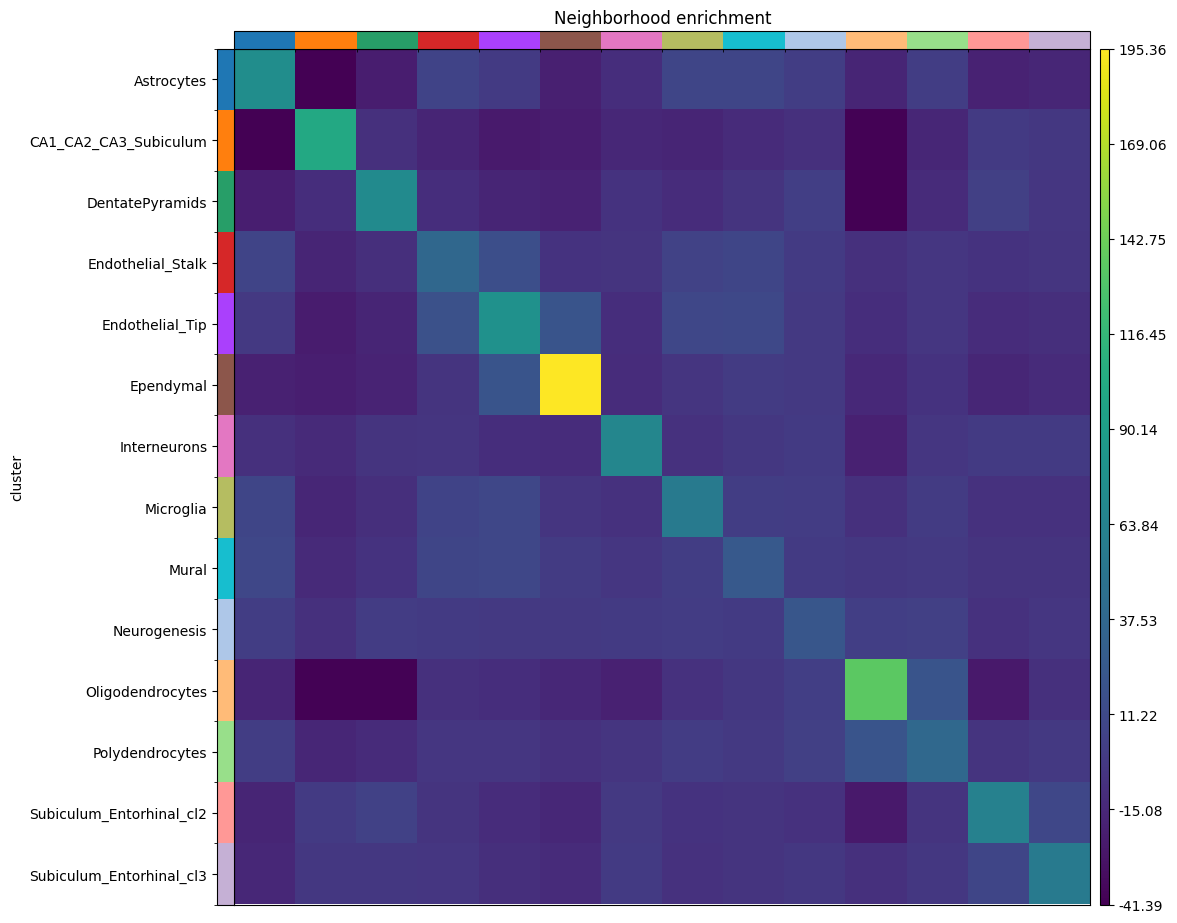

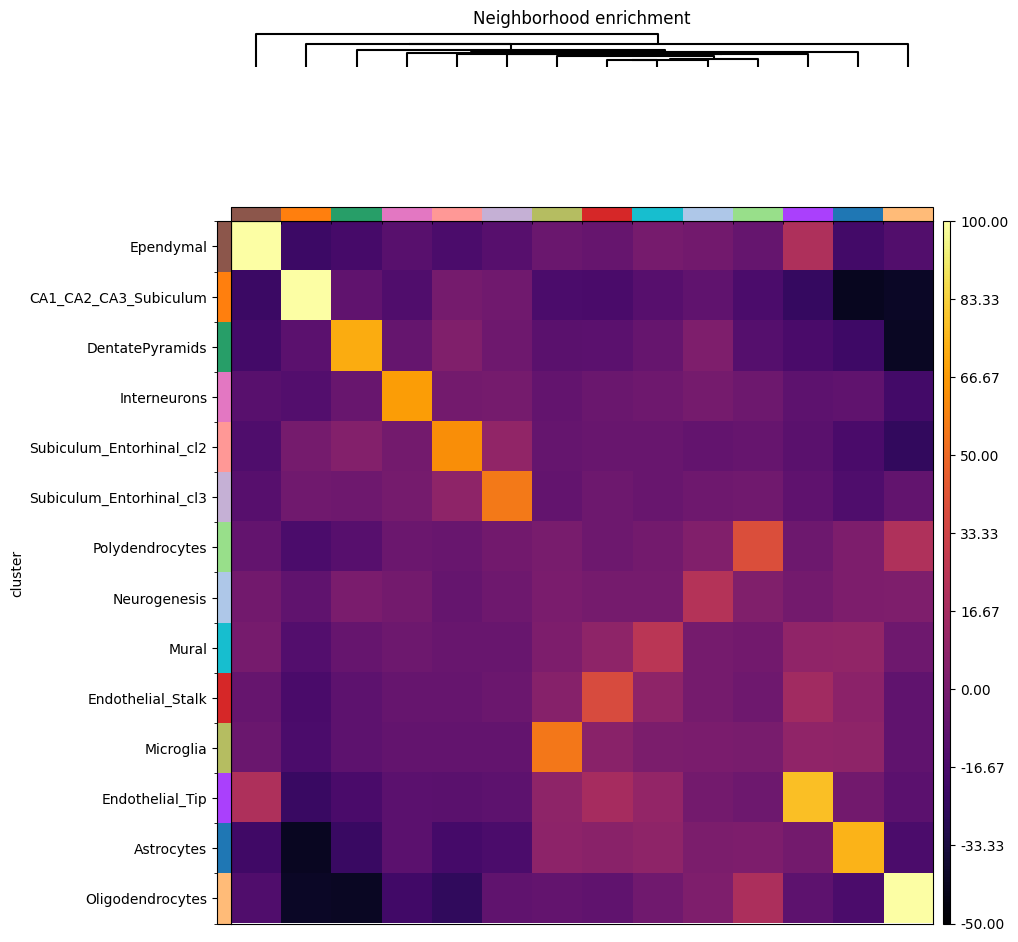

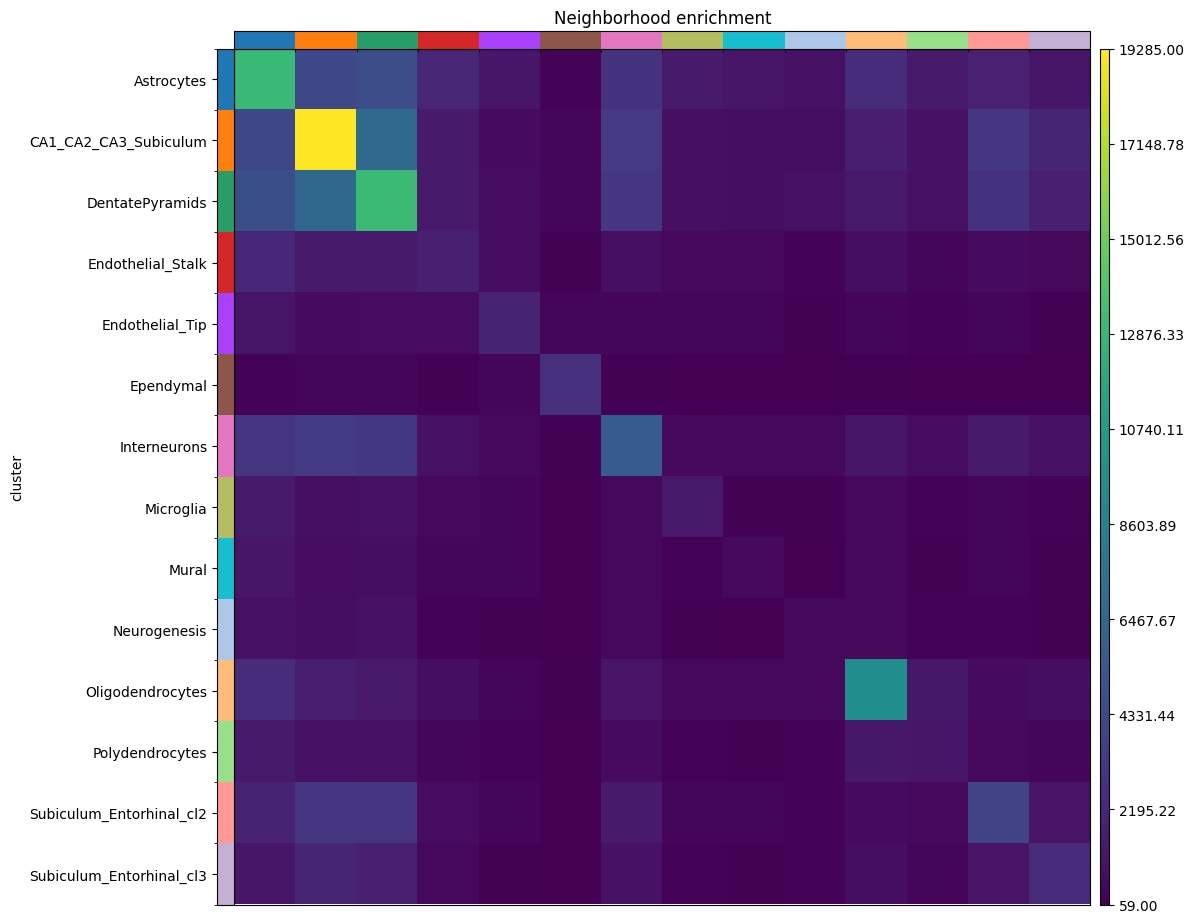

In [60]:
## unfortunately there is no "key_added" like before, so cannot rely on storing the values for each connectivity to test

sq.gr.nhood_enrichment(adata, cluster_key="cluster", connectivity_key="nn6")
sq.pl.nhood_enrichment(adata, cluster_key="cluster", mode="zscore")
sq.pl.nhood_enrichment(adata, cluster_key="cluster", mode="zscore", method="single", cmap="inferno", vmin=-50, vmax=100)
sq.pl.nhood_enrichment(adata, cluster_key="cluster", mode="count")

This is like in the vignette

Note that the mode "count" is basically like the same exact thing as the "interaction matrix", which also just counts number of interactions for whatever connectivity graph used.

However, the "interaction matrix" also has a "normalization" option to divide by the total number of interactions

### interaction matrix

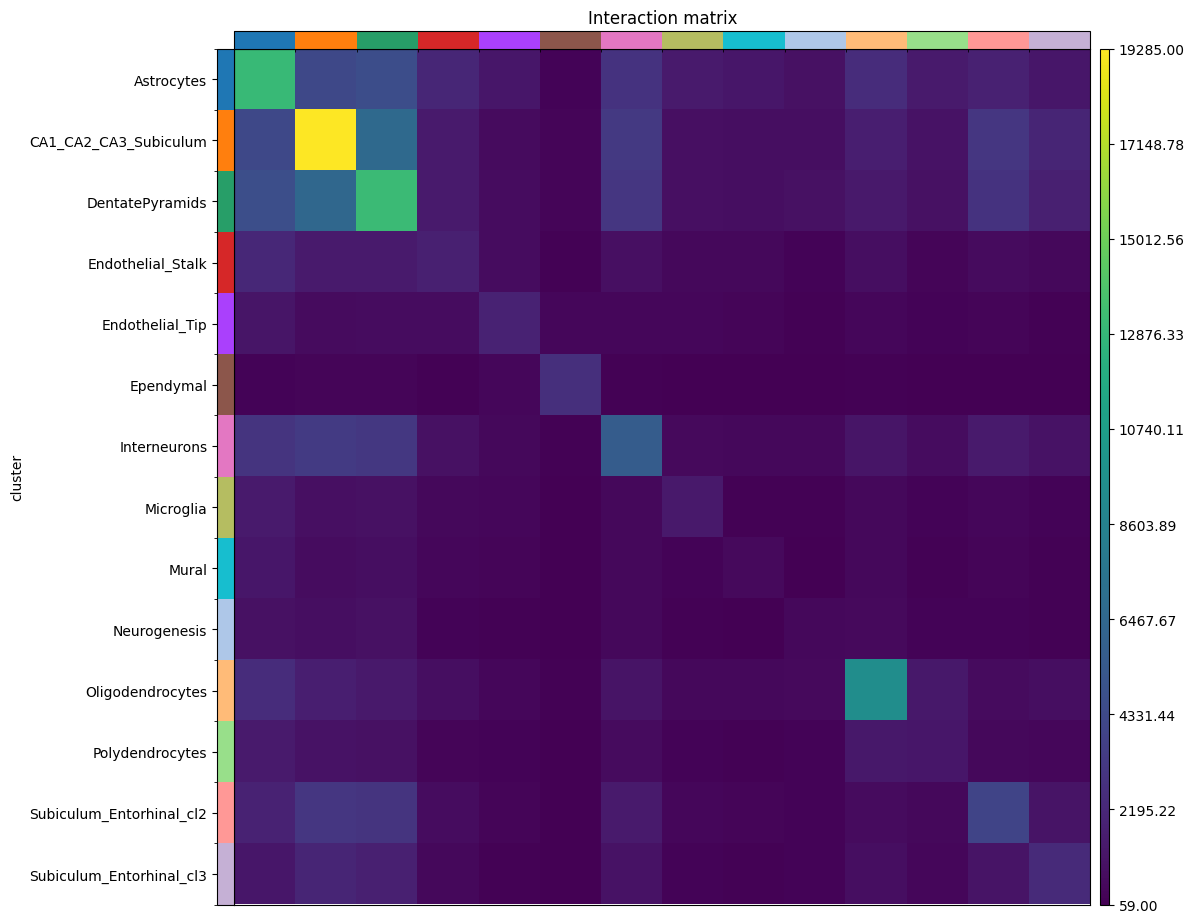

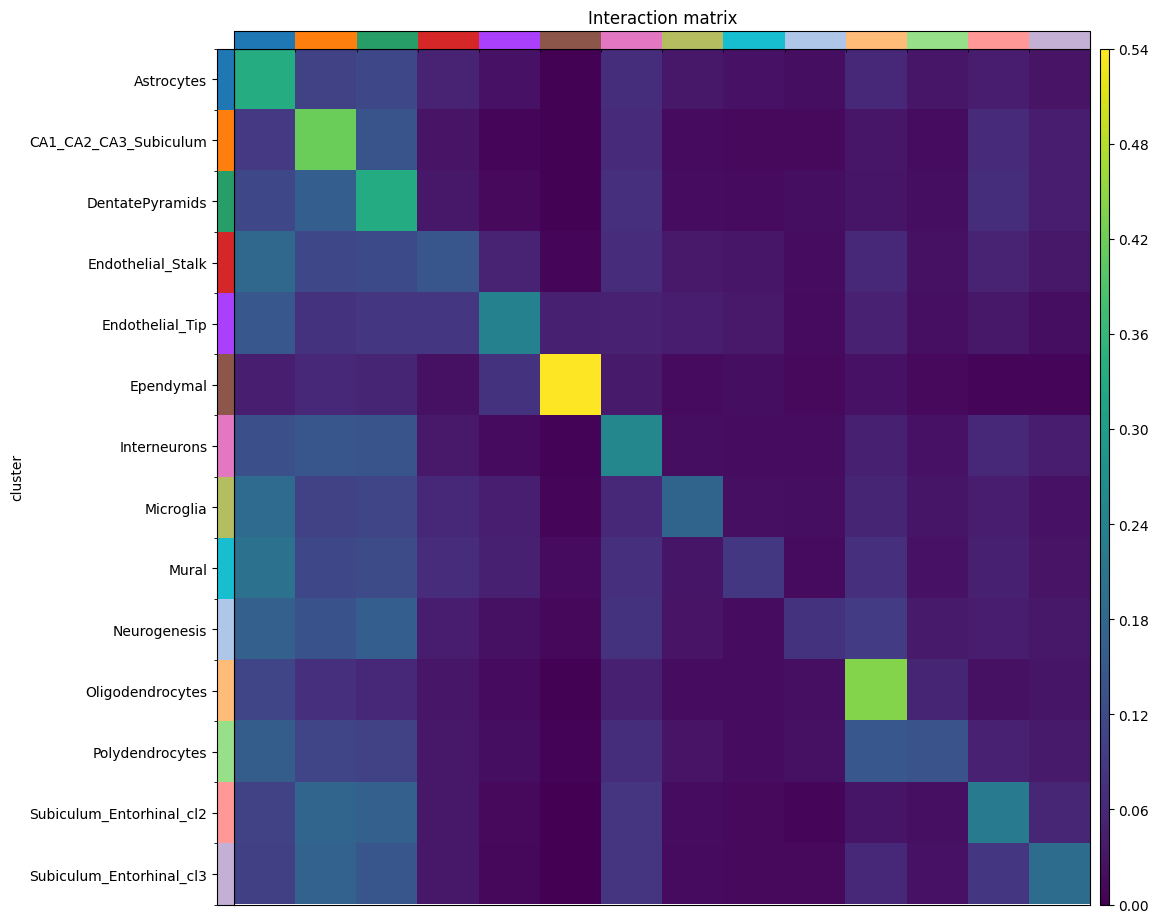

In [61]:
sq.gr.interaction_matrix(adata, cluster_key="cluster", connectivity_key="nn6")
sq.pl.interaction_matrix(adata, cluster_key="cluster")
sq.gr.interaction_matrix(adata, cluster_key="cluster", connectivity_key="nn6", normalized=True)
sq.pl.interaction_matrix(adata, cluster_key="cluster")

Lot's of apoptotic tumor cells all throughout which makes sense. Everyone touches those and not that much of anything esle, at least that can be seen here

## delaunay

### nhood enrichment

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 118.34/s]


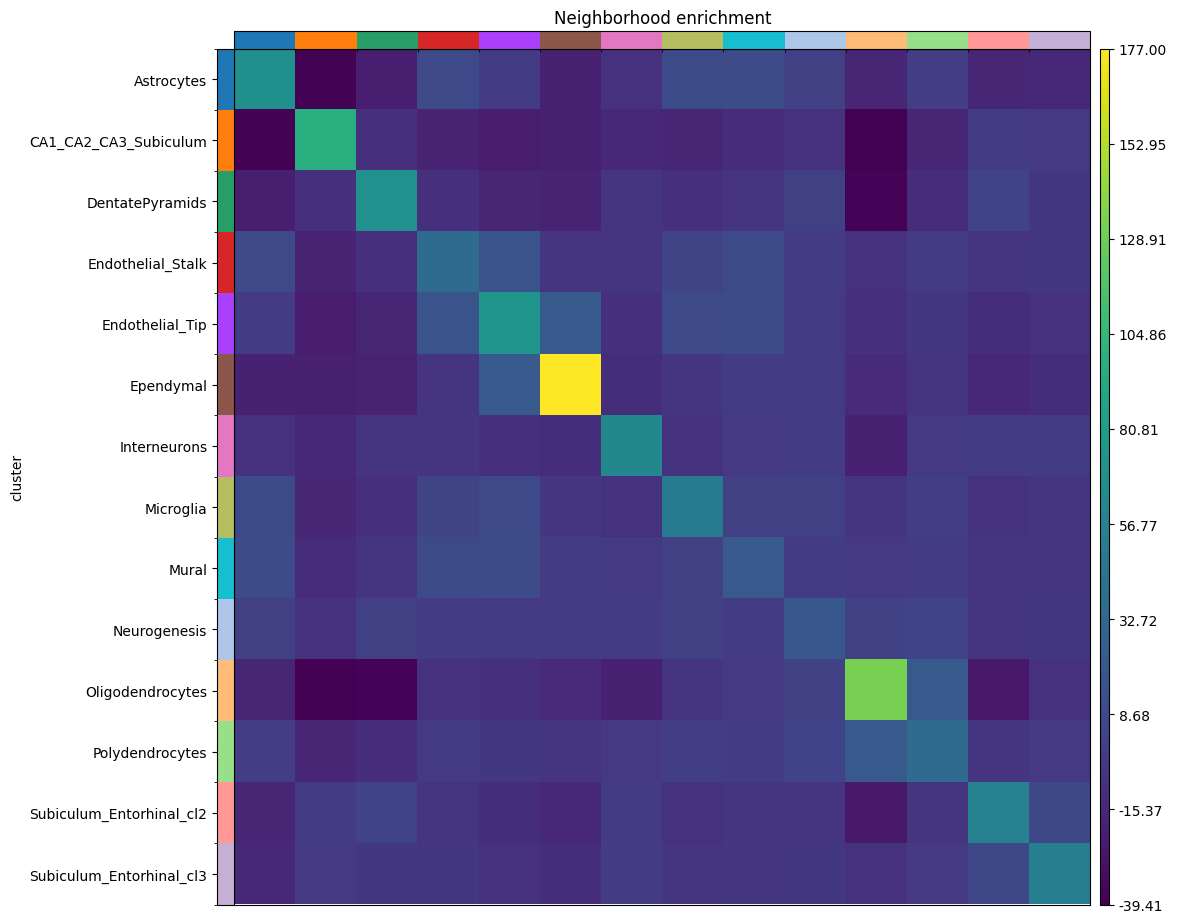

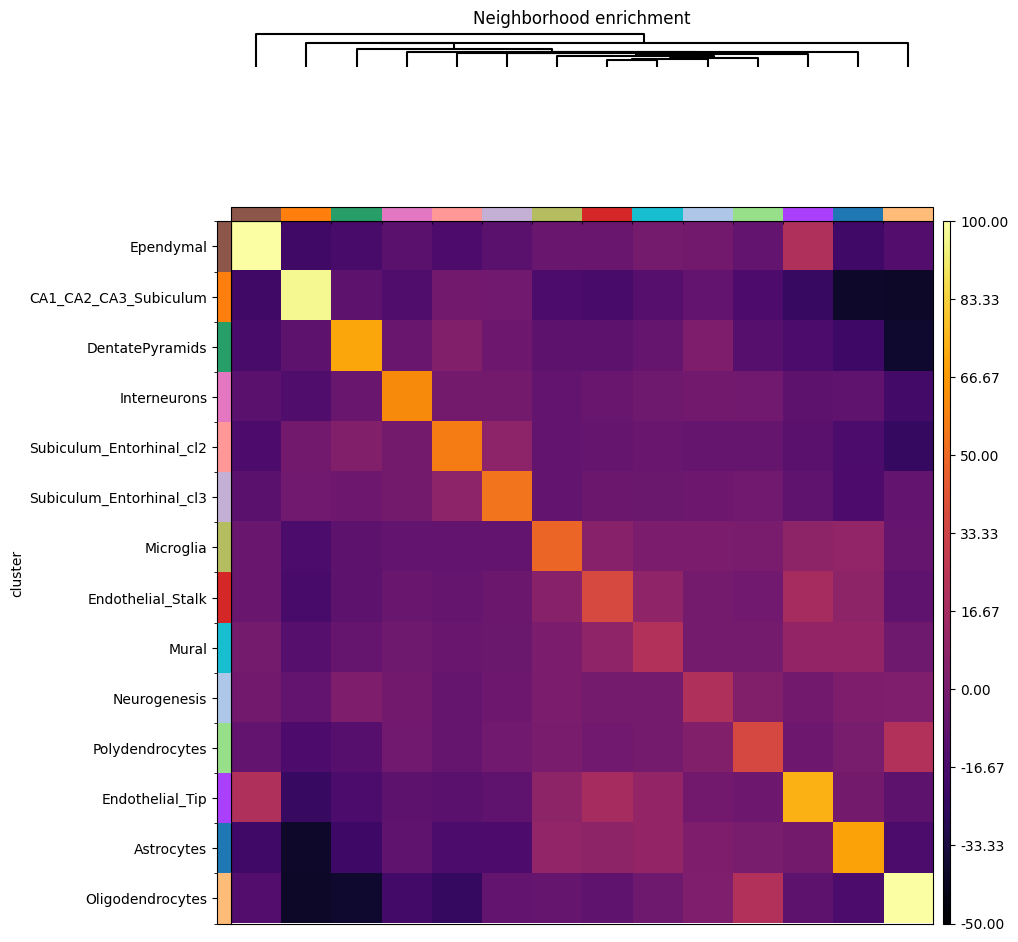

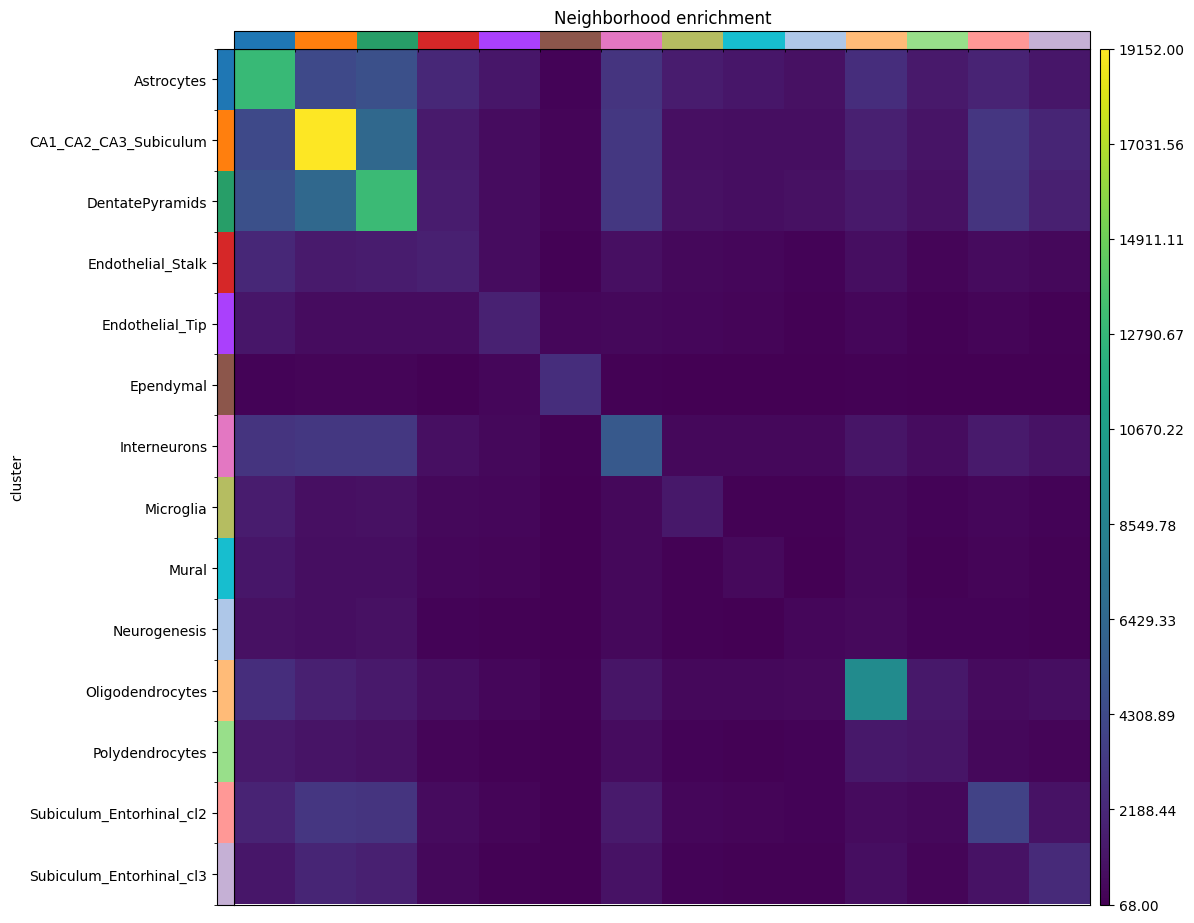

In [62]:
## unfortunately there is no "key_added" like before, so cannot rely on storing the values for each connectivity to test

sq.gr.nhood_enrichment(adata, cluster_key="cluster", connectivity_key="delaunay")
sq.pl.nhood_enrichment(adata, cluster_key="cluster", mode="zscore")
sq.pl.nhood_enrichment(adata, cluster_key="cluster", mode="zscore", method="single", cmap="inferno", vmin=-50, vmax=100)
sq.pl.nhood_enrichment(adata, cluster_key="cluster", mode="count")

### interaction matrix

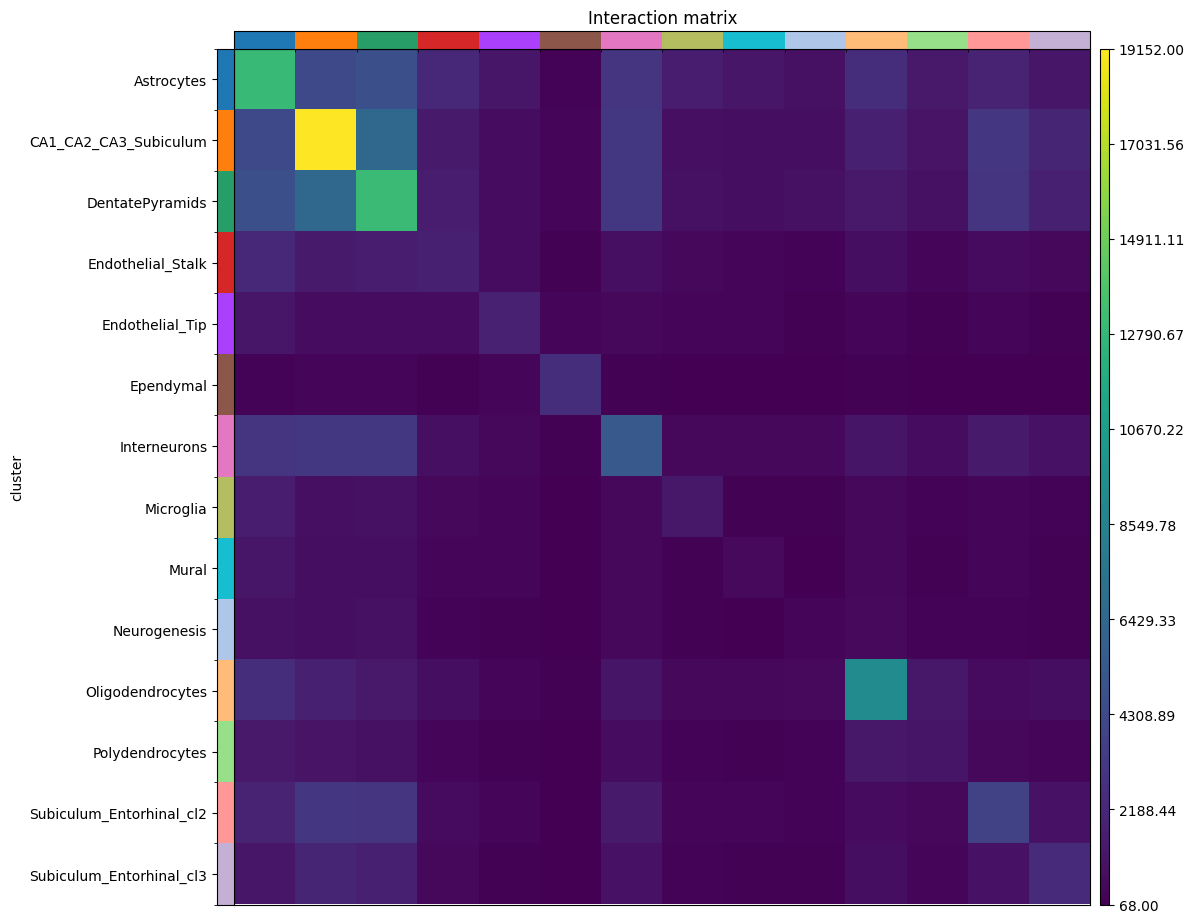

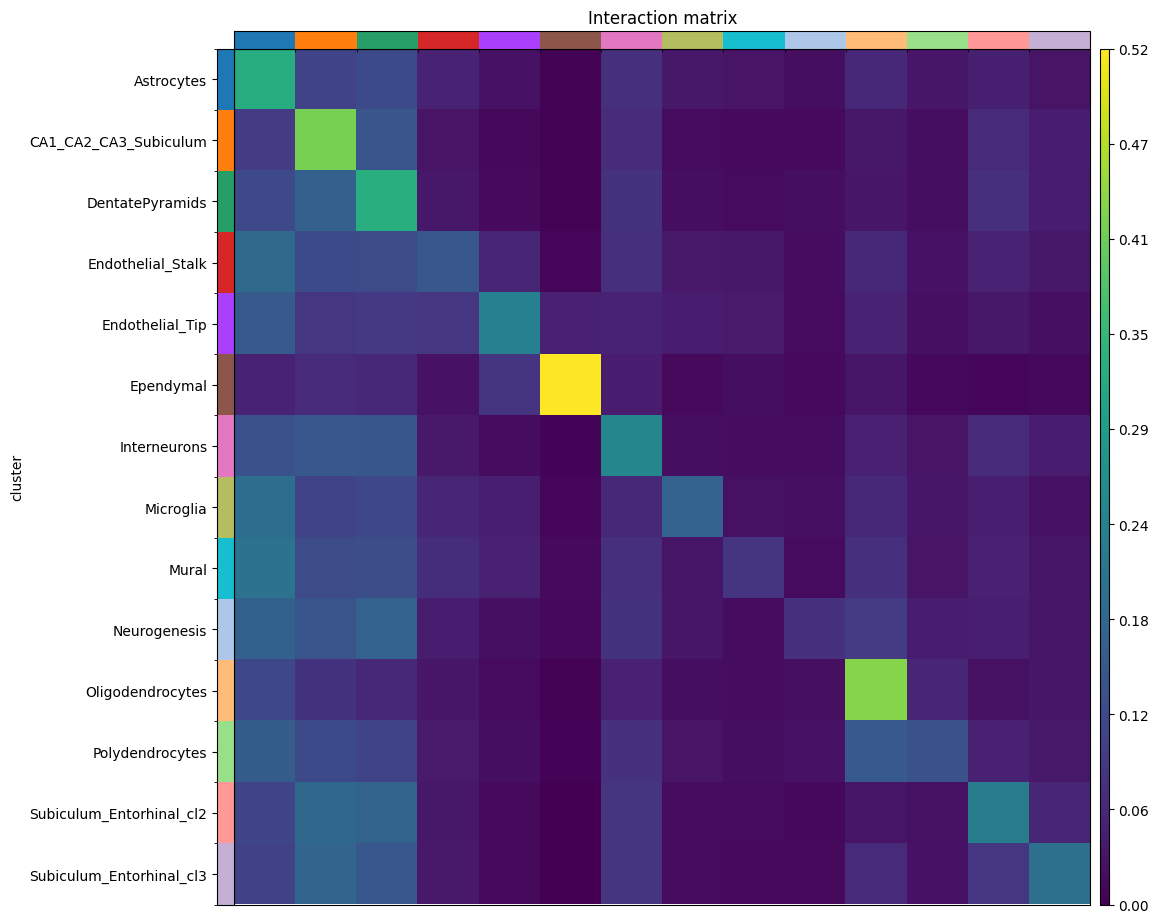

In [63]:
sq.gr.interaction_matrix(adata, cluster_key="cluster", connectivity_key="delaunay")
sq.pl.interaction_matrix(adata, cluster_key="cluster")
sq.gr.interaction_matrix(adata, cluster_key="cluster", connectivity_key="delaunay", normalized=True)
sq.pl.interaction_matrix(adata, cluster_key="cluster")

## nn20

### nhood enrichment

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 122.28/s]


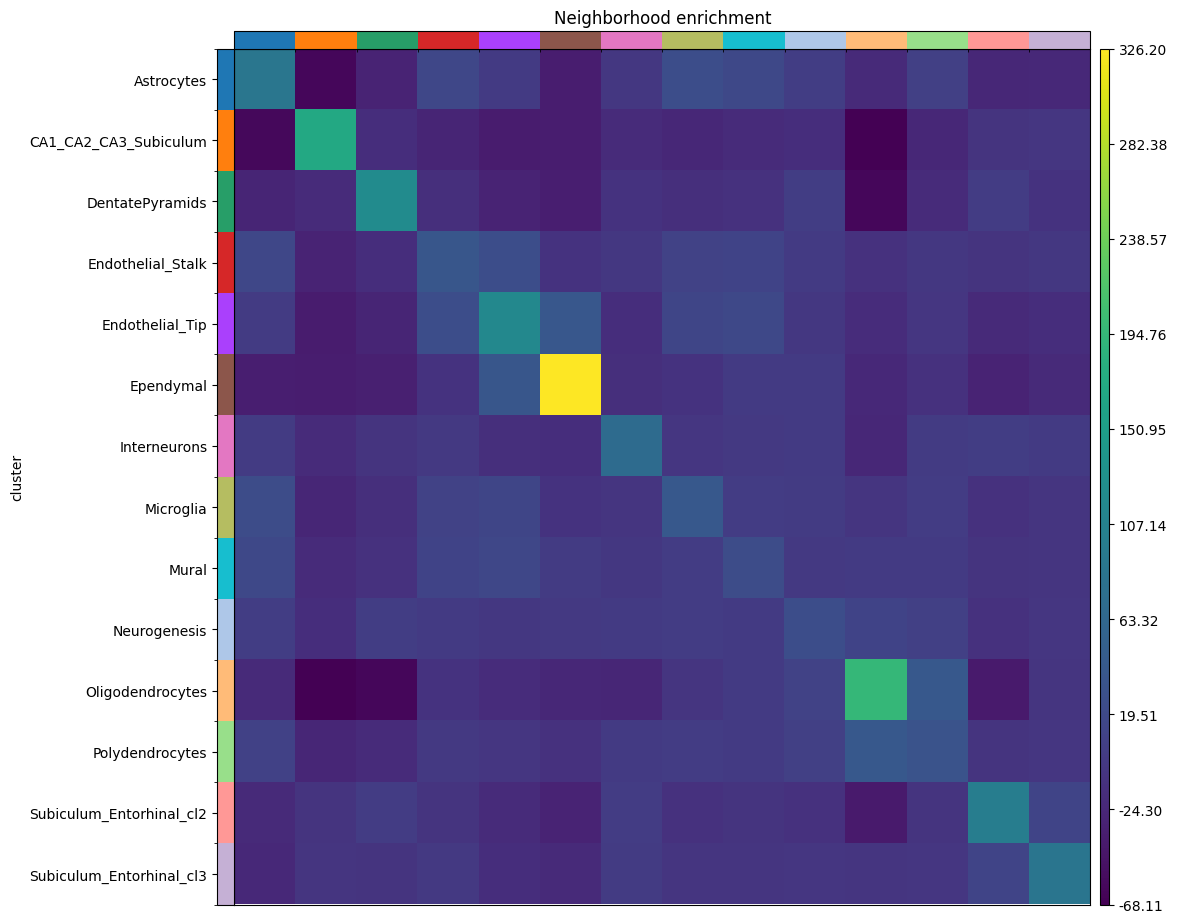

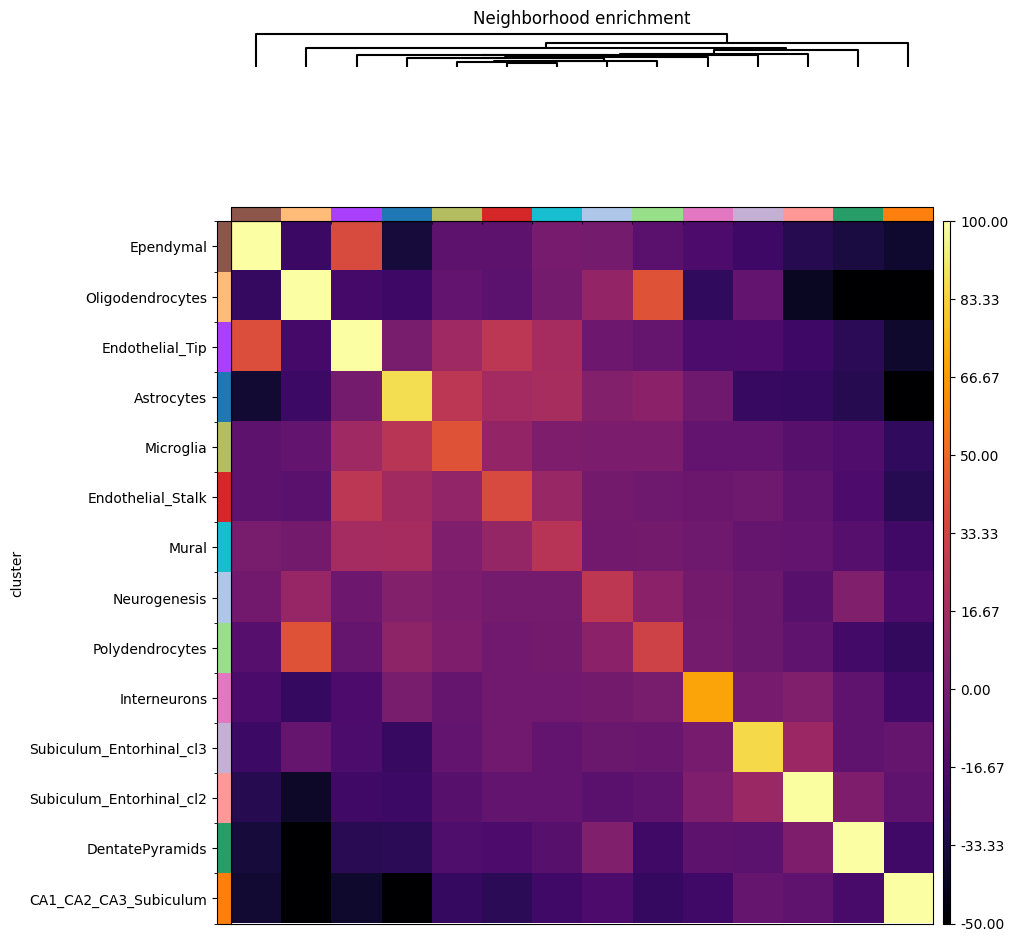

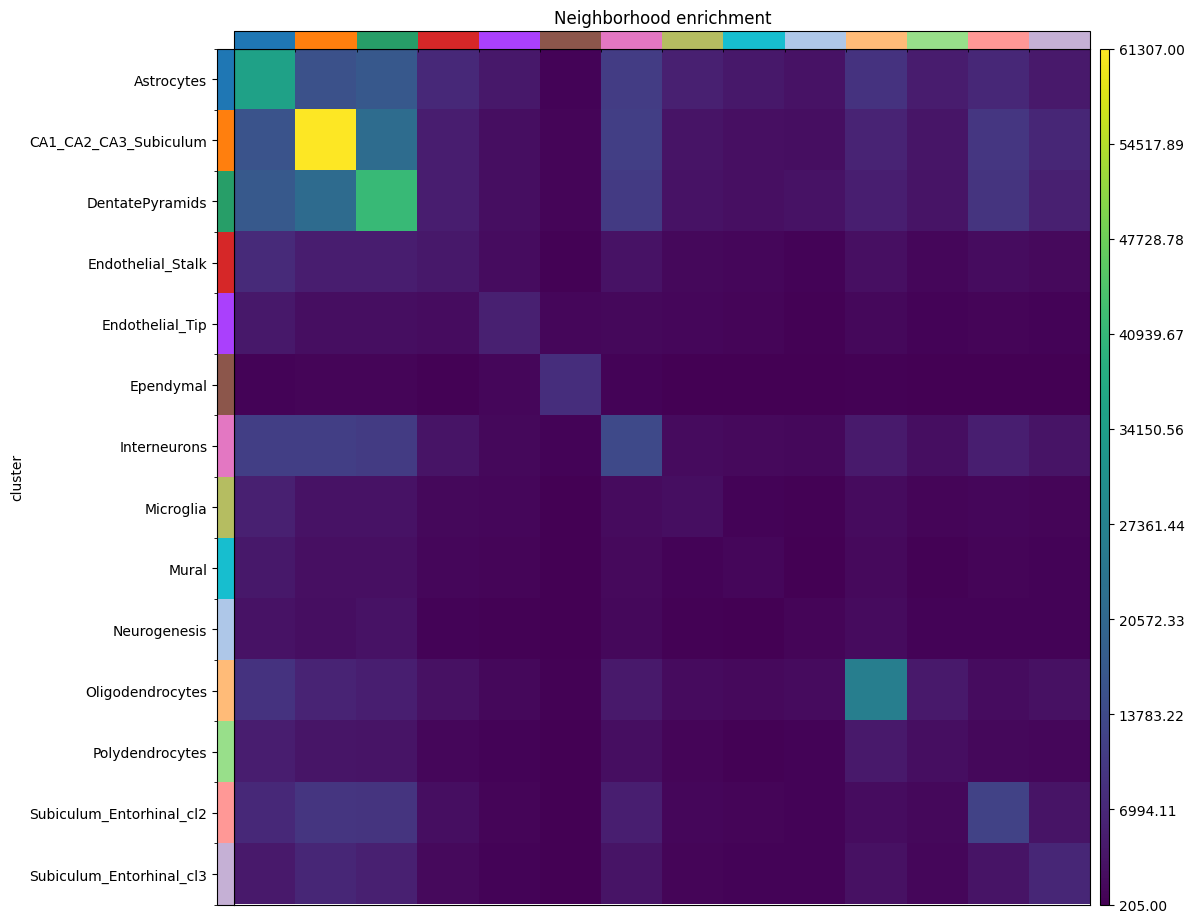

In [64]:
sq.gr.nhood_enrichment(adata, cluster_key="cluster", connectivity_key="nn20")
sq.pl.nhood_enrichment(adata, cluster_key="cluster", mode="zscore")
sq.pl.nhood_enrichment(adata, cluster_key="cluster", mode="zscore", method="single", cmap="inferno", vmin=-50, vmax=100)
sq.pl.nhood_enrichment(adata, cluster_key="cluster", mode="count")

### interaction matrix

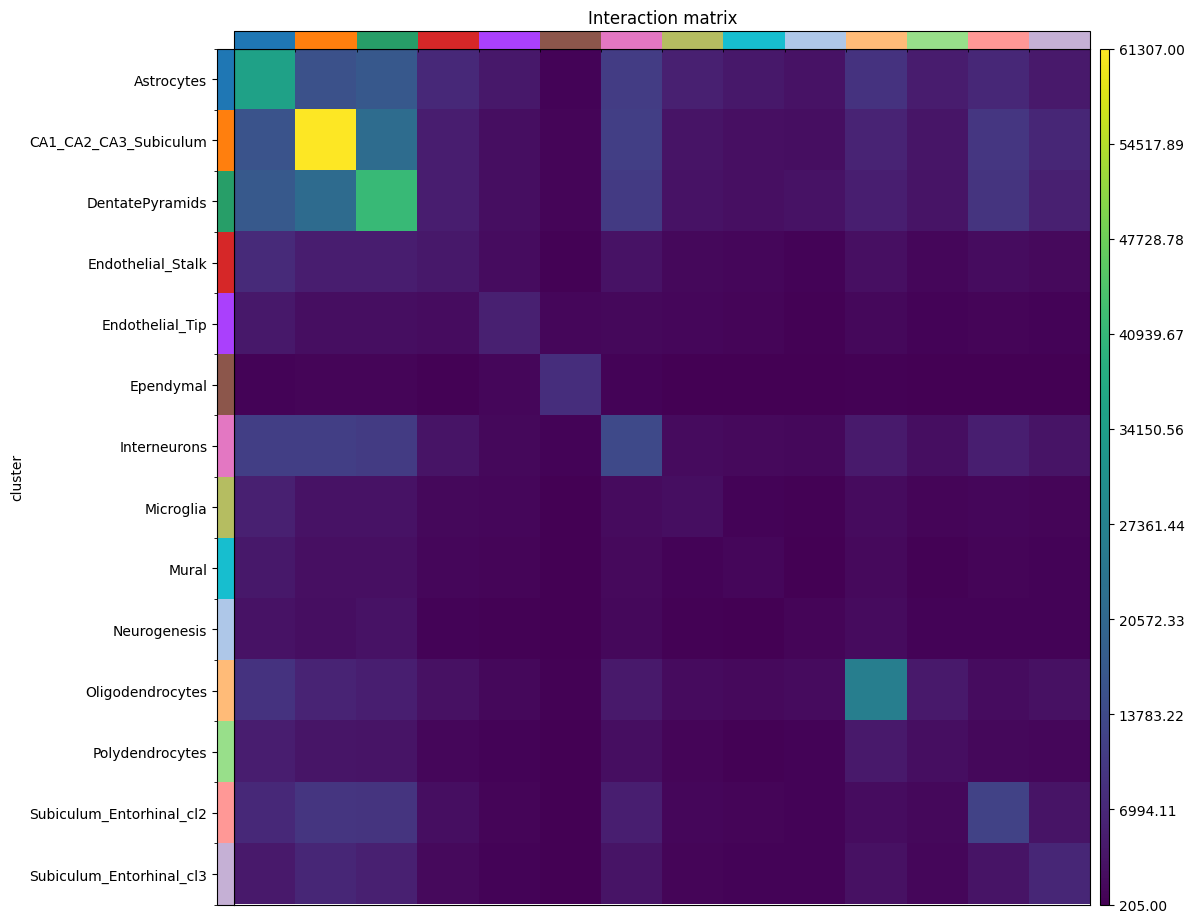

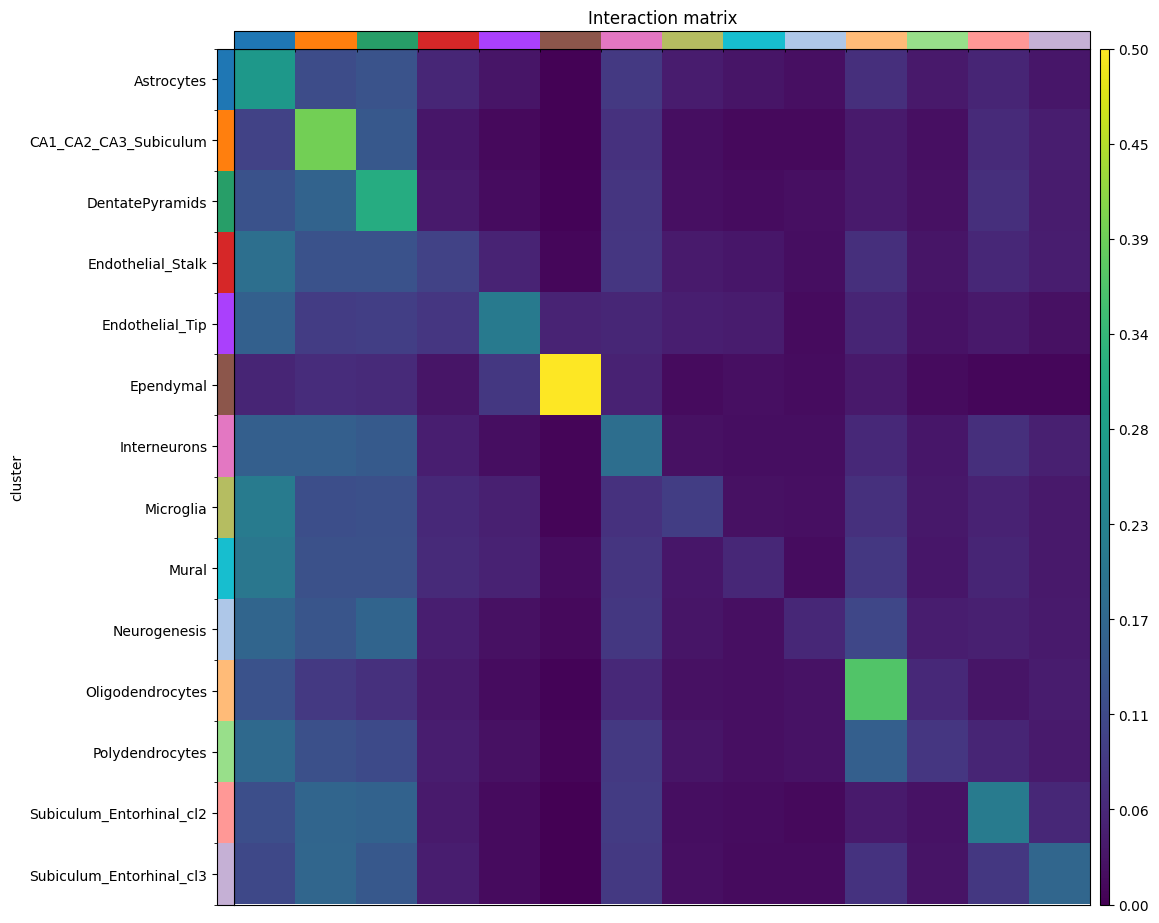

In [65]:
sq.gr.interaction_matrix(adata, cluster_key="cluster", connectivity_key="nn20")
sq.pl.interaction_matrix(adata, cluster_key="cluster")
sq.gr.interaction_matrix(adata, cluster_key="cluster", connectivity_key="nn20", normalized=True)
sq.pl.interaction_matrix(adata, cluster_key="cluster")

## r50

### nhood enrichment

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 136.94/s]


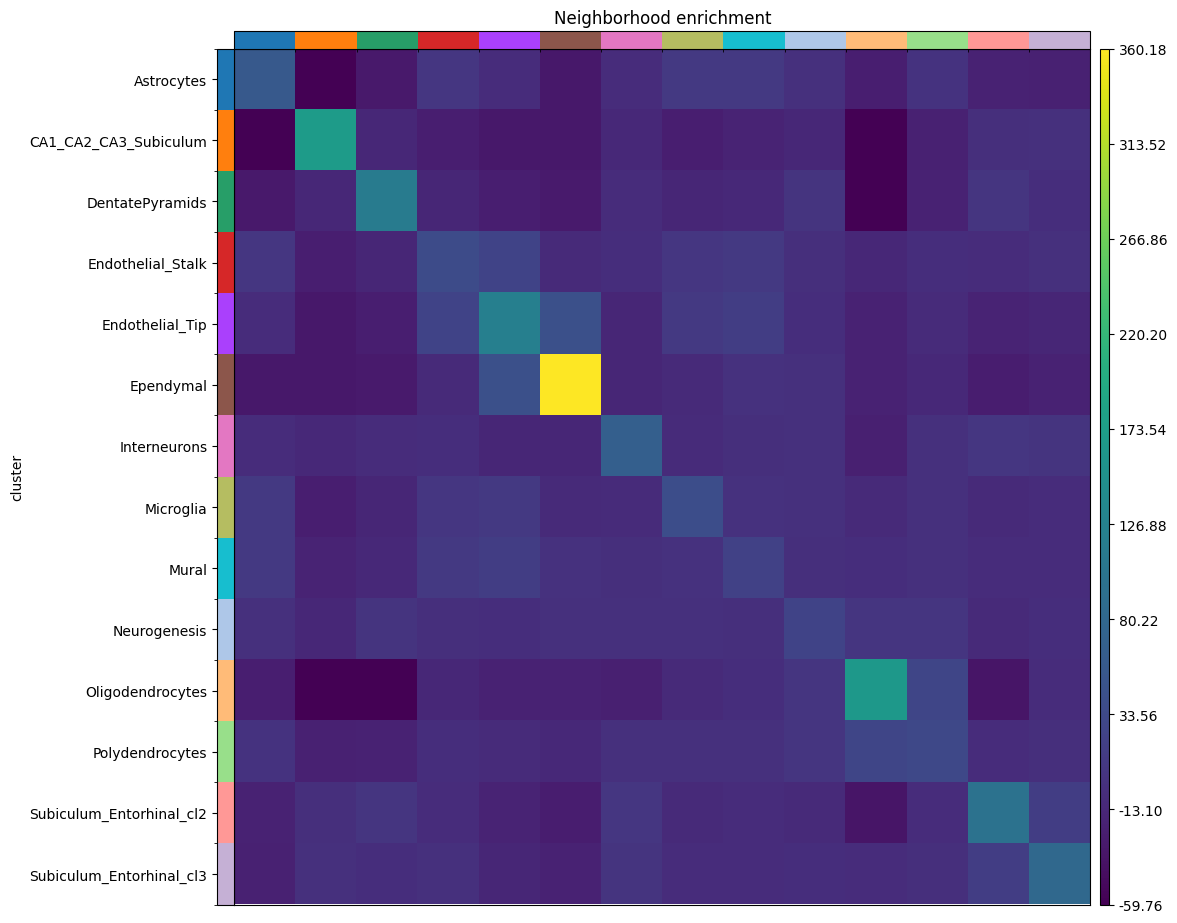

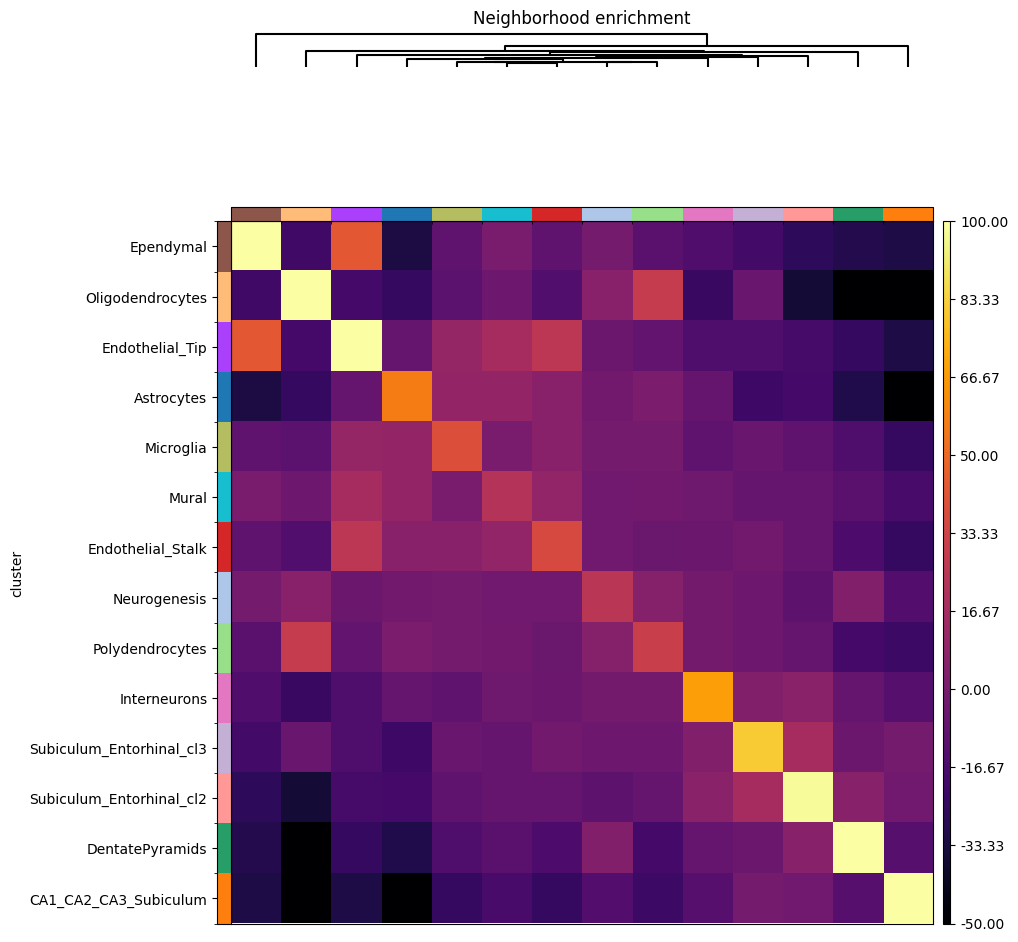

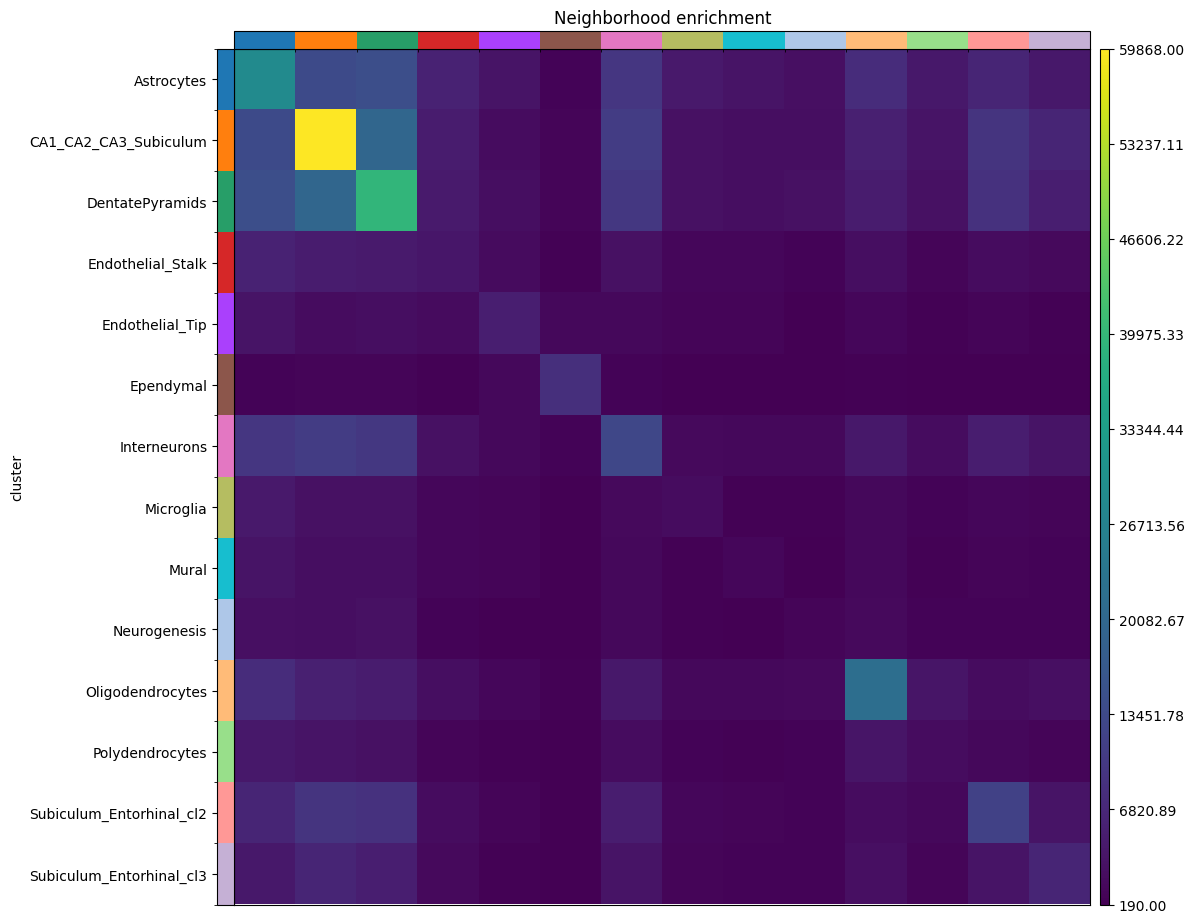

In [66]:
sq.gr.nhood_enrichment(adata, cluster_key="cluster", connectivity_key="r50")
sq.pl.nhood_enrichment(adata, cluster_key="cluster", mode="zscore")
sq.pl.nhood_enrichment(adata, cluster_key="cluster", mode="zscore", method="single", cmap="inferno", vmin=-50, vmax=100)
sq.pl.nhood_enrichment(adata, cluster_key="cluster", mode="count")

### interaction matrix

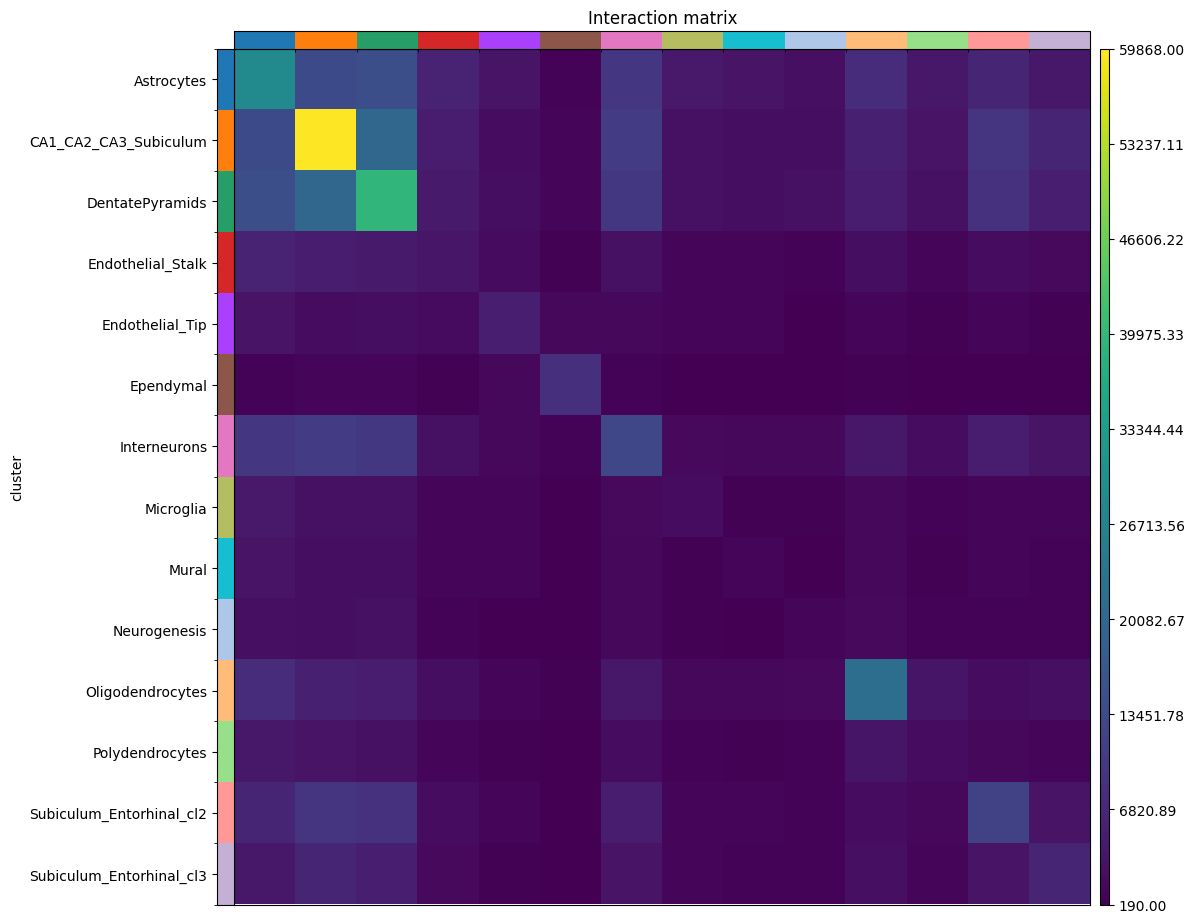

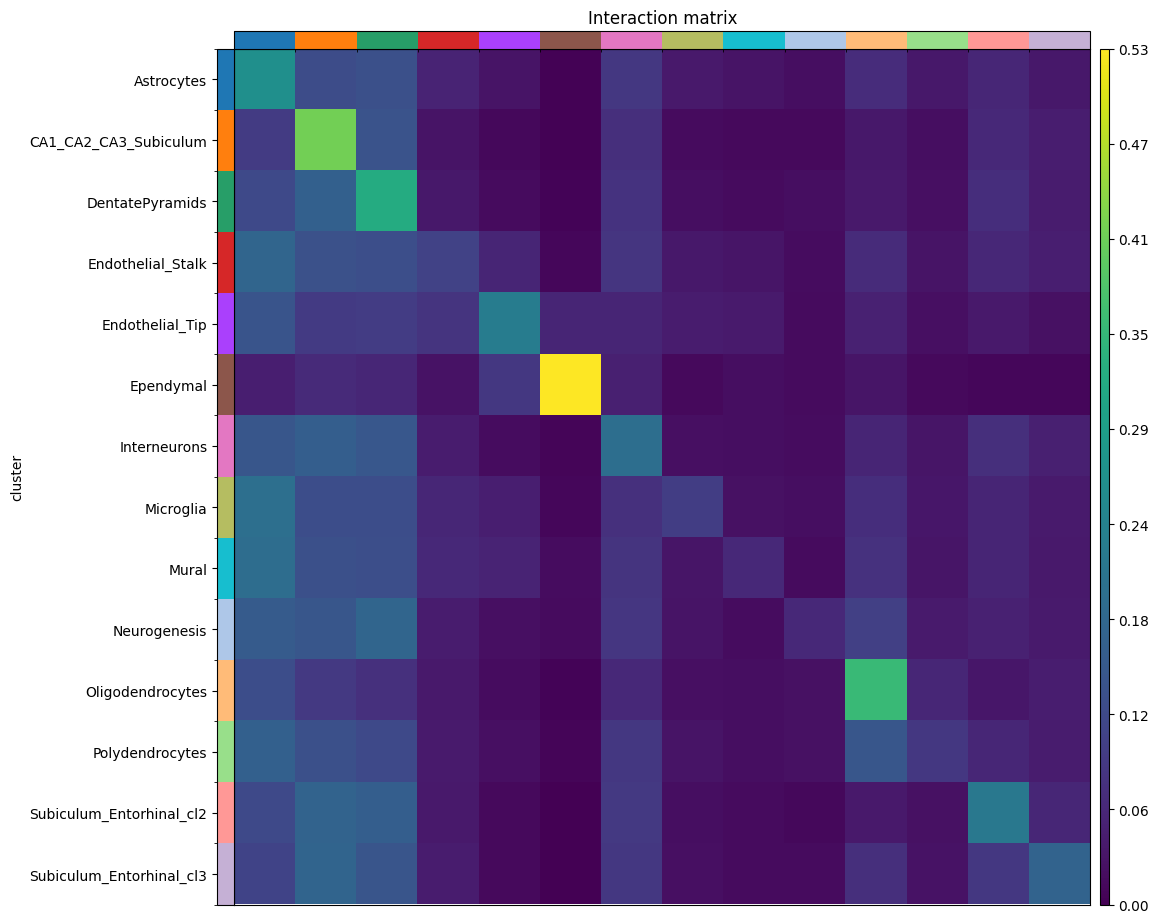

In [67]:
sq.gr.interaction_matrix(adata, cluster_key="cluster", connectivity_key="r50")
sq.pl.interaction_matrix(adata, cluster_key="cluster")
sq.gr.interaction_matrix(adata, cluster_key="cluster", connectivity_key="r50", normalized=True)
sq.pl.interaction_matrix(adata, cluster_key="cluster")

## r20

### nhood enrichment

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 148.30/s]


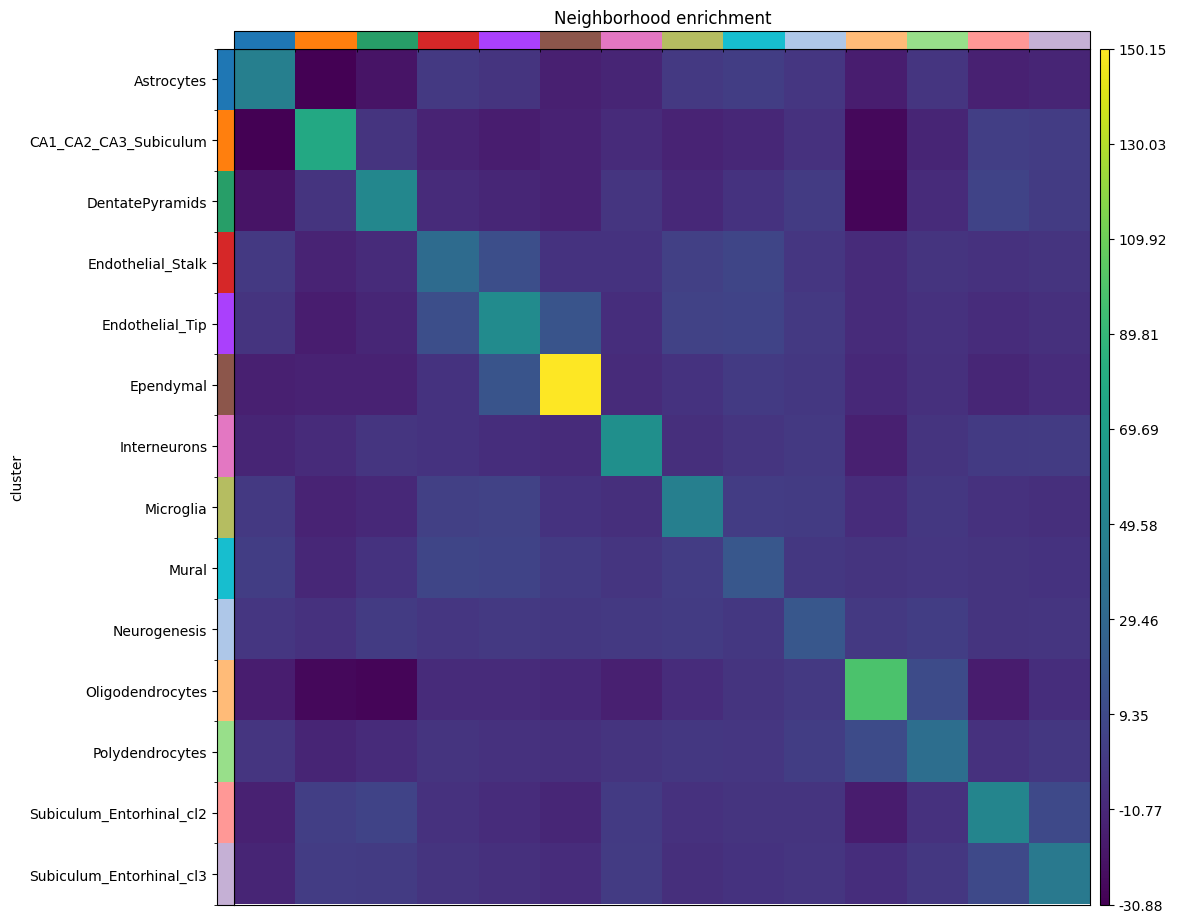

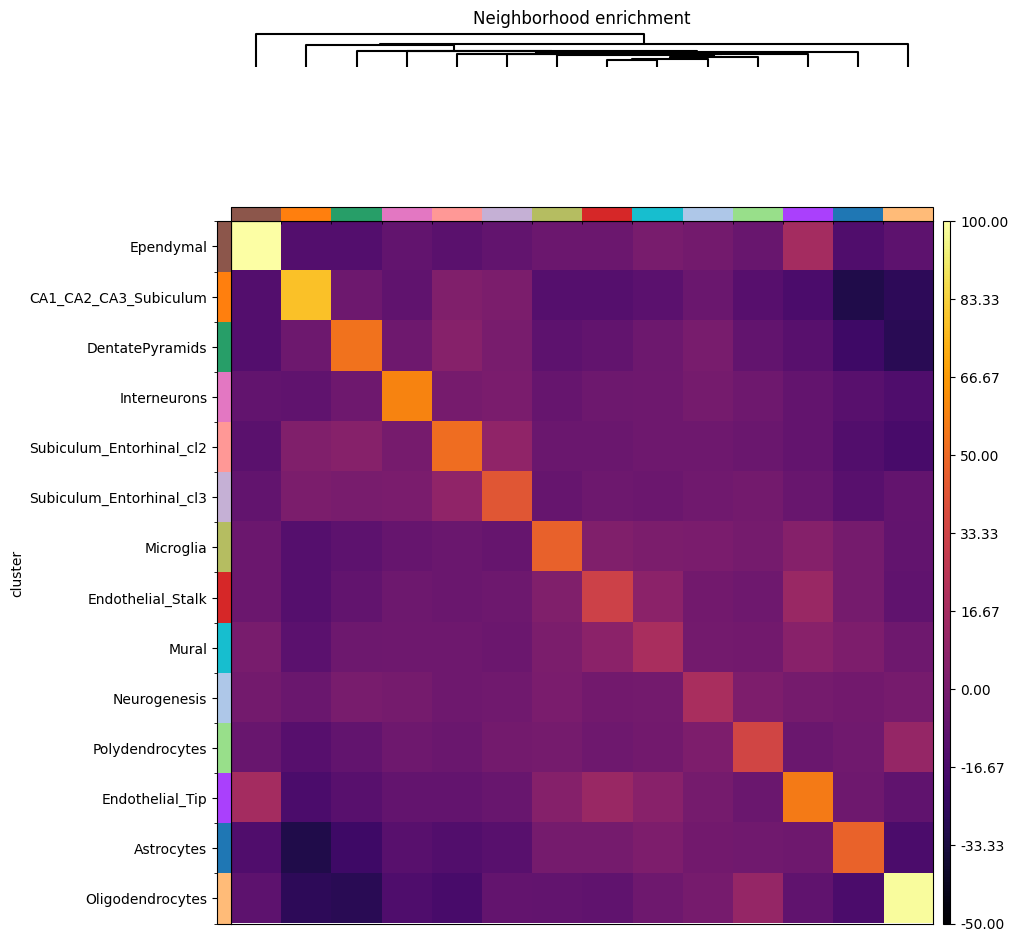

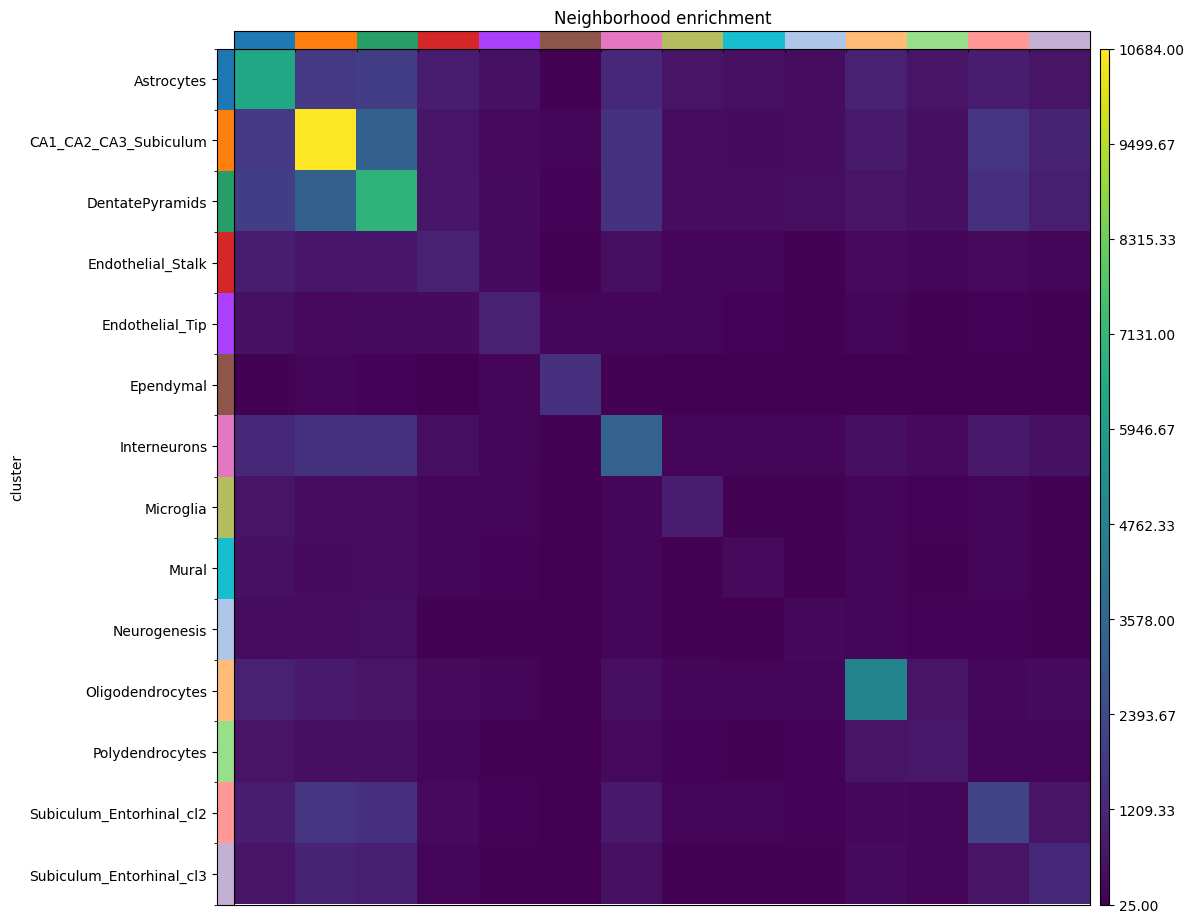

In [68]:
sq.gr.nhood_enrichment(adata, cluster_key="cluster", connectivity_key="r20")
sq.pl.nhood_enrichment(adata, cluster_key="cluster", mode="zscore")
sq.pl.nhood_enrichment(adata, cluster_key="cluster", mode="zscore", method="single", cmap="inferno", vmin=-50, vmax=100)
sq.pl.nhood_enrichment(adata, cluster_key="cluster", mode="count")

### interaction matrix

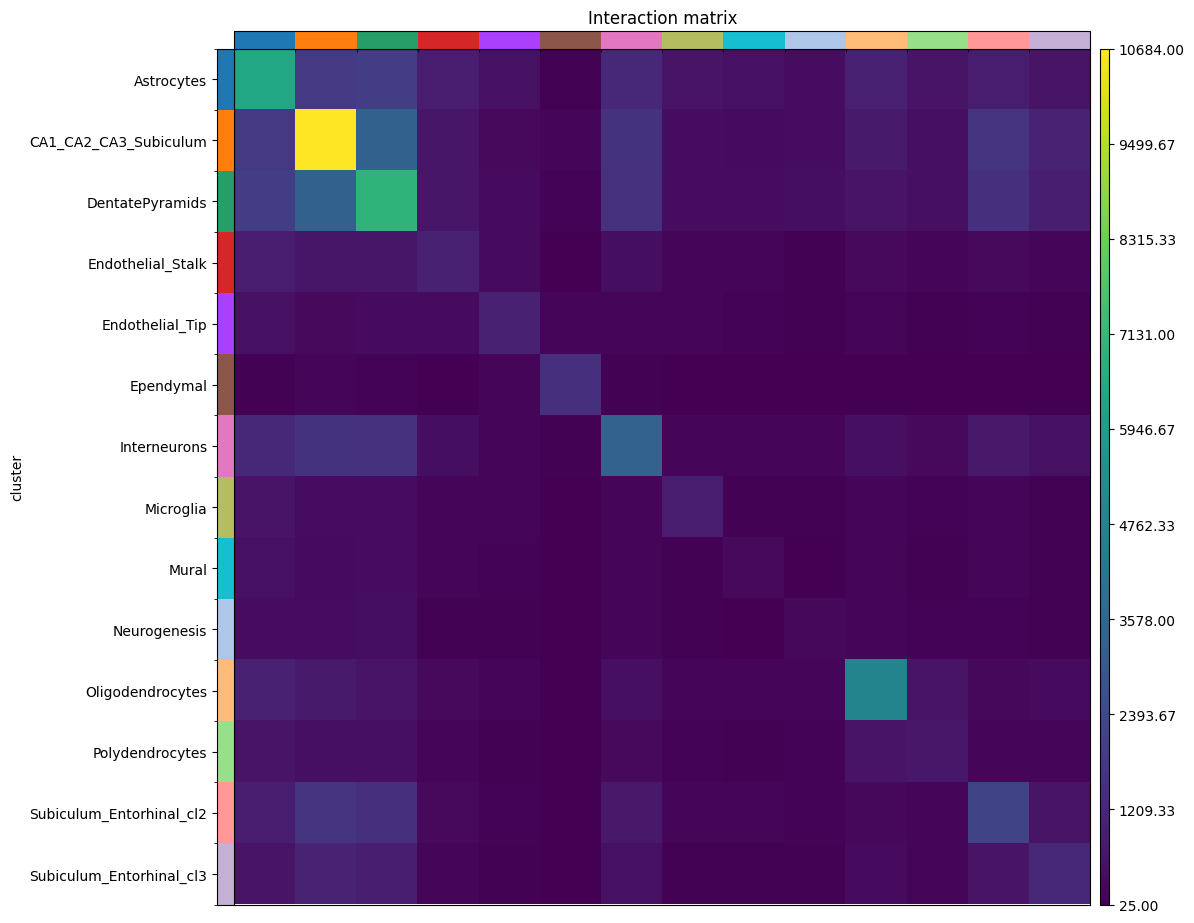

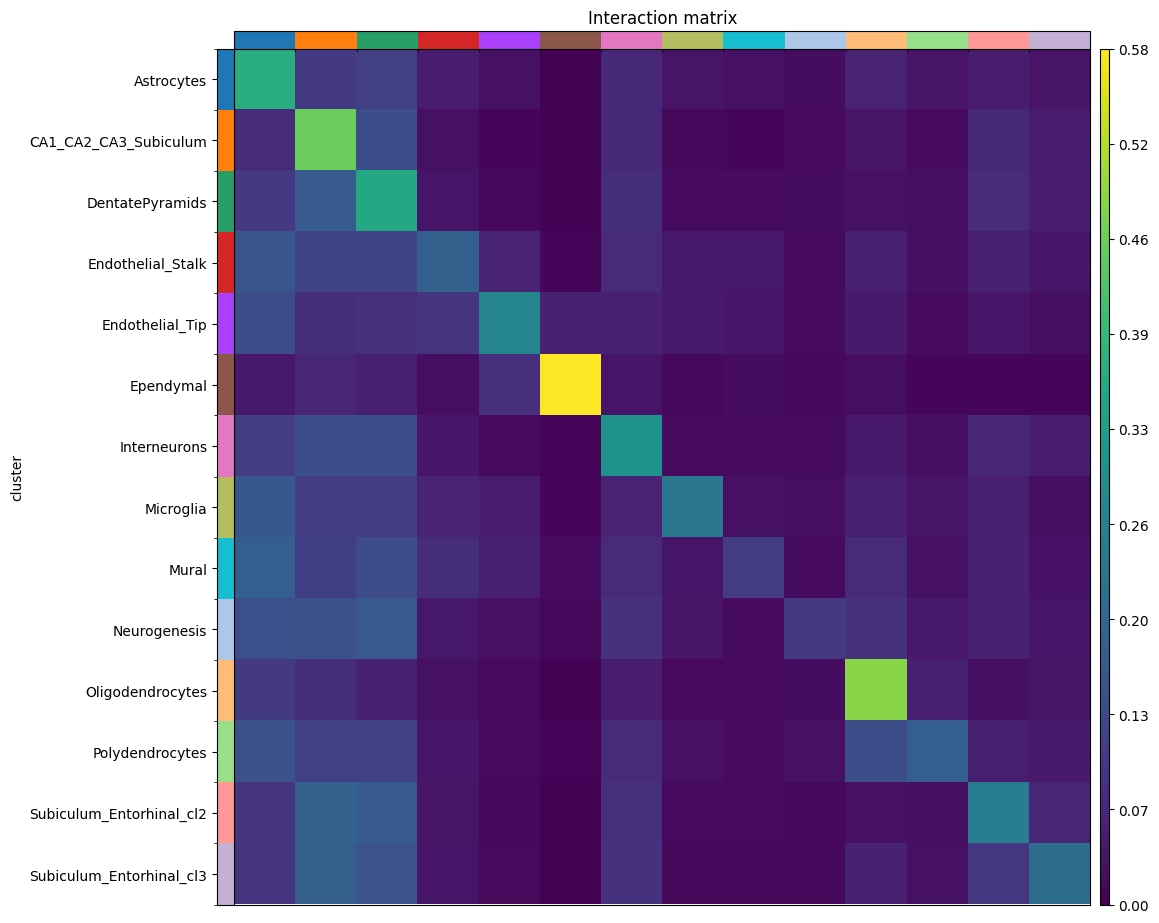

In [69]:
sq.gr.interaction_matrix(adata, cluster_key="cluster", connectivity_key="r20")
sq.pl.interaction_matrix(adata, cluster_key="cluster")
sq.gr.interaction_matrix(adata, cluster_key="cluster", connectivity_key="r20", normalized=True)
sq.pl.interaction_matrix(adata, cluster_key="cluster")

## r100

### nhood enrichment

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 90.39/s]


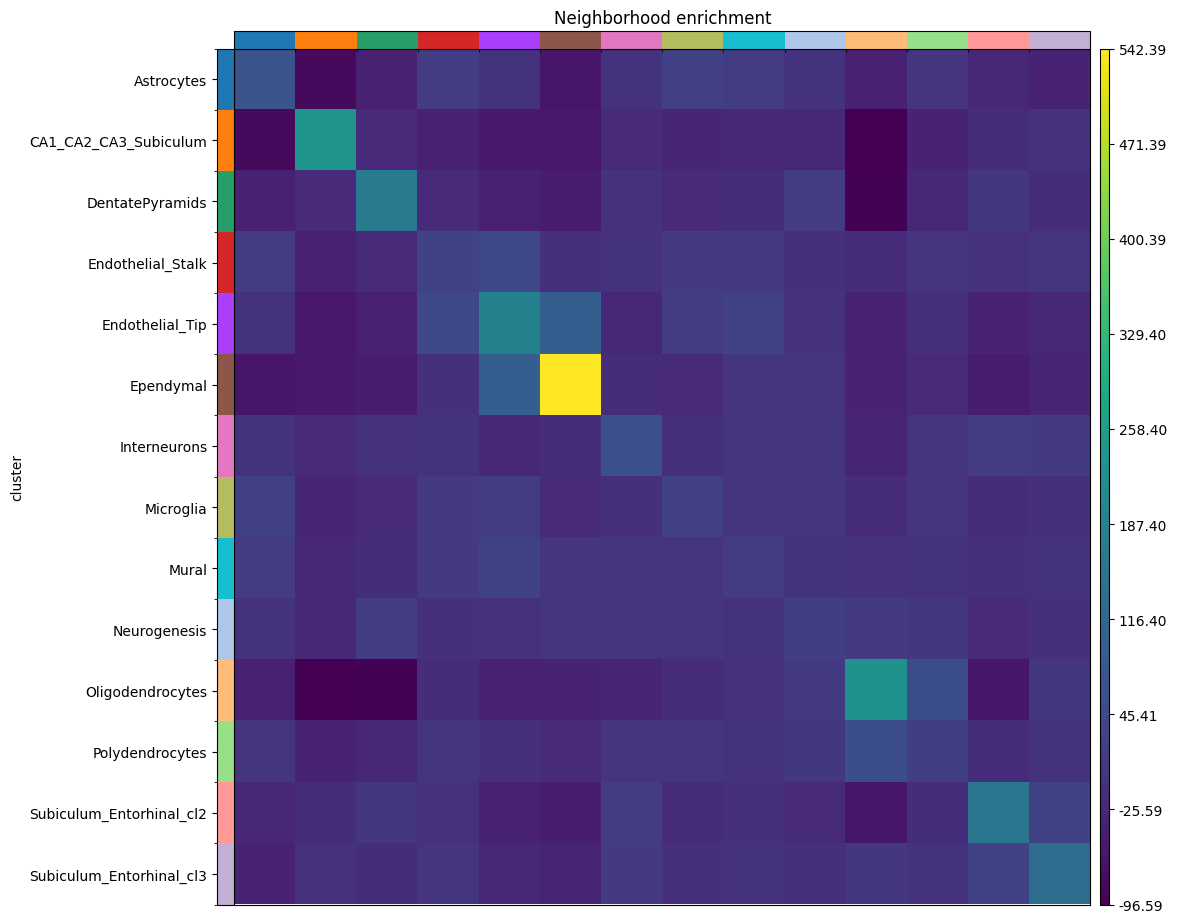

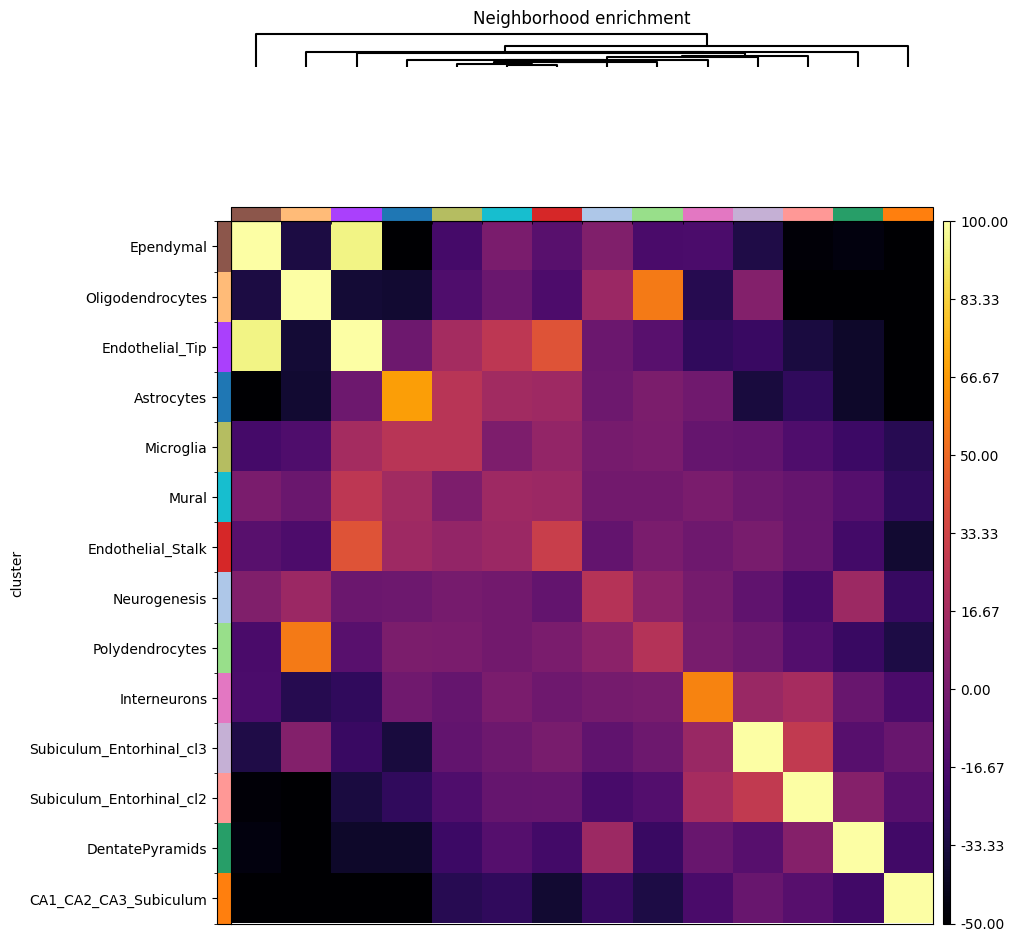

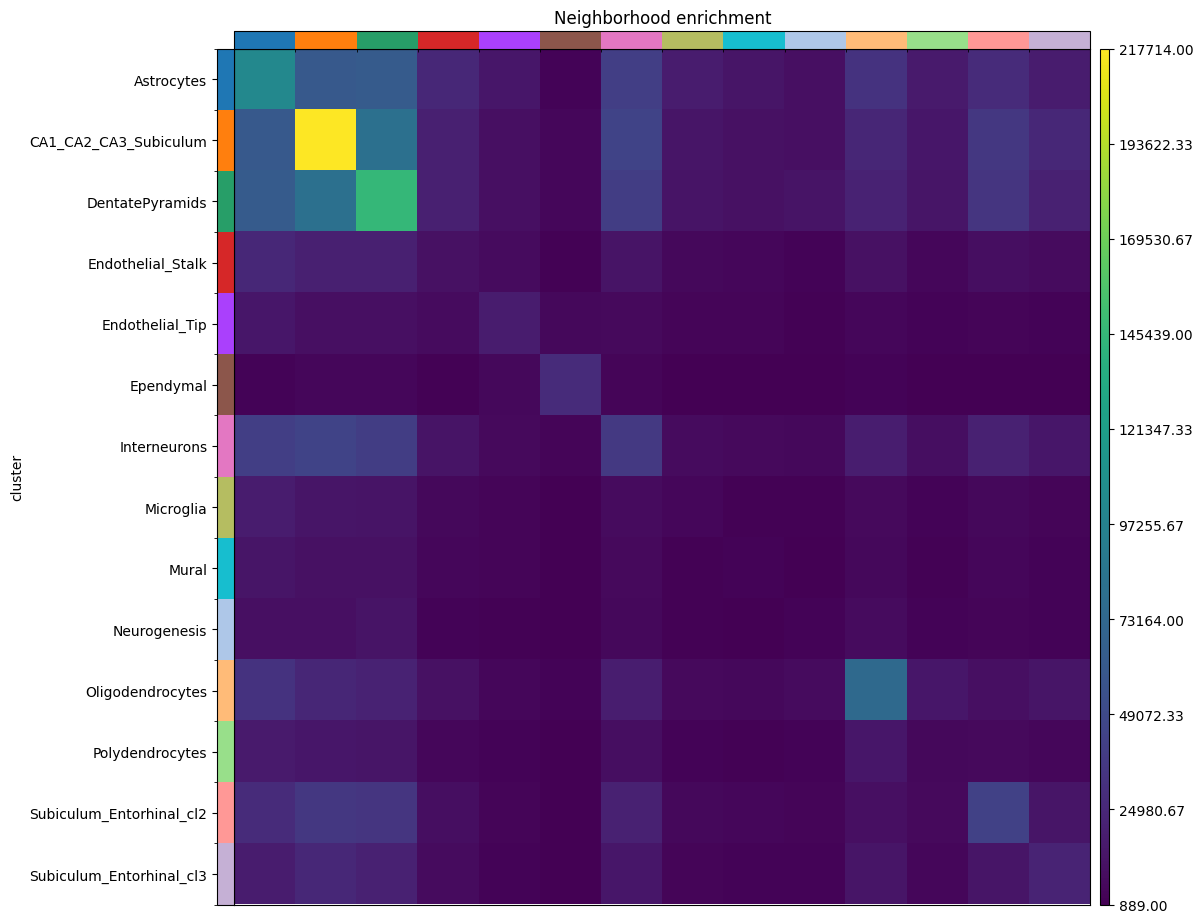

In [70]:
sq.gr.nhood_enrichment(adata, cluster_key="cluster", connectivity_key="r100")
sq.pl.nhood_enrichment(adata, cluster_key="cluster", mode="zscore")
sq.pl.nhood_enrichment(adata, cluster_key="cluster", mode="zscore", method="single", cmap="inferno", vmin=-50, vmax=100)
sq.pl.nhood_enrichment(adata, cluster_key="cluster", mode="count")

### interaction matrix

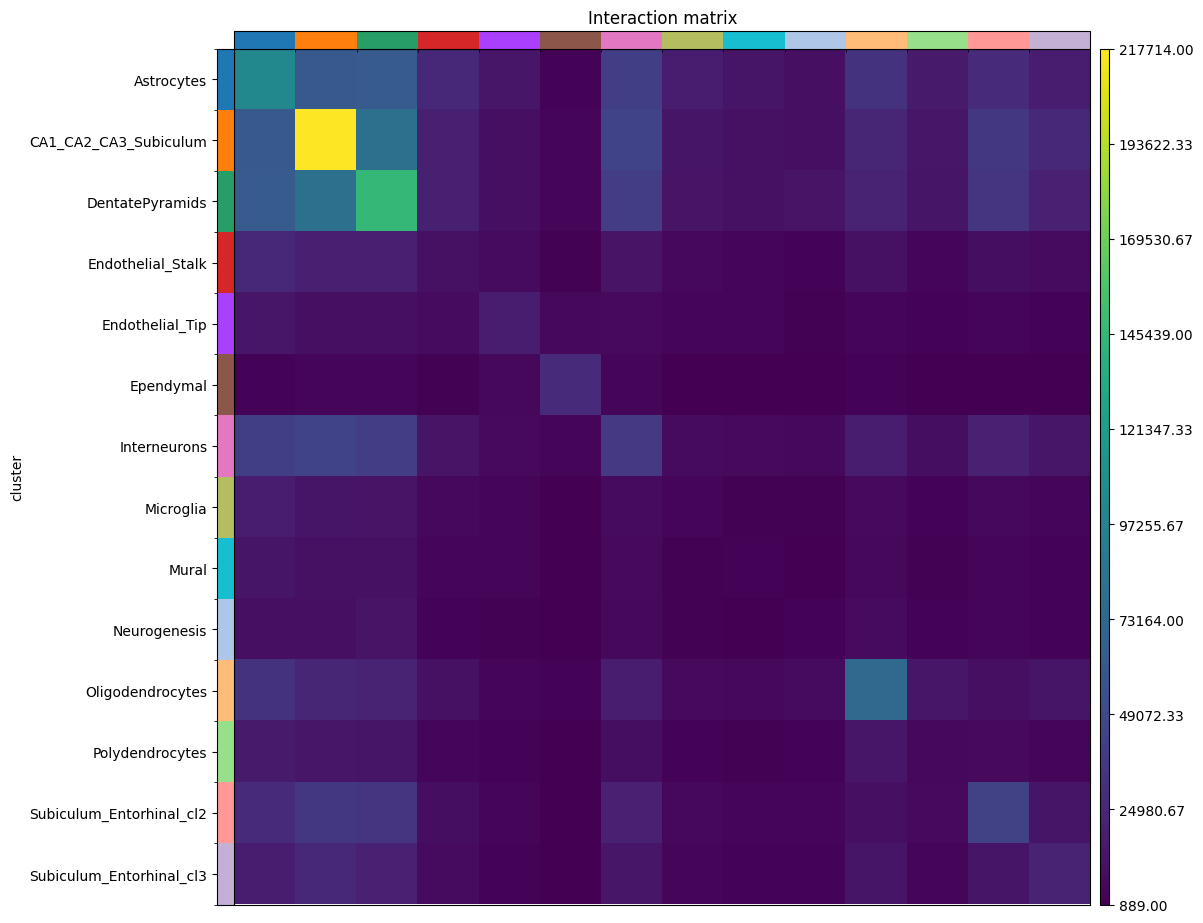

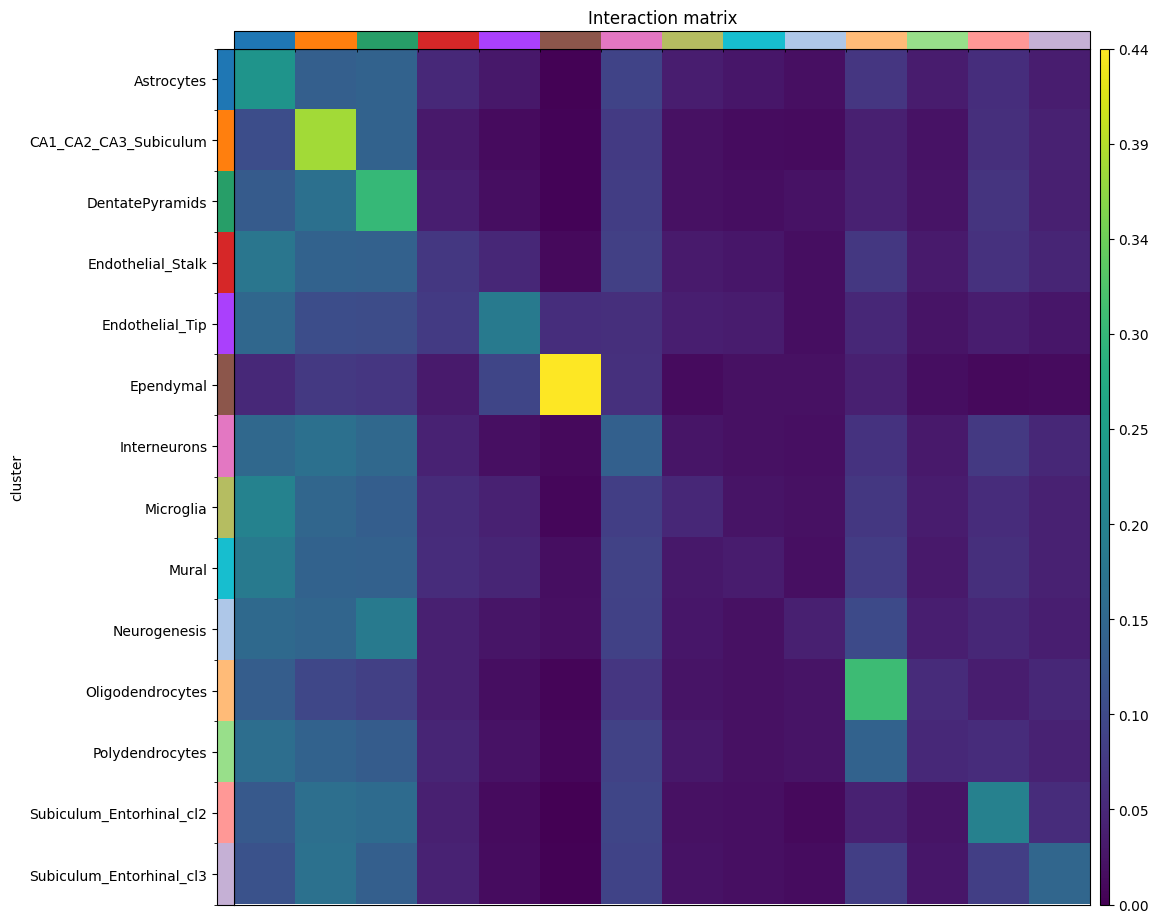

In [71]:
sq.gr.interaction_matrix(adata, cluster_key="cluster", connectivity_key="r100")
sq.pl.interaction_matrix(adata, cluster_key="cluster")
sq.gr.interaction_matrix(adata, cluster_key="cluster", connectivity_key="r100", normalized=True)
sq.pl.interaction_matrix(adata, cluster_key="cluster")

## r30

### nhood enrichment

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 151.42/s]


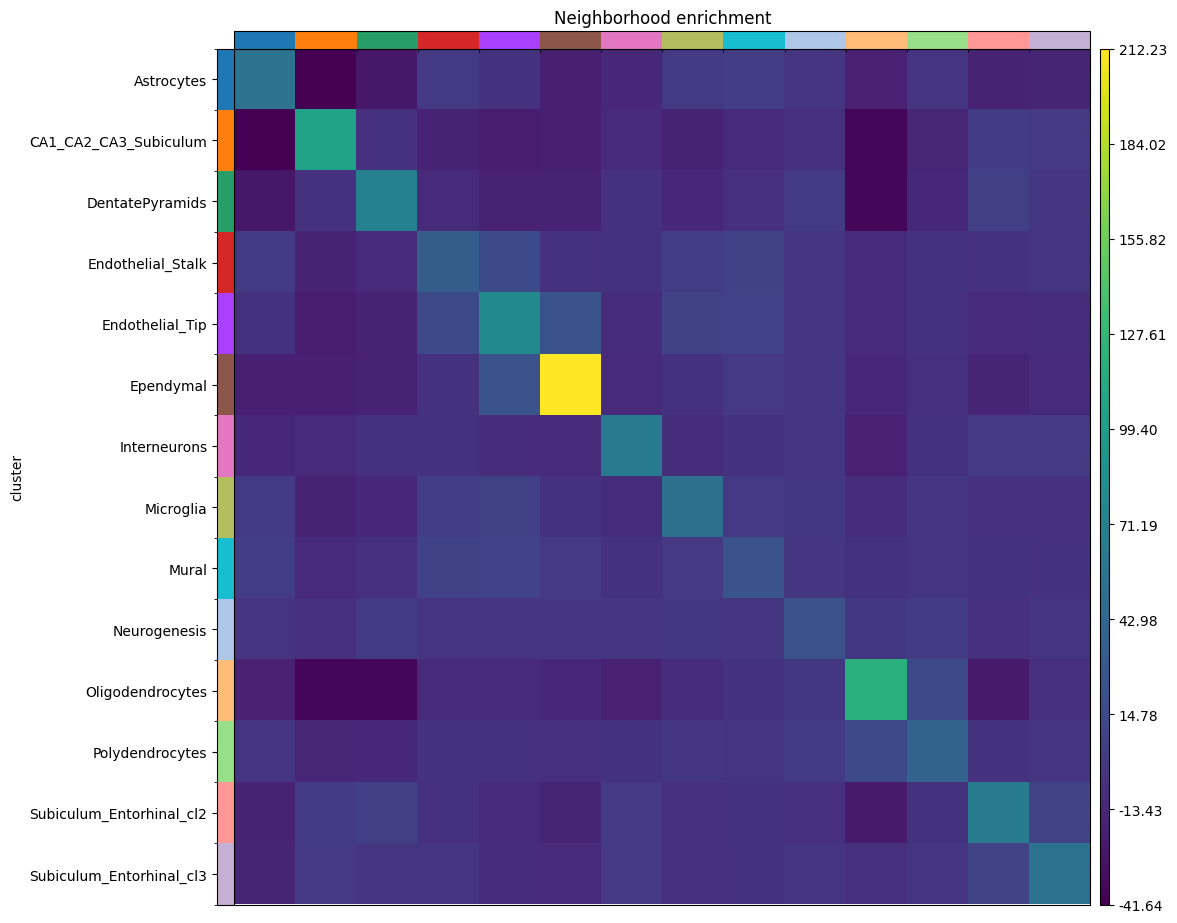

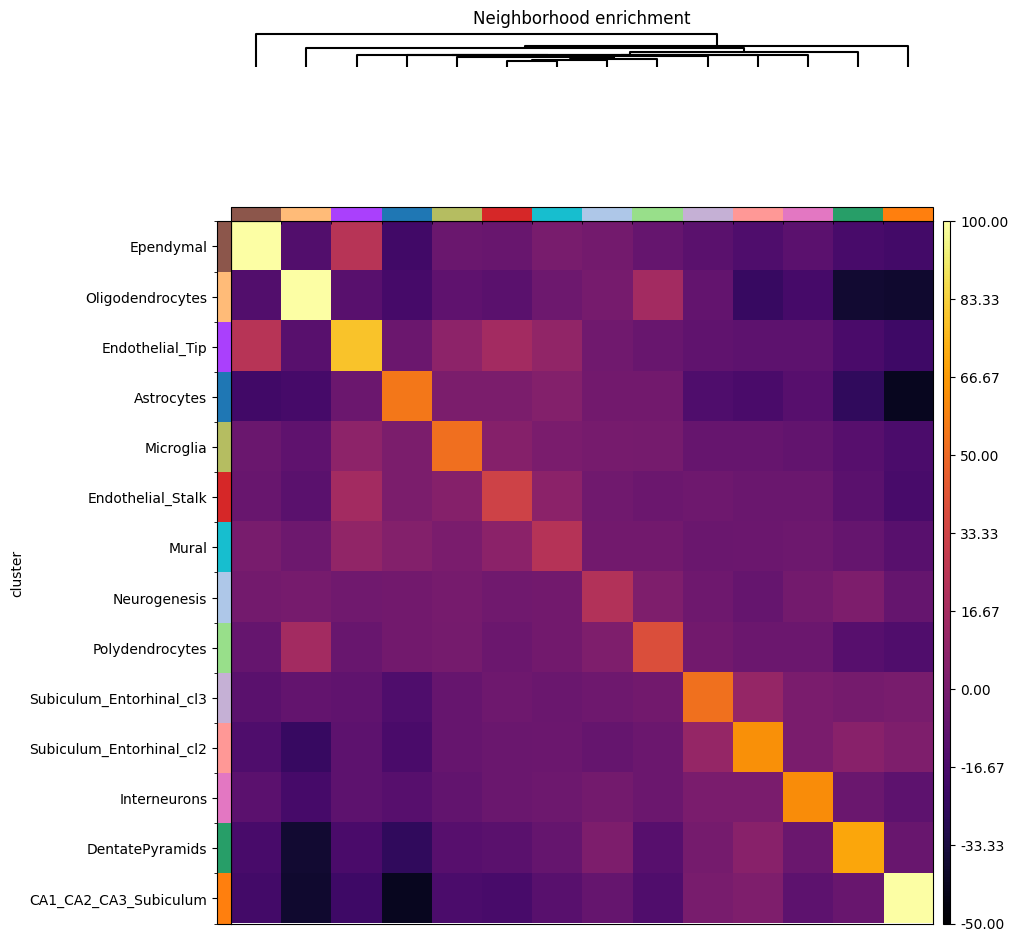

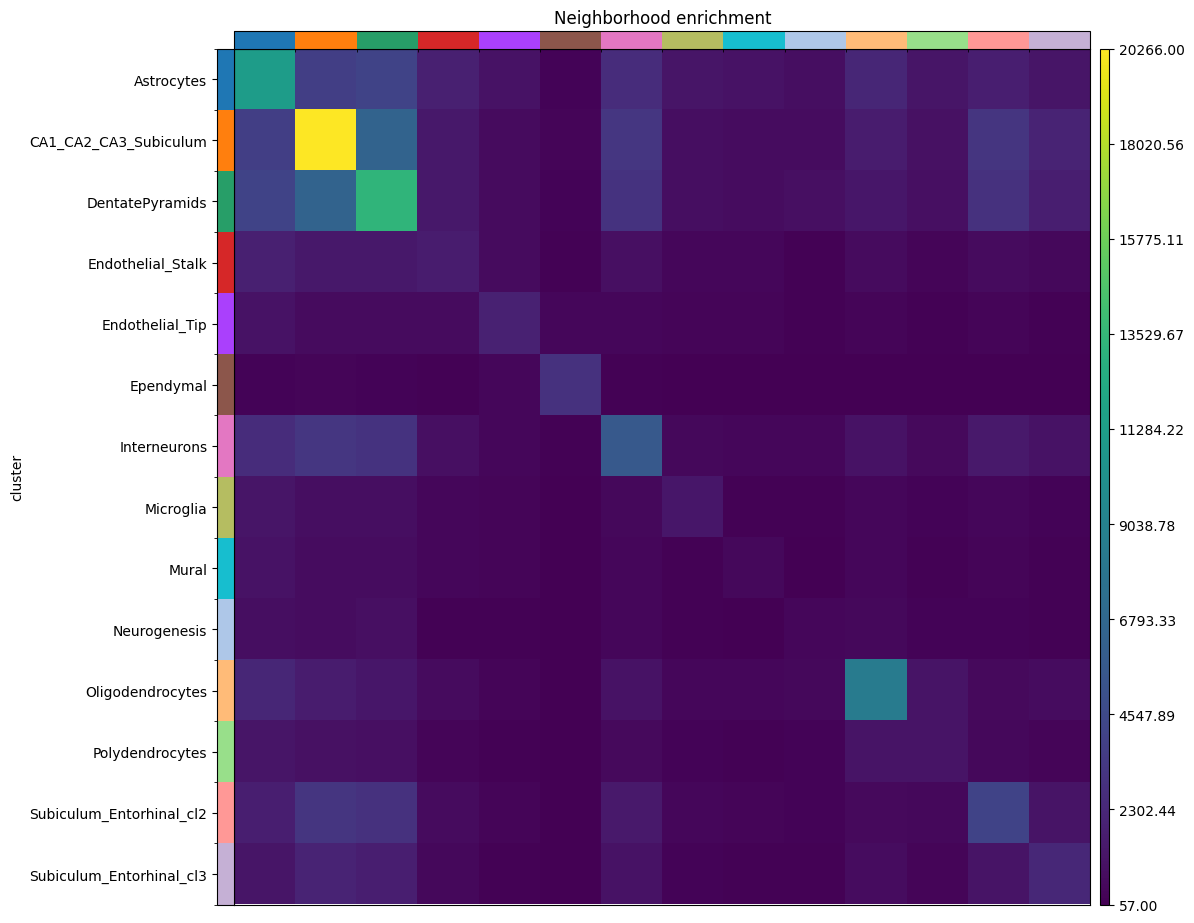

In [72]:
sq.gr.nhood_enrichment(adata, cluster_key="cluster", connectivity_key="r30")
sq.pl.nhood_enrichment(adata, cluster_key="cluster", mode="zscore")
sq.pl.nhood_enrichment(adata, cluster_key="cluster", mode="zscore", method="single", cmap="inferno", vmin=-50, vmax=100)
sq.pl.nhood_enrichment(adata, cluster_key="cluster", mode="count")

### interaction matrix

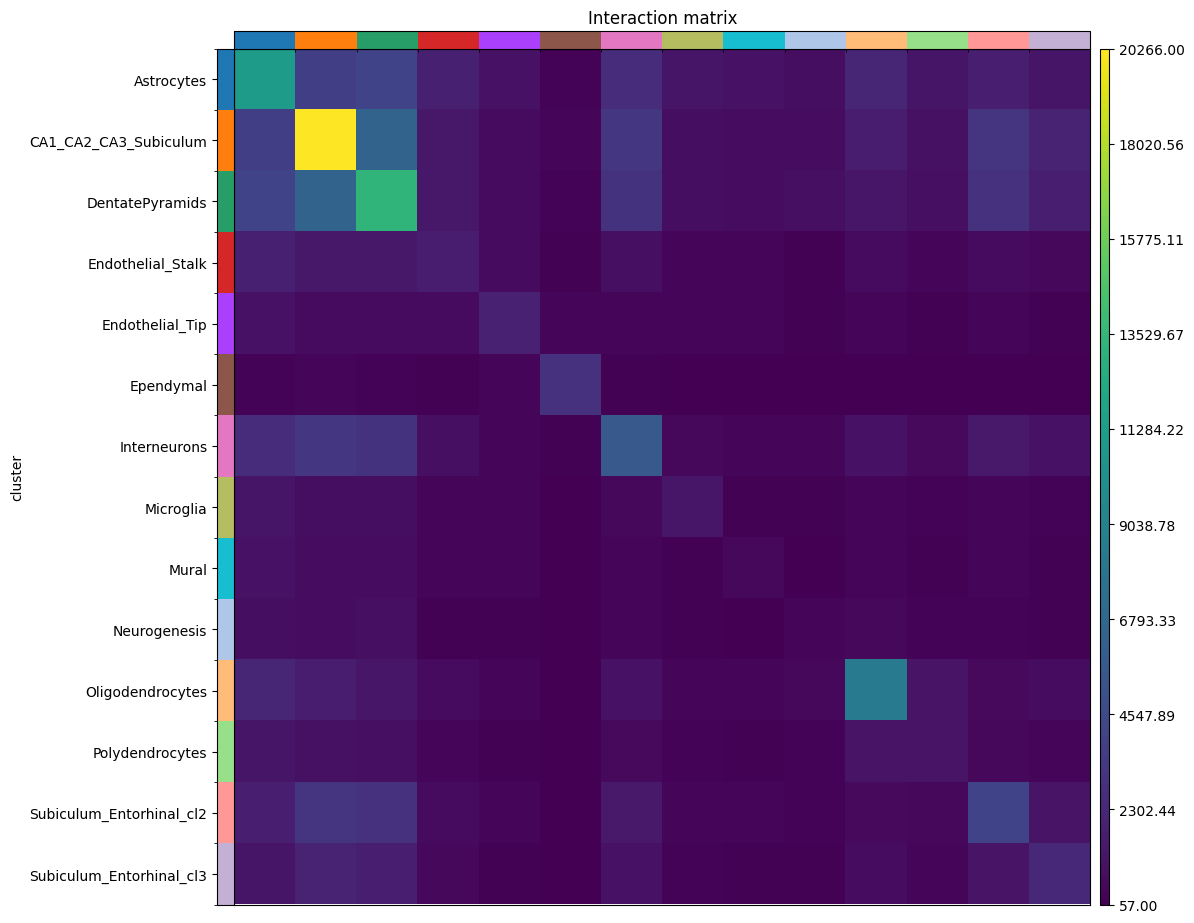

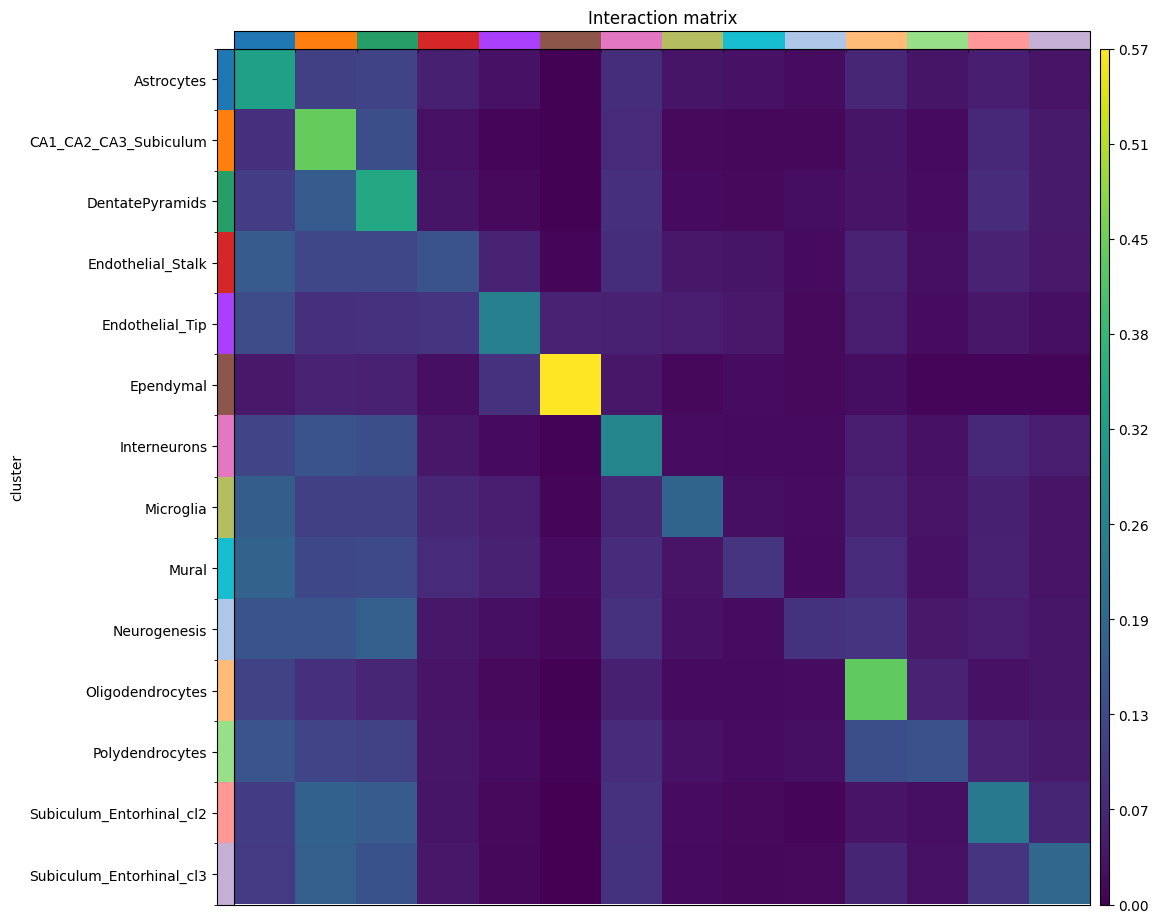

In [73]:
sq.gr.interaction_matrix(adata, cluster_key="cluster", connectivity_key="r30")
sq.pl.interaction_matrix(adata, cluster_key="cluster")
sq.gr.interaction_matrix(adata, cluster_key="cluster", connectivity_key="r30", normalized=True)
sq.pl.interaction_matrix(adata, cluster_key="cluster")

# Compare to Multiscale

```
Rscript --vanilla /home/bmille79/code/multiscale_trend_analysis/pairwise_analysis.r /home/bmille79/data_jfan9/brendan/multiscale_trend_analysis/compute_co_occurance_data.meta.csv.gz cluster /home/bmille79/data_jfan9/brendan/multiscale_trend_analysis/shuffledDataSets/sp.cooccuranceData.shuffled_res30-800.rds /home/bmille79/data_jfan9/brendan/multiscale_trend_analysis/results/pairwise/sp.cooccuranceData.pairwise.results.10-300.rds 14
```

radius 30 is pretty close to the delaunay neighbors, and radius 100 kinda is like what I have been using for multiscale.

Let's just make sure that my "dist" is the same or very similar to the radius euclidean here, or maybe it is the diameter? Double check. Also, is the radius here based on the pairwise distance matrix or the actual geometry of a circle that is used in the sp R package?


In [74]:
from sklearn.neighbors import NearestNeighbors

In [76]:
coords = adata.obsm["spatial"]
coords

array([[ 888.95, 3219.5 ],
       [4762.2 , 5020.4 ],
       [ 886.5 , 3199.6 ],
       ...,
       [3090.1 , 2045.  ],
       [3304.1 , 3491.5 ],
       [4902.3 , 4354.1 ]])

In [80]:
n_neighs = 6 # default
radius = 100
tree = NearestNeighbors(n_neighbors=n_neighs, radius=radius, metric="euclidean")
tree.fit(coords)

NearestNeighbors(metric='euclidean', n_neighbors=6, radius=100)

In [81]:
results = tree.radius_neighbors()

Check the spatial distances of cells around that 420 reference cell

In [93]:
_, idx = adata.obsp["r50_connectivities"][420, :].nonzero()
idx = np.append(idx, 420)
idx

array([  464,   700,   711,  1536,  2860,  3362,  3676,  4934,  5920,
        6950,  7716,  8268, 13616, 18917, 22778, 24875, 25678, 28198,
       29850,   420])

In [94]:
spatial[idx,:]

array([[4408.6, 3356.1],
       [4352.1, 3395.6],
       [4329.9, 3357.4],
       [4379.5, 3377.8],
       [4374.8, 3341.2],
       [4375.8, 3396.7],
       [4404.2, 3373.2],
       [4324.4, 3378.5],
       [4346.4, 3328.8],
       [4349.7, 3361.8],
       [4365.3, 3384.7],
       [4348.1, 3410.1],
       [4337.2, 3339.1],
       [4405.8, 3396.7],
       [4334.2, 3405.7],
       [4361.1, 3351.7],
       [4389.9, 3366. ],
       [4325. , 3395.7],
       [4339.4, 3387.4],
       [4365.8, 3368.5]], dtype=float32)

In [98]:
3368.5 - 3341.2

27.300000000000182

In [99]:
3410.1 - 3368.5

41.59999999999991

In [100]:
4365.8 - 4324.4

41.400000000000546

In [101]:
4408.6 - 4365.8

42.80000000000018

In [102]:
_, idx = adata.obsp["r100_connectivities"][420, :].nonzero()
idx = np.append(idx, 420)
idx

array([  356,   449,   464,   682,   700,   711,   903,  1536,  1673,
        2249,  2555,  2708,  2860,  3256,  3362,  3513,  3676,  3756,
        4934,  5100,  5495,  5574,  5920,  6625,  6891,  6950,  7716,
        8222,  8268,  9033,  9480, 10179, 10602, 11018, 11384, 12130,
       13616, 13879, 15739, 16413, 17218, 17369, 18359, 18700, 18917,
       18938, 19387, 19727, 19967, 20522, 20700, 21027, 21728, 21808,
       22541, 22593, 22778, 23610, 23700, 24875, 25056, 25678, 25970,
       26843, 27108, 28198, 29358, 29850, 30676, 31341, 33030, 34387,
       37328, 37973, 39248, 40191, 40620,   420])

In [103]:
spatial[idx,:]

array([[4391.8, 3297. ],
       [4453.2, 3367.4],
       [4408.6, 3356.1],
       [4454.8, 3351.1],
       [4352.1, 3395.6],
       [4329.9, 3357.4],
       [4289.3, 3417.6],
       [4379.5, 3377.8],
       [4418. , 3315.4],
       [4450.7, 3384.6],
       [4338.2, 3312.9],
       [4436.7, 3357.5],
       [4374.8, 3341.2],
       [4304.3, 3375.1],
       [4375.8, 3396.7],
       [4430.9, 3326.6],
       [4404.2, 3373.2],
       [4434.1, 3310.9],
       [4324.4, 3378.5],
       [4301.7, 3357.3],
       [4312.4, 3314.9],
       [4359.2, 3294.1],
       [4346.4, 3328.8],
       [4299. , 3409.6],
       [4276. , 3405.6],
       [4349.7, 3361.8],
       [4365.3, 3384.7],
       [4464.4, 3378.8],
       [4348.1, 3410.1],
       [4290.9, 3399.3],
       [4290.6, 3332.1],
       [4321.4, 3302.9],
       [4306.1, 3391.6],
       [4360. , 3424.8],
       [4378. , 3287.4],
       [4385.1, 3312.6],
       [4337.2, 3339.1],
       [4421.9, 3414.2],
       [4268.4, 3374.3],
       [4301.4, 3303.6],


In [106]:
np.argmin(spatial[idx,:], axis = 0)

array([38, 51])

In [107]:
spatial[idx,:][38]

array([4268.4, 3374.3], dtype=float32)

In [108]:
4268.4 - 4365.8

-97.40000000000055

In [109]:
spatial[idx,:][51]

array([4349.5, 3280.1], dtype=float32)

In [110]:
3368.5 - 3280.1

88.40000000000009

Looks like radius in this case really is pretty close to a geometric distance from a reference cell. I think it should be the same for sf::st_buffer so should be comparable.

The triplet might be useful to see if I also find anything new this way, too. 
Basically I do different scales, and do subsets. So two differences and potential advantages to this

Check my pairwsise and triplet of this slide-seq data using distances of 30, 50, and 100.
30 should be close to the nearest neighbors adjacent to a reference cell and comparable to the defaults of squidpy. Whereas 50 and 100 are like what I am using.

Also interested in how these different distances relate to each other.


Does the distance used change the interpretation?

Do I get similar results to squidpy when the radius distances are similar (will be global shuffling for nhood analysis)

Do I see anything that squidpy doesnt at the other shuffle resolutions, or if I use triplets? Trends reveal anything interesting? Triplets reveal anything interesting?

Still not sure why the co_occurance shows astros everywhere. This measurement is different than what I am doing or the nhood analysis. Does it offer anything useful?

Finally, pass in my simulation that shows trend and triplet benefits, and see what squidpy shows


## Simulation

In [ ]:
co-occurance
neighborhood enrichment
interaction matrix

## sim for triplet

In [121]:
sim_meta = pd.read_csv("/Users/brendan/Desktop/PostDoc/work/HuBMAP/repos/multiscale_celltype_colocalization_analysis/data/sim/simTriplets.meta.csv",
                       index_col=0)

sim_meta

x            y type
1       823.076856   200.608730    A
2      1153.584089  2097.498446    A
3      1775.845426  2279.652247    A
4      2815.444149   345.028969    A
5       625.213986   144.629315    A
...            ...          ...  ...
9996   2269.408343  2442.014590    A
9997   1545.678620  2524.434333    C
9998   1560.466503  1481.269650    B
9999   1761.160340  1864.836018    C
10000  2023.298831   345.084298    A

[10000 rows x 3 columns]

In [159]:
sim_meta['type'] = sim_meta['type'].astype("category") # like levels in R, need for squidpy stuff

In [160]:
sim_meta['type']

1        A
2        A
3        A
4        A
5        A
        ..
9996     A
9997     C
9998     B
9999     C
10000    A
Name: type, Length: 10000, dtype: category
Categories (3, object): ['A', 'B', 'C']

In [161]:
from anndata import AnnData
from numpy.random import default_rng
rng = default_rng(42)

In [162]:
# just some random data cause I'm just interested in getting the coordinates and labels in there
counts = rng.integers(0, 15, size=(10000, 10000))
counts.shape

(10000, 10000)

In [163]:
sim = AnnData(counts, obsm={"spatial": np.array(sim_meta[["x", "y"]])})

/var/folders/cf/llylf0sn67j0qlvgy3_990ym0000gn/T/ipykernel_68437/1554074484.py:1: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  sim = AnnData(counts, obsm={"spatial": np.array(sim_meta[["x", "y"]])})


In [164]:
sim.obs = sim_meta

/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/anndata/_core/anndata.py:798: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [1, 2, 3, 4, 5]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


In [176]:
sim.obs

x            y type
1       823.076856   200.608730    A
2      1153.584089  2097.498446    A
3      1775.845426  2279.652247    A
4      2815.444149   345.028969    A
5       625.213986   144.629315    A
...            ...          ...  ...
9996   2269.408343  2442.014590    A
9997   1545.678620  2524.434333    C
9998   1560.466503  1481.269650    B
9999   1761.160340  1864.836018    C
10000  2023.298831   345.084298    A

[10000 rows x 3 columns]

In [179]:
sim.obs["type"]

1        A
2        A
3        A
4        A
5        A
        ..
9996     A
9997     C
9998     B
9999     C
10000    A
Name: type, Length: 10000, dtype: category
Categories (3, object): ['A', 'B', 'C']

/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


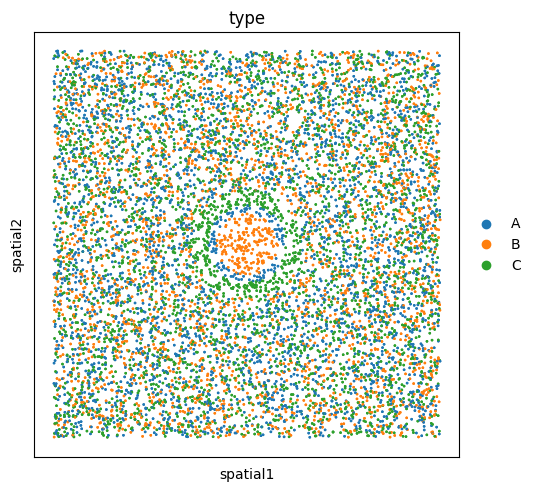

In [180]:
sq.pl.spatial_scatter(
        sim,
        shape=None,
        color = "type",
        size=3
)

In [181]:
sq.gr.co_occurrence(sim, cluster_key="type")

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:15<00:00, 15.78s/]


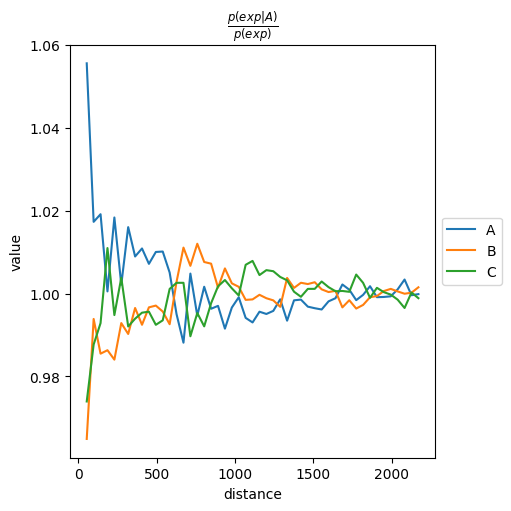

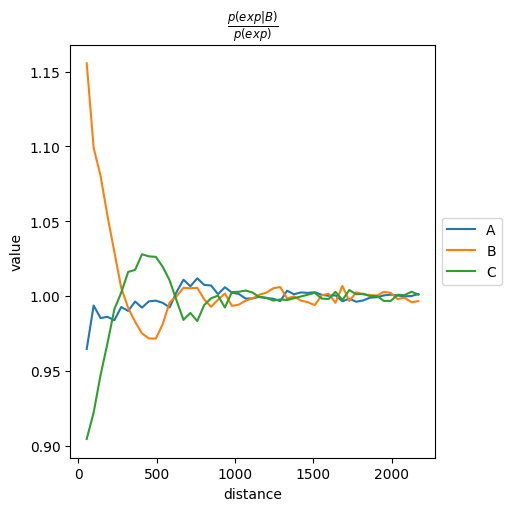

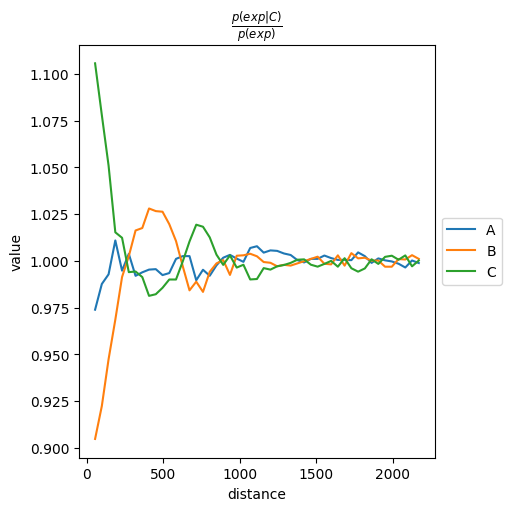

In [182]:
for ct in np.unique(sim.obs["type"]):
    sq.pl.co_occurrence(sim, cluster_key="type", clusters=ct)

In [184]:
sq.gr.spatial_neighbors(sim, delaunay=False, coord_type="generic", key_added="nn6") ## 6 by default
sq.gr.spatial_neighbors(sim, delaunay=True, coord_type="generic", key_added="delaunay")
sq.gr.spatial_neighbors(sim, delaunay=False, radius=30, coord_type="generic", key_added="r30")
sq.gr.spatial_neighbors(sim, delaunay=False, radius=50, coord_type="generic", key_added="r50")
sq.gr.spatial_neighbors(sim, delaunay=False, radius=100, coord_type="generic", key_added="r100")

In [185]:
_, idx = sim.obsp["nn6_connectivities"][420, :].nonzero()
idx = np.append(idx, 420)
sq.pl.spatial_scatter(sim[idx, :],
                      shape=None,
                      color="type",
                      spatial_key="spatial", ## the only thing in .obsm
                      connectivity_key="nn6_connectivities", ## not sure difference between "_connectivities" and "_distances"
                      size=100)

AssertionError: Don’t call _normalize_index with non-categorical/string names

### nn6

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 156.90/s]


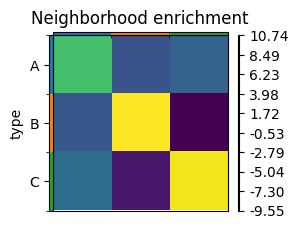

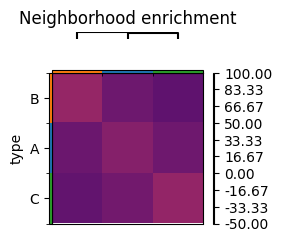

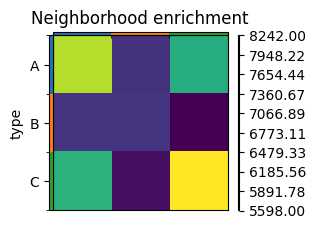

In [187]:
sq.gr.nhood_enrichment(sim, cluster_key="type", connectivity_key="nn6")
sq.pl.nhood_enrichment(sim, cluster_key="type", mode="zscore")
sq.pl.nhood_enrichment(sim, cluster_key="type", mode="zscore", method="single", cmap="inferno", vmin=-50, vmax=100)
sq.pl.nhood_enrichment(sim, cluster_key="type", mode="count")

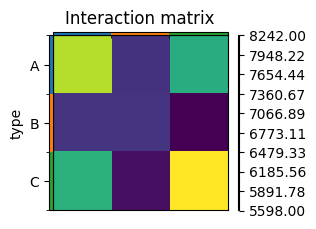

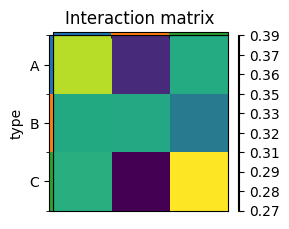

In [188]:
sq.gr.interaction_matrix(sim, cluster_key="type", connectivity_key="nn6")
sq.pl.interaction_matrix(sim, cluster_key="type")
sq.gr.interaction_matrix(sim, cluster_key="type", connectivity_key="nn6", normalized=True)
sq.pl.interaction_matrix(sim, cluster_key="type")

### delaunay

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 142.93/s]


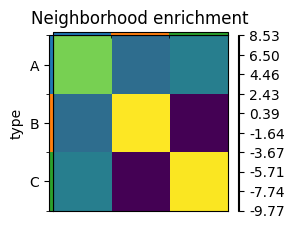

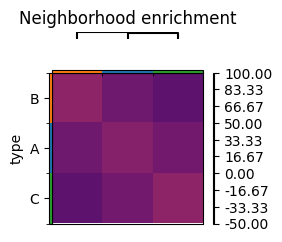

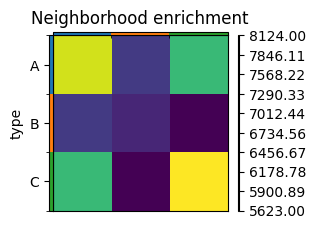

In [189]:
sq.gr.nhood_enrichment(sim, cluster_key="type", connectivity_key="delaunay")
sq.pl.nhood_enrichment(sim, cluster_key="type", mode="zscore")
sq.pl.nhood_enrichment(sim, cluster_key="type", mode="zscore", method="single", cmap="inferno", vmin=-50, vmax=100)
sq.pl.nhood_enrichment(sim, cluster_key="type", mode="count")

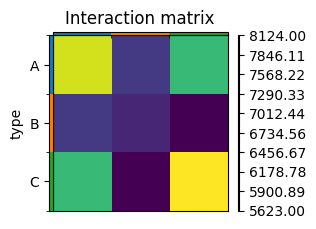

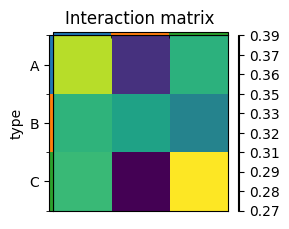

In [190]:
sq.gr.interaction_matrix(sim, cluster_key="type", connectivity_key="delaunay")
sq.pl.interaction_matrix(sim, cluster_key="type")
sq.gr.interaction_matrix(sim, cluster_key="type", connectivity_key="delaunay", normalized=True)
sq.pl.interaction_matrix(sim, cluster_key="type")

### r30

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 218.08/s]


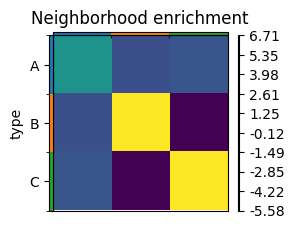

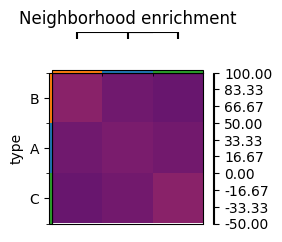

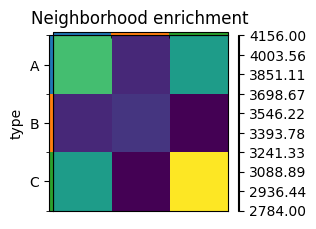

In [191]:
sq.gr.nhood_enrichment(sim, cluster_key="type", connectivity_key="r30")
sq.pl.nhood_enrichment(sim, cluster_key="type", mode="zscore")
sq.pl.nhood_enrichment(sim, cluster_key="type", mode="zscore", method="single", cmap="inferno", vmin=-50, vmax=100)
sq.pl.nhood_enrichment(sim, cluster_key="type", mode="count")

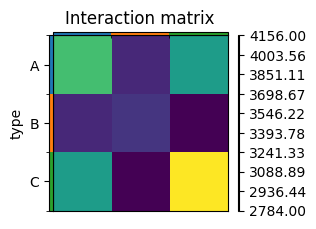

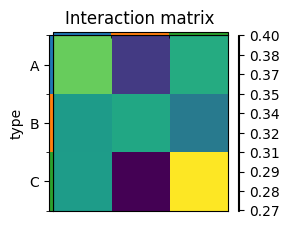

In [192]:
sq.gr.interaction_matrix(sim, cluster_key="type", connectivity_key="r30")
sq.pl.interaction_matrix(sim, cluster_key="type")
sq.gr.interaction_matrix(sim, cluster_key="type", connectivity_key="r30", normalized=True)
sq.pl.interaction_matrix(sim, cluster_key="type")

### r50

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 207.33/s]


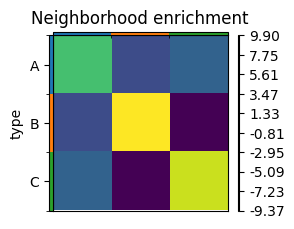

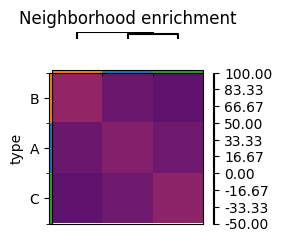

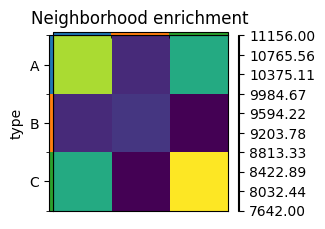

In [193]:
sq.gr.nhood_enrichment(sim, cluster_key="type", connectivity_key="r50")
sq.pl.nhood_enrichment(sim, cluster_key="type", mode="zscore")
sq.pl.nhood_enrichment(sim, cluster_key="type", mode="zscore", method="single", cmap="inferno", vmin=-50, vmax=100)
sq.pl.nhood_enrichment(sim, cluster_key="type", mode="count")

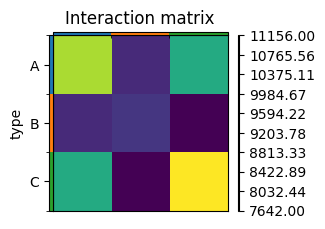

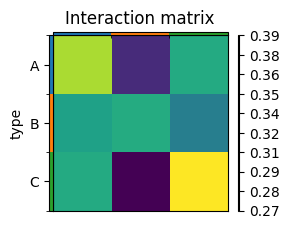

In [194]:
sq.gr.interaction_matrix(sim, cluster_key="type", connectivity_key="r50")
sq.pl.interaction_matrix(sim, cluster_key="type")
sq.gr.interaction_matrix(sim, cluster_key="type", connectivity_key="r50", normalized=True)
sq.pl.interaction_matrix(sim, cluster_key="type")

### r100

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 204.90/s]


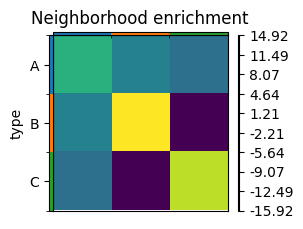

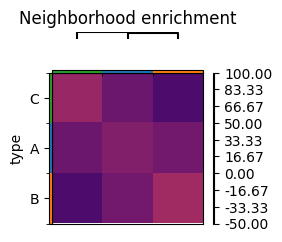

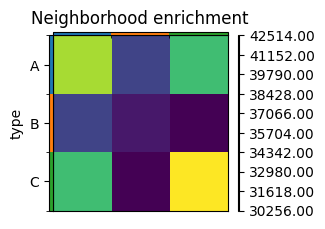

In [195]:
sq.gr.nhood_enrichment(sim, cluster_key="type", connectivity_key="r100")
sq.pl.nhood_enrichment(sim, cluster_key="type", mode="zscore")
sq.pl.nhood_enrichment(sim, cluster_key="type", mode="zscore", method="single", cmap="inferno", vmin=-50, vmax=100)
sq.pl.nhood_enrichment(sim, cluster_key="type", mode="count")

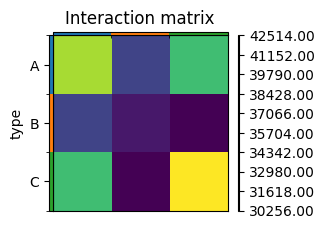

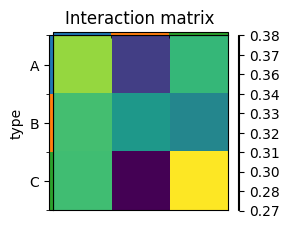

In [196]:
sq.gr.interaction_matrix(sim, cluster_key="type", connectivity_key="r100")
sq.pl.interaction_matrix(sim, cluster_key="type")
sq.gr.interaction_matrix(sim, cluster_key="type", connectivity_key="r100", normalized=True)
sq.pl.interaction_matrix(sim, cluster_key="type")

## sim for pairwise

In [197]:
sim_pw = pd.read_csv("/Users/brendan/Desktop/PostDoc/work/HuBMAP/repos/multiscale_celltype_colocalization_analysis/data/sim/simPairwise.meta.csv",
                       index_col=0)

sim_pw

x            y type
30001   823.076856   200.608730    A
30002  1153.584089  2097.498446    A
30003  1775.845426  2279.652247    A
30004  2815.444149   345.028969    A
30005   625.213986   144.629315    A
...            ...          ...  ...
39996  2269.408343  2442.014590    A
39997  1545.678620  2524.434333    A
39998  1560.466503  1481.269650    C
39999  1761.160340  1864.836018    B
40000  2023.298831   345.084298    A

[10000 rows x 3 columns]

In [198]:
sim_pw['type'] = sim_pw['type'].astype("category") # like levels in R, need for squidpy stuff
sim_pw['type']

30001    A
30002    A
30003    A
30004    A
30005    A
        ..
39996    A
39997    A
39998    C
39999    B
40000    A
Name: type, Length: 10000, dtype: category
Categories (3, object): ['A', 'B', 'C']

In [199]:
sim_pw_ann = AnnData(counts, obsm={"spatial": np.array(sim_pw[["x", "y"]])})

/var/folders/cf/llylf0sn67j0qlvgy3_990ym0000gn/T/ipykernel_68437/1869837306.py:1: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  sim_pw_ann = AnnData(counts, obsm={"spatial": np.array(sim_pw[["x", "y"]])})


In [200]:
sim_pw_ann.obs = sim_pw

/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/anndata/_core/anndata.py:798: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [30001, 30002, 30003, 30004, 30005]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


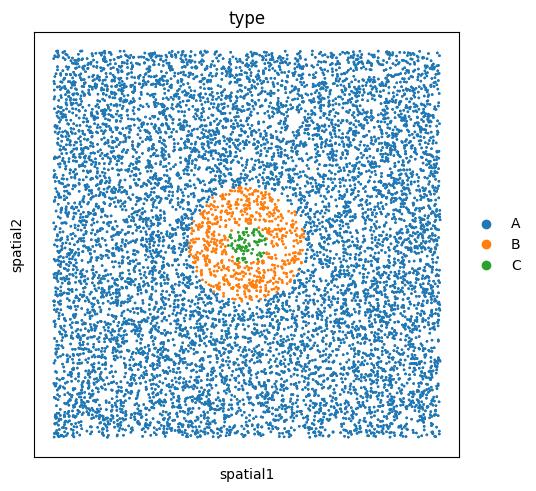

In [201]:
sq.pl.spatial_scatter(
        sim_pw_ann,
        shape=None,
        color = "type",
        size=3
)

In [202]:
sq.gr.co_occurrence(sim_pw_ann, cluster_key="type")

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:15<00:00, 15.58s/]


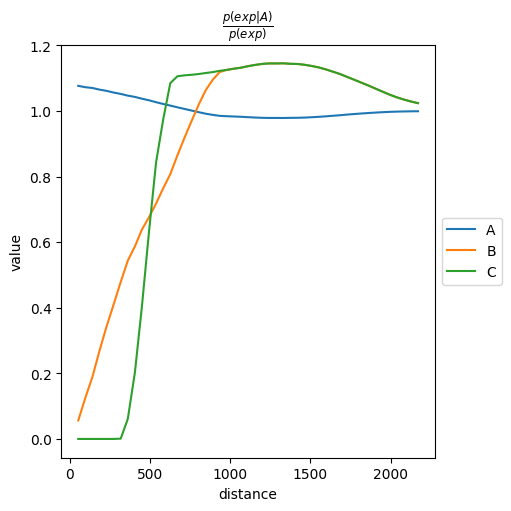

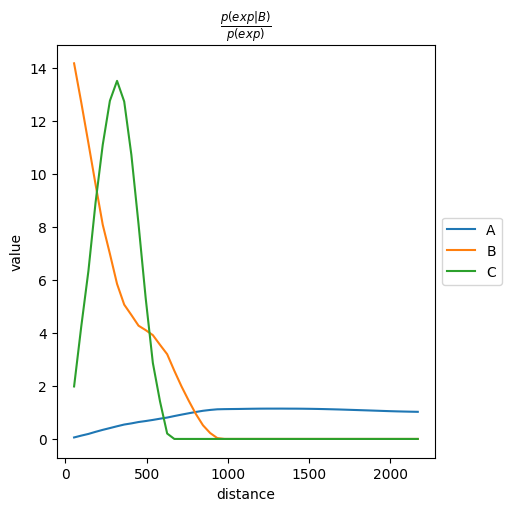

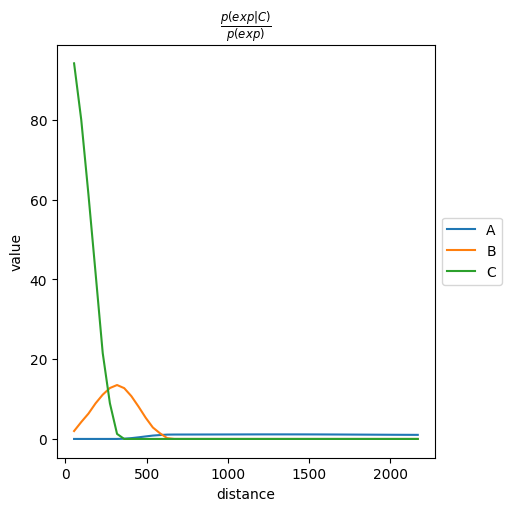

In [203]:
for ct in np.unique(sim_pw_ann.obs["type"]):
    sq.pl.co_occurrence(sim_pw_ann, cluster_key="type", clusters=ct)

In [204]:
sq.gr.spatial_neighbors(sim_pw_ann, delaunay=False, coord_type="generic", key_added="nn6") ## 6 by default
sq.gr.spatial_neighbors(sim_pw_ann, delaunay=True, coord_type="generic", key_added="delaunay")
sq.gr.spatial_neighbors(sim_pw_ann, delaunay=False, radius=30, coord_type="generic", key_added="r30")
sq.gr.spatial_neighbors(sim_pw_ann, delaunay=False, radius=50, coord_type="generic", key_added="r50")
sq.gr.spatial_neighbors(sim_pw_ann, delaunay=False, radius=100, coord_type="generic", key_added="r100")

### nn6

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 227.40/s]


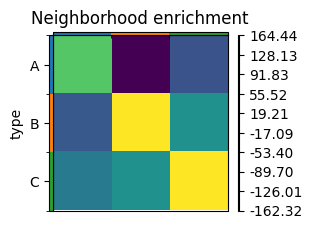

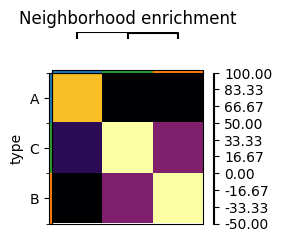

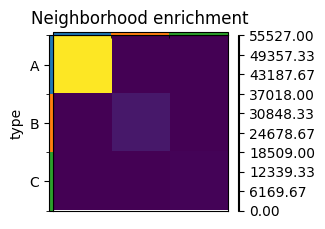

In [205]:
sq.gr.nhood_enrichment(sim_pw_ann, cluster_key="type", connectivity_key="nn6")
sq.pl.nhood_enrichment(sim_pw_ann, cluster_key="type", mode="zscore")
sq.pl.nhood_enrichment(sim_pw_ann, cluster_key="type", mode="zscore", method="single", cmap="inferno", vmin=-50, vmax=100)
sq.pl.nhood_enrichment(sim_pw_ann, cluster_key="type", mode="count")

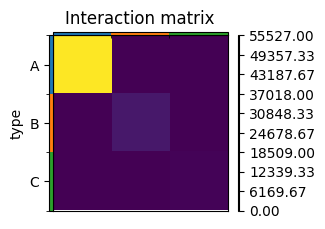

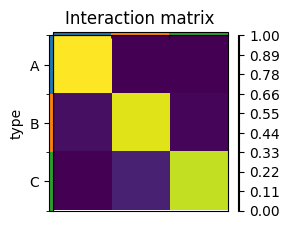

In [206]:
sq.gr.interaction_matrix(sim_pw_ann, cluster_key="type", connectivity_key="nn6")
sq.pl.interaction_matrix(sim_pw_ann, cluster_key="type")
sq.gr.interaction_matrix(sim_pw_ann, cluster_key="type", connectivity_key="nn6", normalized=True)
sq.pl.interaction_matrix(sim_pw_ann, cluster_key="type")

### delaunay

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 218.71/s]


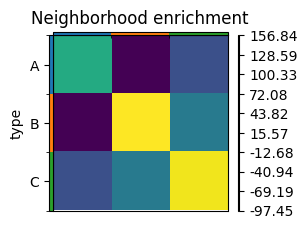

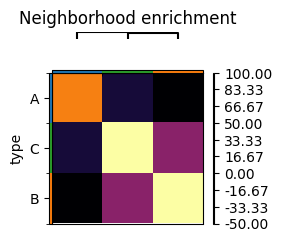

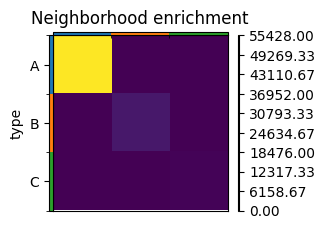

In [207]:
sq.gr.nhood_enrichment(sim_pw_ann, cluster_key="type", connectivity_key="delaunay")
sq.pl.nhood_enrichment(sim_pw_ann, cluster_key="type", mode="zscore")
sq.pl.nhood_enrichment(sim_pw_ann, cluster_key="type", mode="zscore", method="single", cmap="inferno", vmin=-50, vmax=100)
sq.pl.nhood_enrichment(sim_pw_ann, cluster_key="type", mode="count")

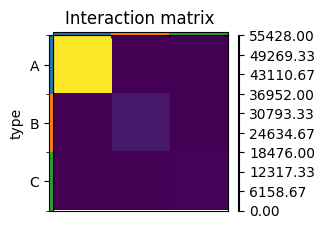

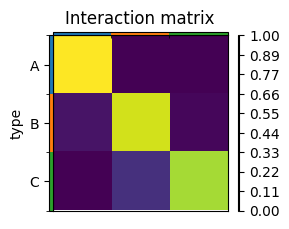

In [208]:
sq.gr.interaction_matrix(sim_pw_ann, cluster_key="type", connectivity_key="delaunay")
sq.pl.interaction_matrix(sim_pw_ann, cluster_key="type")
sq.gr.interaction_matrix(sim_pw_ann, cluster_key="type", connectivity_key="delaunay", normalized=True)
sq.pl.interaction_matrix(sim_pw_ann, cluster_key="type")

### r30

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 219.63/s]


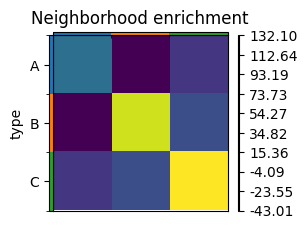

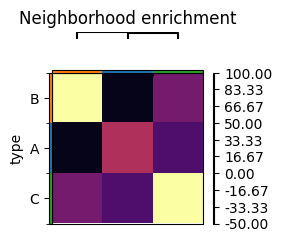

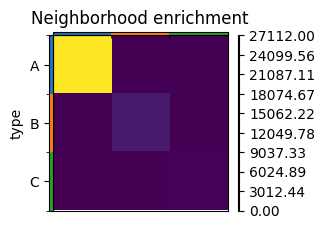

In [209]:
sq.gr.nhood_enrichment(sim_pw_ann, cluster_key="type", connectivity_key="r30")
sq.pl.nhood_enrichment(sim_pw_ann, cluster_key="type", mode="zscore")
sq.pl.nhood_enrichment(sim_pw_ann, cluster_key="type", mode="zscore", method="single", cmap="inferno", vmin=-50, vmax=100)
sq.pl.nhood_enrichment(sim_pw_ann, cluster_key="type", mode="count")

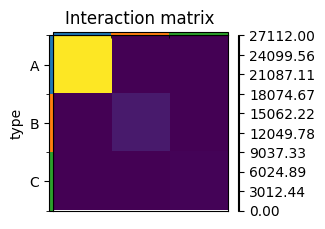

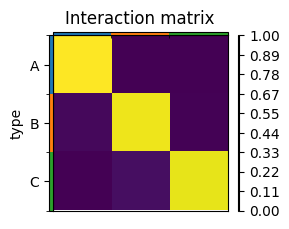

In [210]:
sq.gr.interaction_matrix(sim_pw_ann, cluster_key="type", connectivity_key="r30")
sq.pl.interaction_matrix(sim_pw_ann, cluster_key="type")
sq.gr.interaction_matrix(sim_pw_ann, cluster_key="type", connectivity_key="r30", normalized=True)
sq.pl.interaction_matrix(sim_pw_ann, cluster_key="type")

### r50

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 215.99/s]


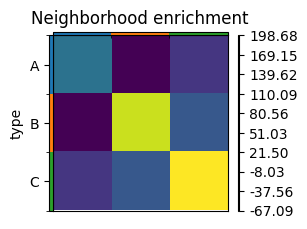

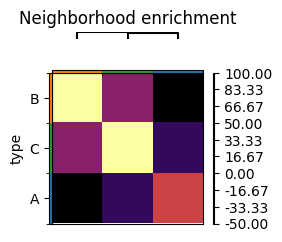

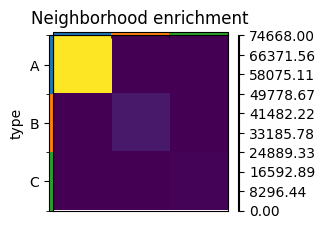

In [211]:
sq.gr.nhood_enrichment(sim_pw_ann, cluster_key="type", connectivity_key="r50")
sq.pl.nhood_enrichment(sim_pw_ann, cluster_key="type", mode="zscore")
sq.pl.nhood_enrichment(sim_pw_ann, cluster_key="type", mode="zscore", method="single", cmap="inferno", vmin=-50, vmax=100)
sq.pl.nhood_enrichment(sim_pw_ann, cluster_key="type", mode="count")

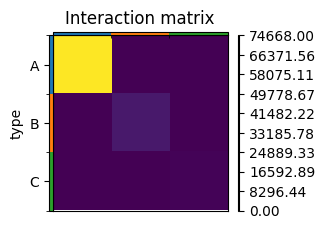

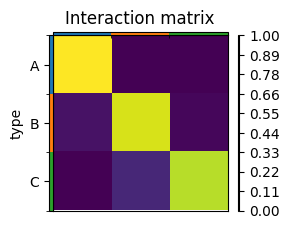

In [212]:
sq.gr.interaction_matrix(sim_pw_ann, cluster_key="type", connectivity_key="r50")
sq.pl.interaction_matrix(sim_pw_ann, cluster_key="type")
sq.gr.interaction_matrix(sim_pw_ann, cluster_key="type", connectivity_key="r50", normalized=True)
sq.pl.interaction_matrix(sim_pw_ann, cluster_key="type")

### r100

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 196.19/s]


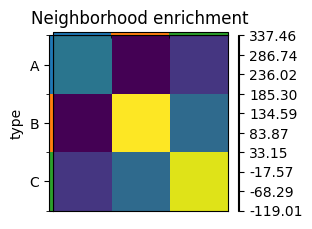

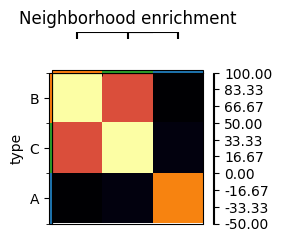

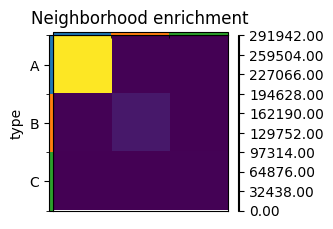

In [213]:
sq.gr.nhood_enrichment(sim_pw_ann, cluster_key="type", connectivity_key="r100")
sq.pl.nhood_enrichment(sim_pw_ann, cluster_key="type", mode="zscore")
sq.pl.nhood_enrichment(sim_pw_ann, cluster_key="type", mode="zscore", method="single", cmap="inferno", vmin=-50, vmax=100)
sq.pl.nhood_enrichment(sim_pw_ann, cluster_key="type", mode="count")

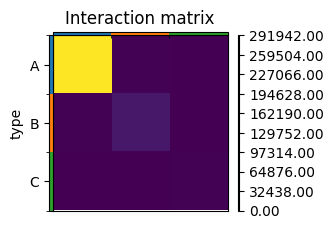

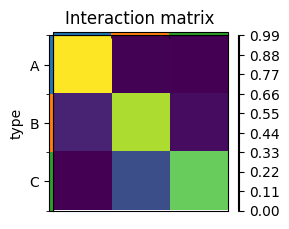

In [214]:
sq.gr.interaction_matrix(sim_pw_ann, cluster_key="type", connectivity_key="r100")
sq.pl.interaction_matrix(sim_pw_ann, cluster_key="type")
sq.gr.interaction_matrix(sim_pw_ann, cluster_key="type", connectivity_key="r100", normalized=True)
sq.pl.interaction_matrix(sim_pw_ann, cluster_key="type")